In [1]:
import sys
import os

# Ajouter le chemin du projet au PATH
sys.path.append(os.path.abspath(".."))

from modules.data_import import loadAndMergeData, exportDataCSV

# Charger les données
merge2 = loadAndMergeData()
merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [11]:
merge2.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4410.000000        4410.000000   
mean      2.063946   65029.312925            2.691837          15.209524   
std       1.106689   47068.888559            2.493912           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  ...  TotalWorkingYears  TrainingTimesLastYear  \
count         4410.0  ...        4410.000000            4410.000000   
mean             8.0  ...          11.277324               2.799320   
std              0.0  ...           7.774490               1.288978   
min              8.0  ...           0.000000               0.000000   
25%              8.0  ...           6.000000               2.000000   
50%              8.0  ...          10.000000               3.000000   
75%              8.0  ...          15.000000               3.000000   
max              8.0  ...          40.000000               6.000000   

       YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
count     4410.000000              4410.000000           4410.000000   
mean         7.008163                 2.187755              4.123129   
std          6.125135                 3.221699              3.567327   
min          0.000000                 0.000000              0.000000   
25%          3.000000                 0.000000              2.000000   
50%          5.000000                 1.000000              3.000000   
75%          9.000000                 3.000000              7.000000   
max         40.000000                15.000000             17.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
count              4410.000000      4410.000000      4410.000000   
mean                  2.725170         2.729478         2.763492   
std                   1.089852         1.098904         0.703541   
min                   1.000000         1.000000         1.000000   
25%                   2.000000         2.000000         2.000000   
50%                   3.000000         3.000000         3.000000   
75%                   4.000000         4.000000         3.000000   
max                   4.000000         4.000000         4.000000   

       JobInvolvement  PerformanceRating  
count     4410.000000        4410.000000  
mean         2.729932           3.153741  
std          0.711400           0.360742  
min          1.000000           3.000000  
25%          2.000000           3.000000  
50%          3.000000           3.000000  
75%          3.000000           3.000000  
max          4.000000           4.000000  

[8 rows x 21 columns]

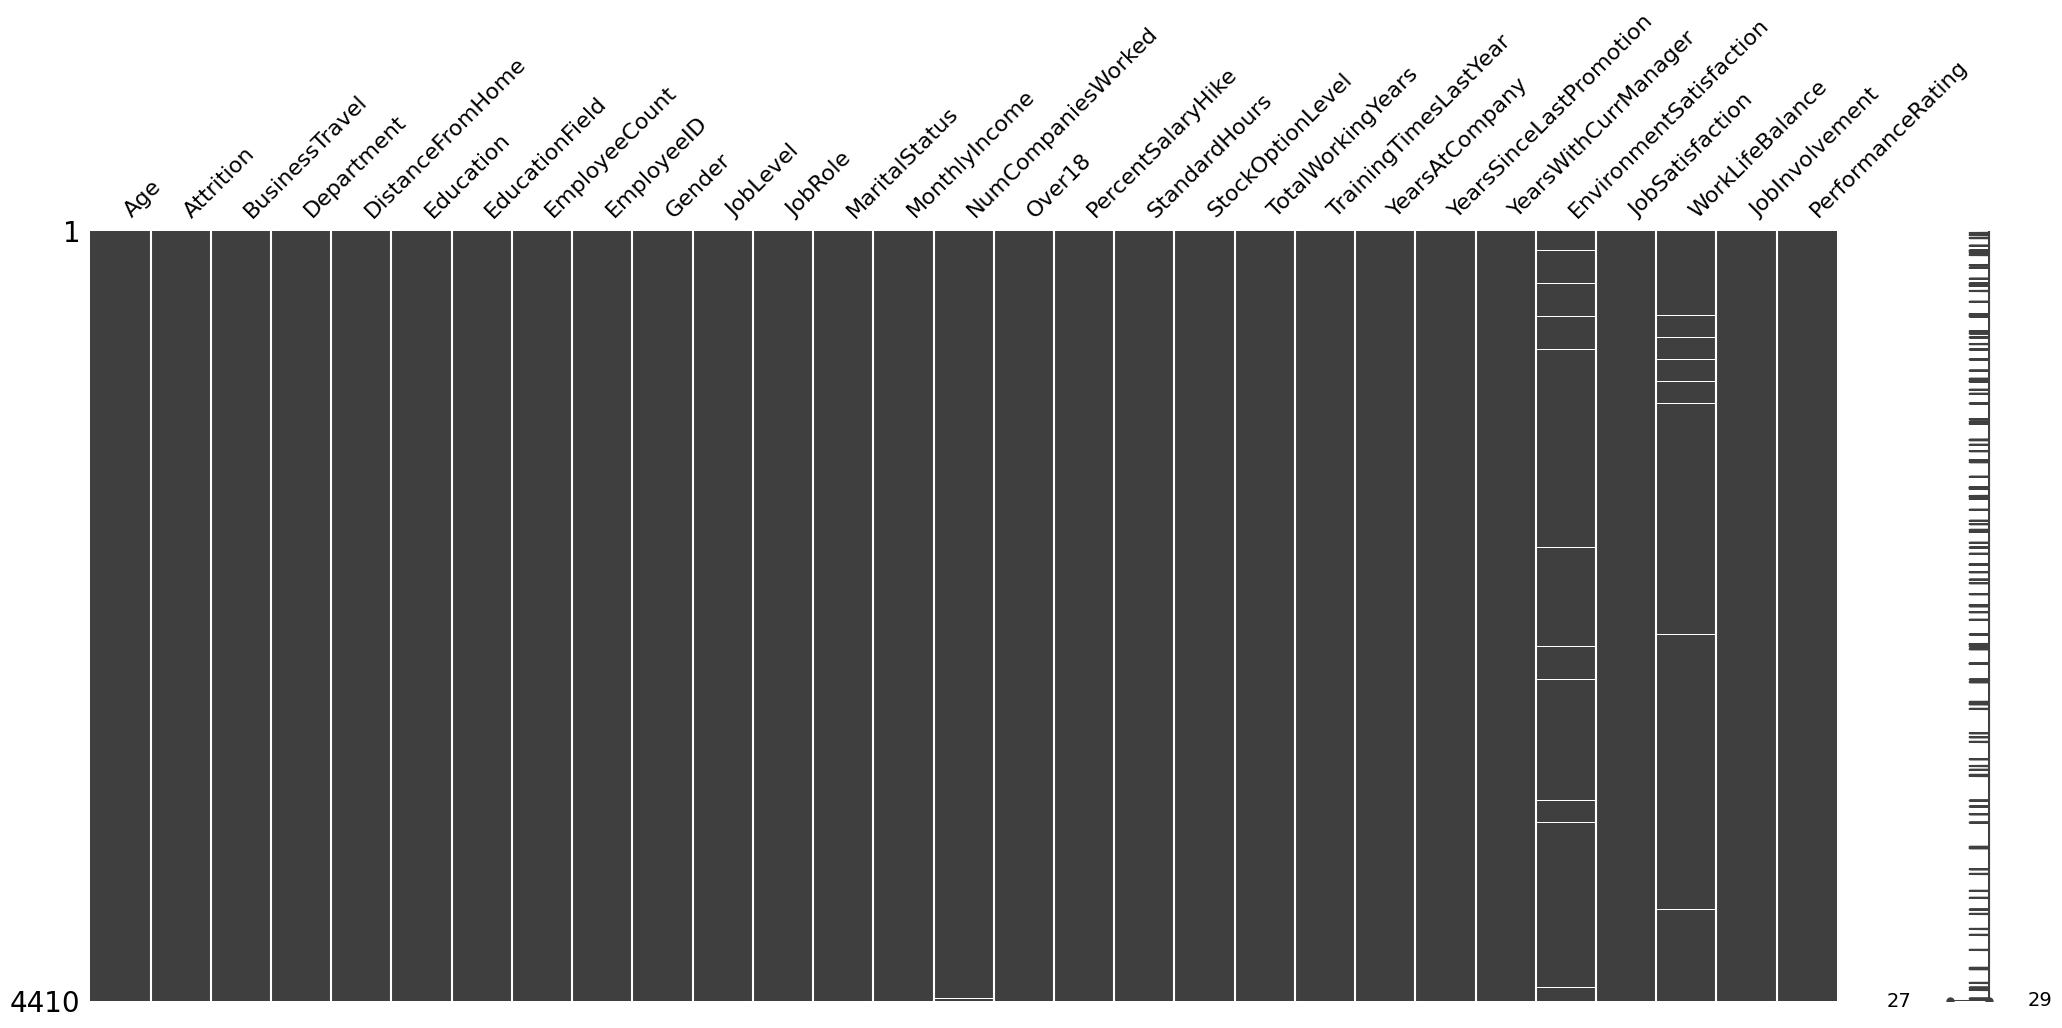

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [3]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
msno.matrix(merge2)
plt.show()

# Impute missing values
# For numerical columns, use median imputation
numerical_columns = merge2.select_dtypes(include=['float64', 'int64']).columns
merge2[numerical_columns] = merge2[numerical_columns].fillna(merge2[numerical_columns].median())

# For categorical columns, use mode imputation
categorical_columns = merge2.select_dtypes(include=['object']).columns
merge2[categorical_columns] = merge2[categorical_columns].fillna(merge2[categorical_columns].mode().iloc[0])

# Verify that there are no more missing values
merge2.isnull().sum()

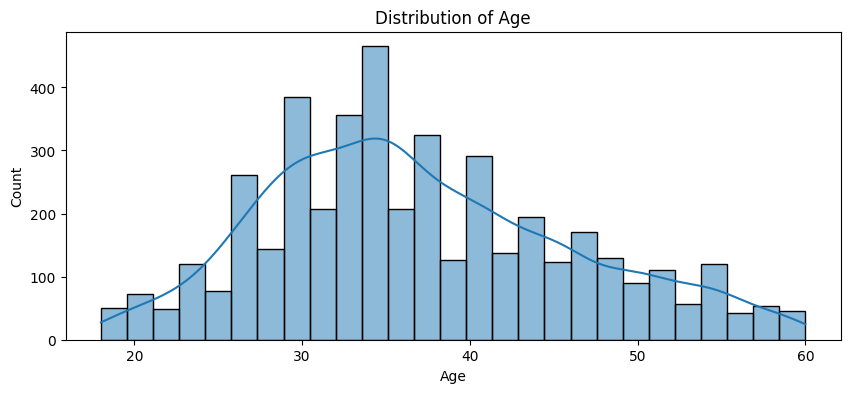

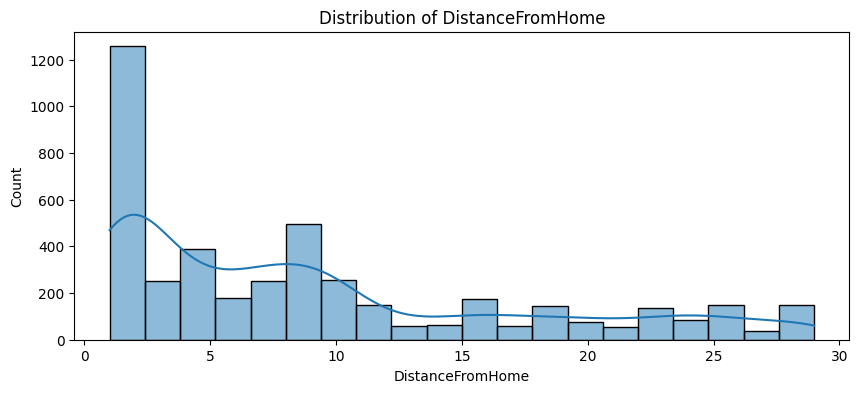

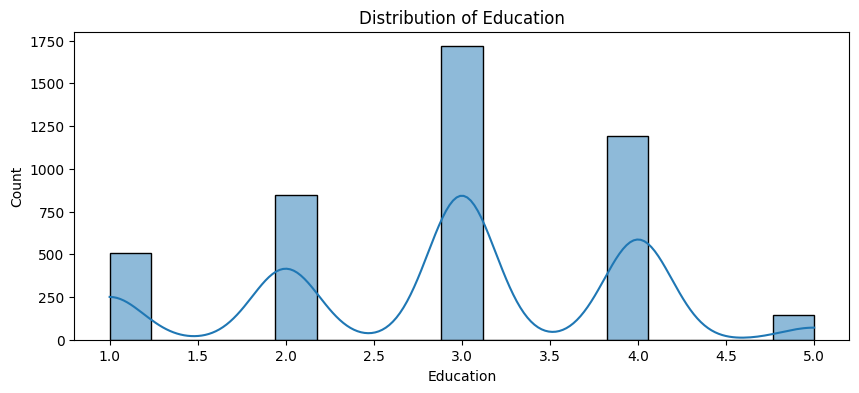

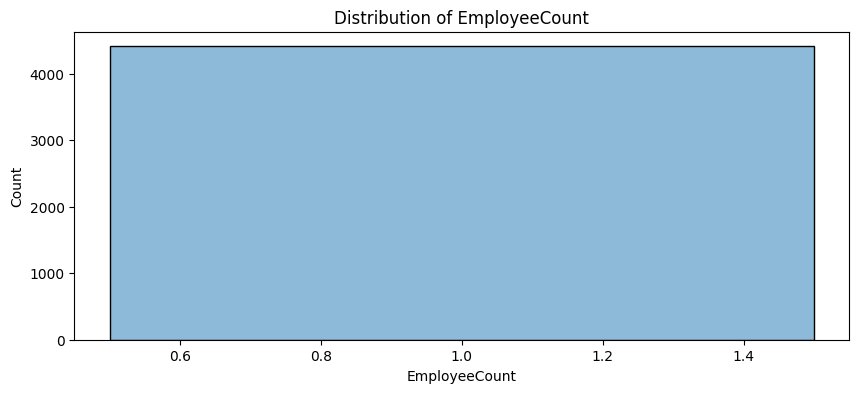

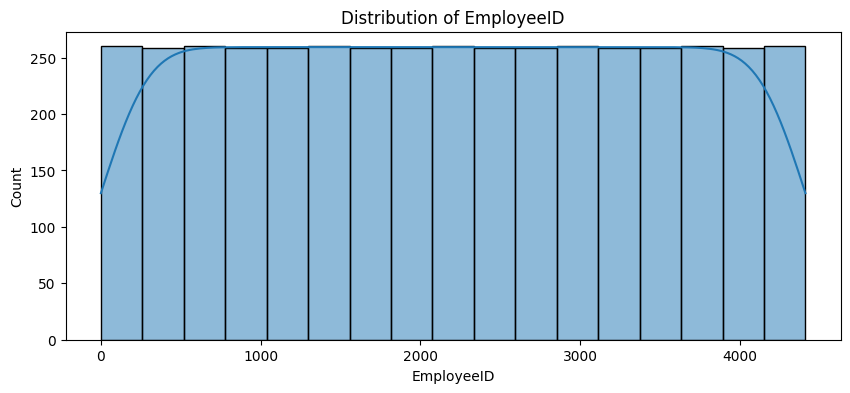

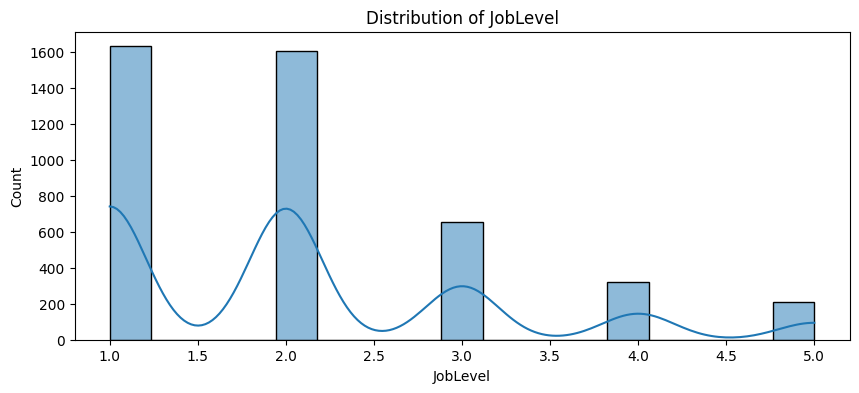

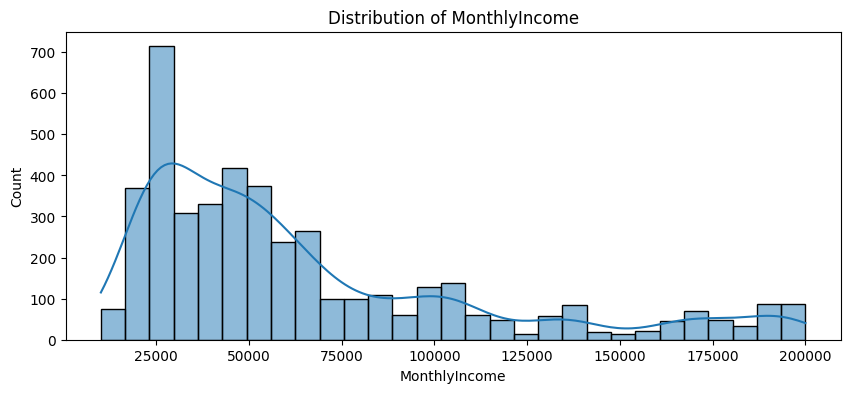

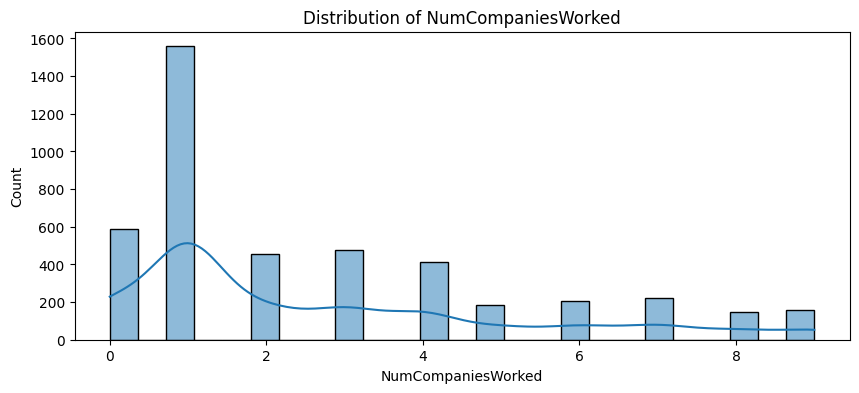

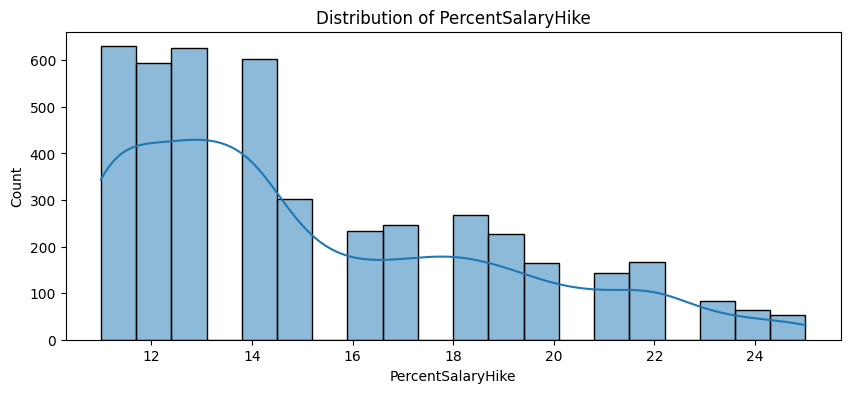

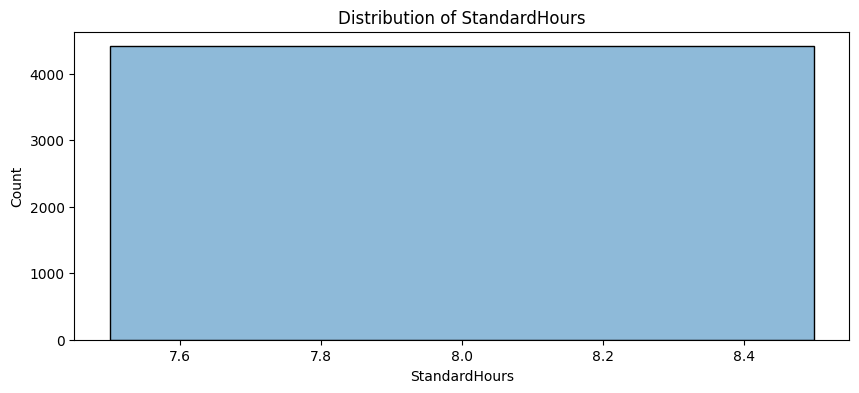

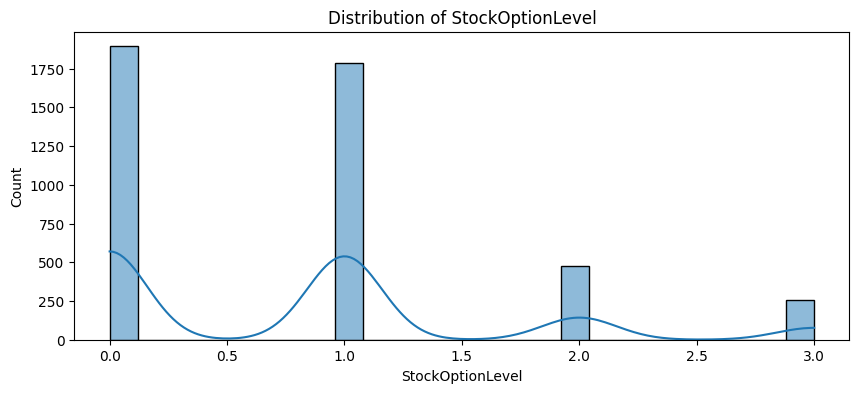

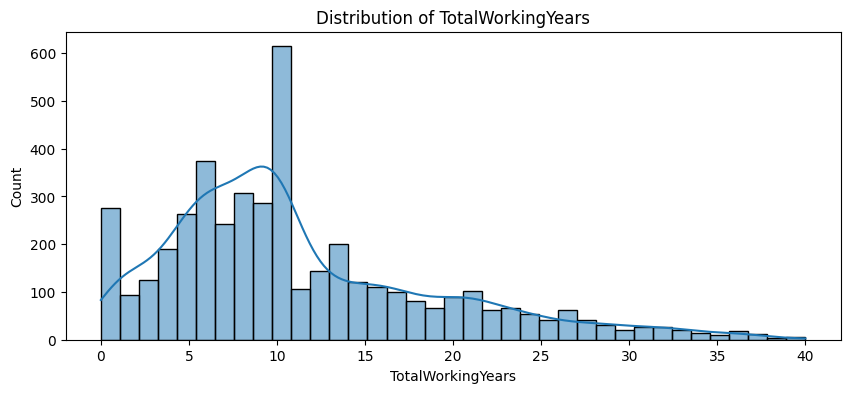

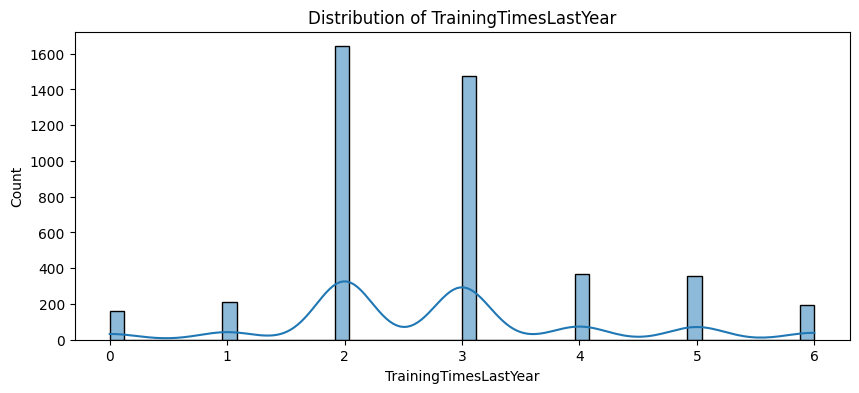

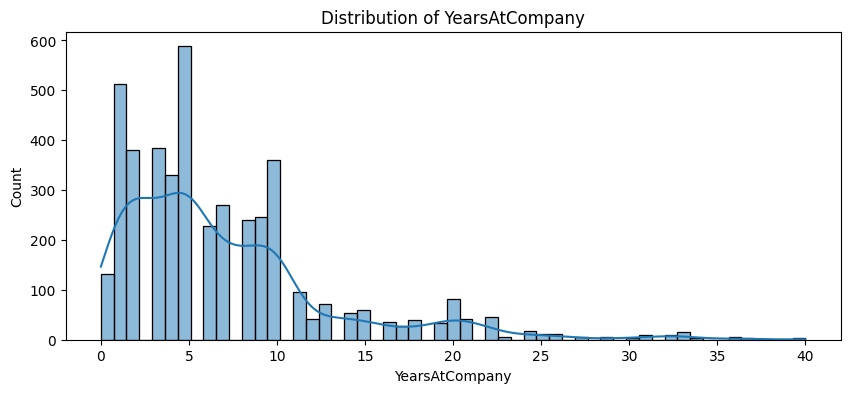

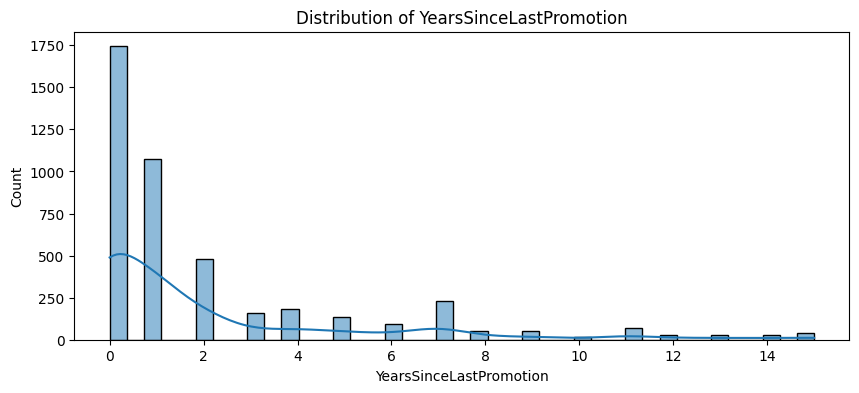

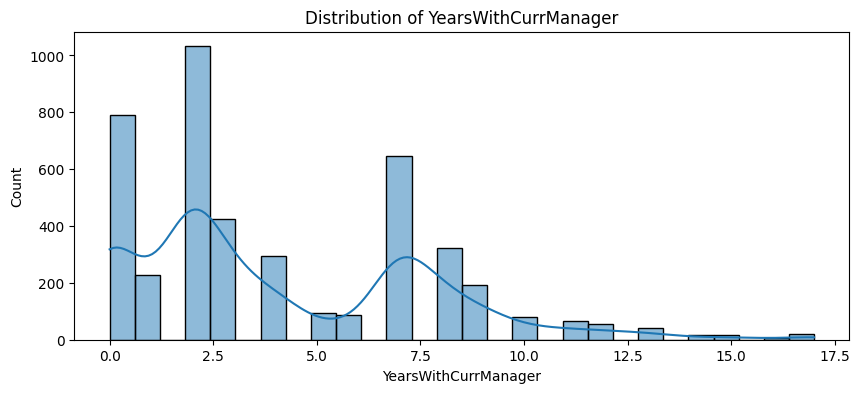

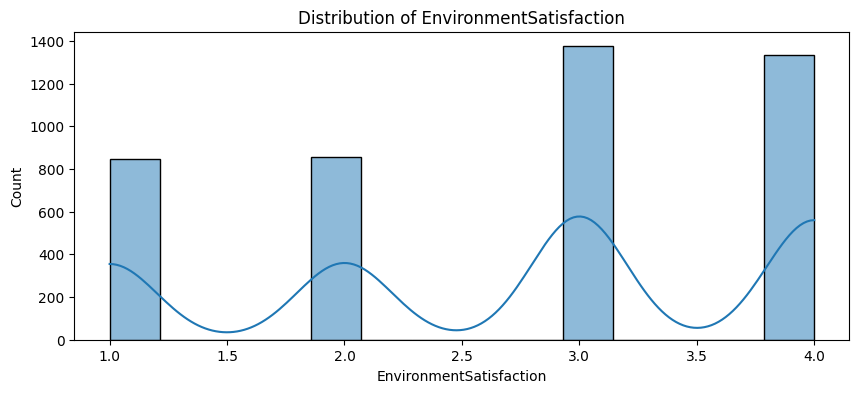

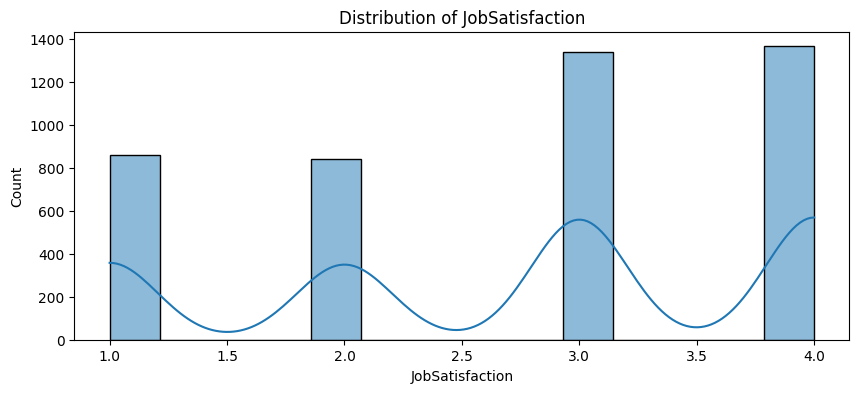

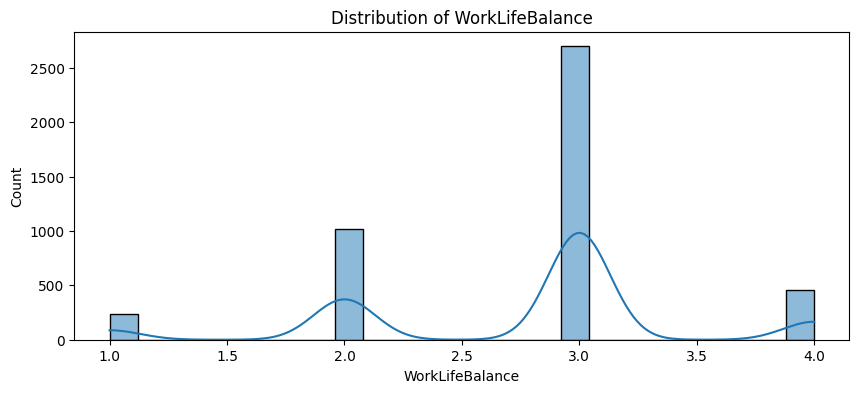

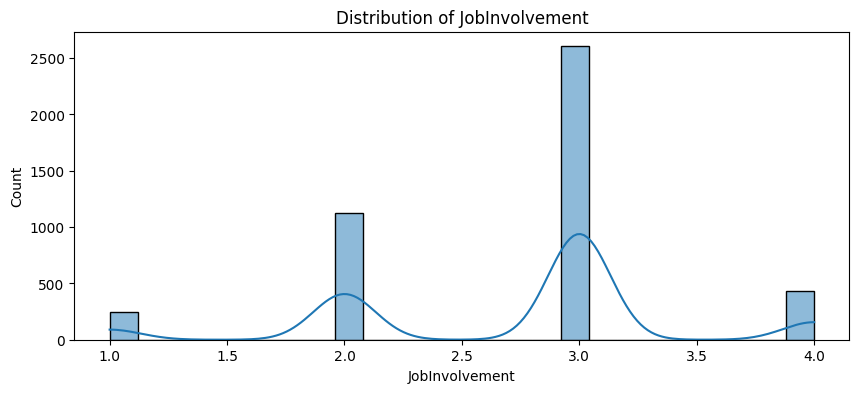

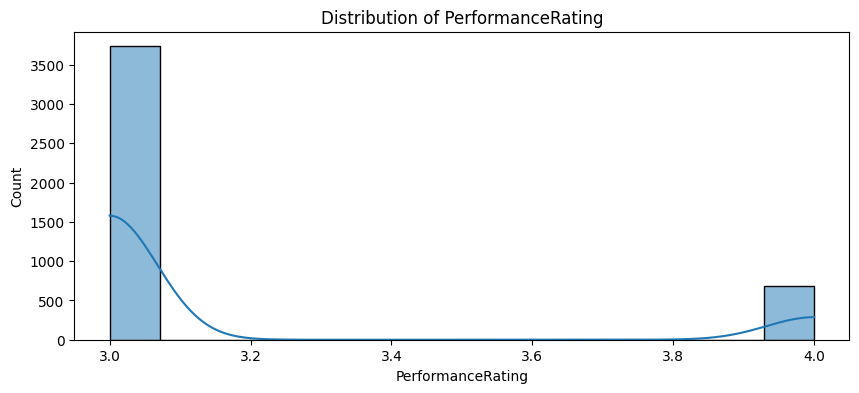

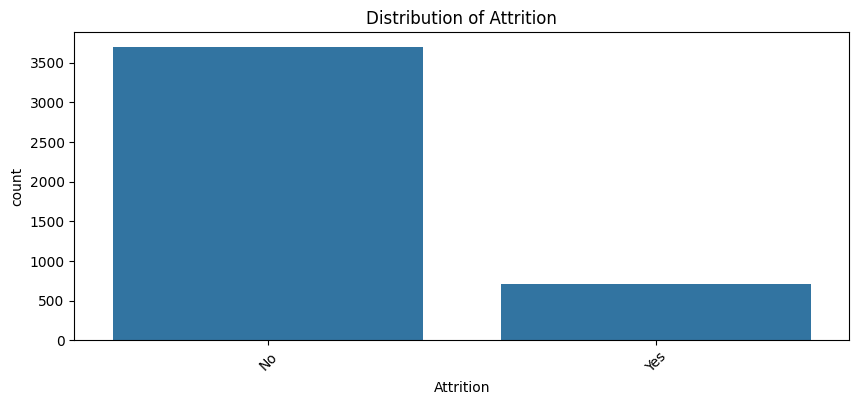

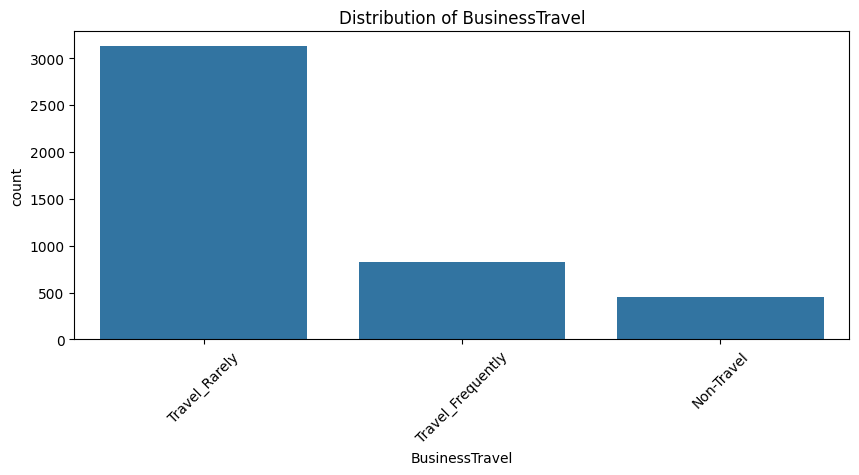

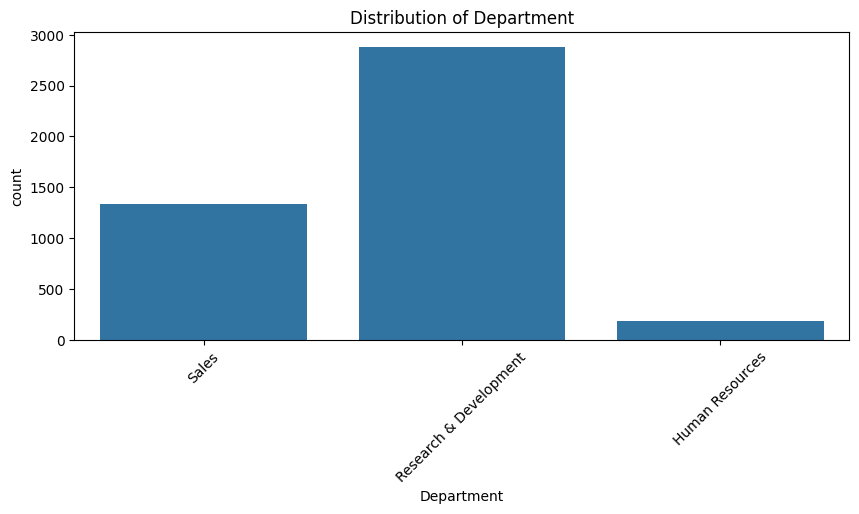

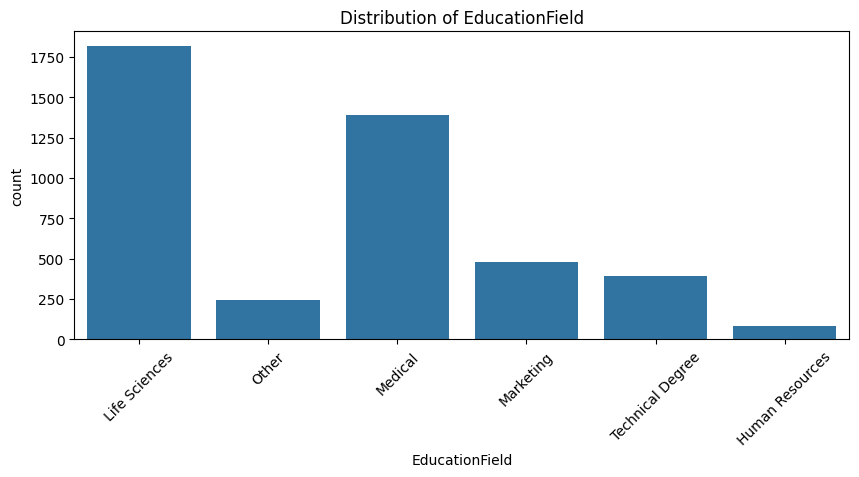

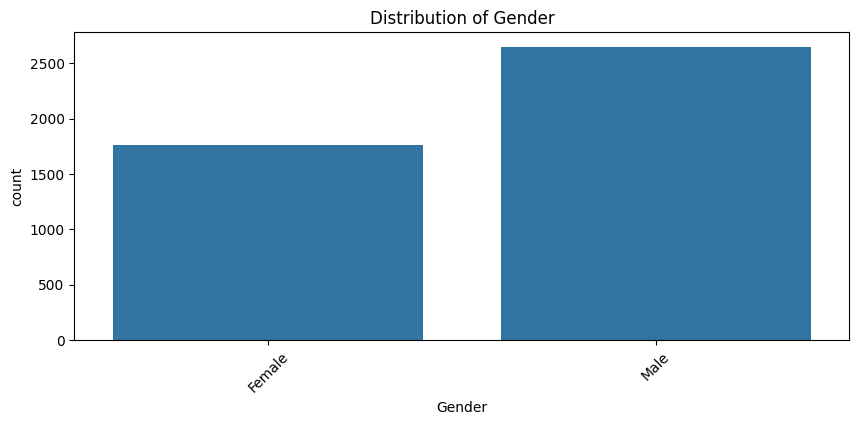

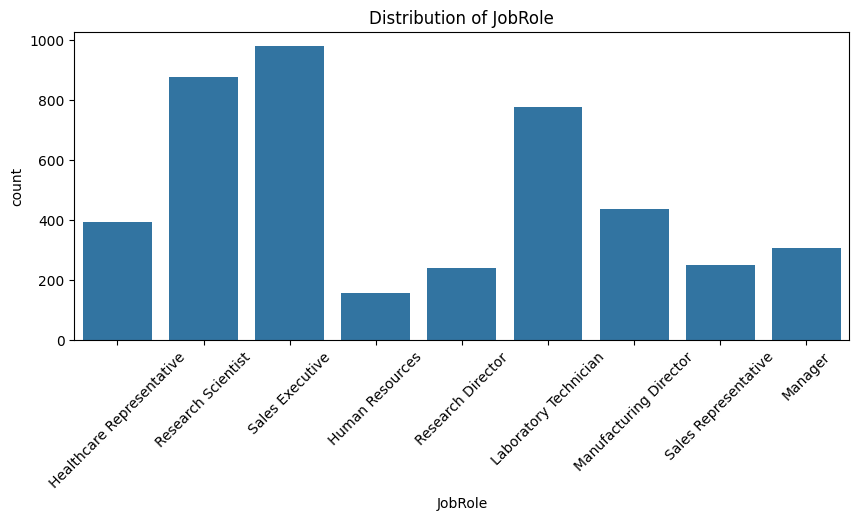

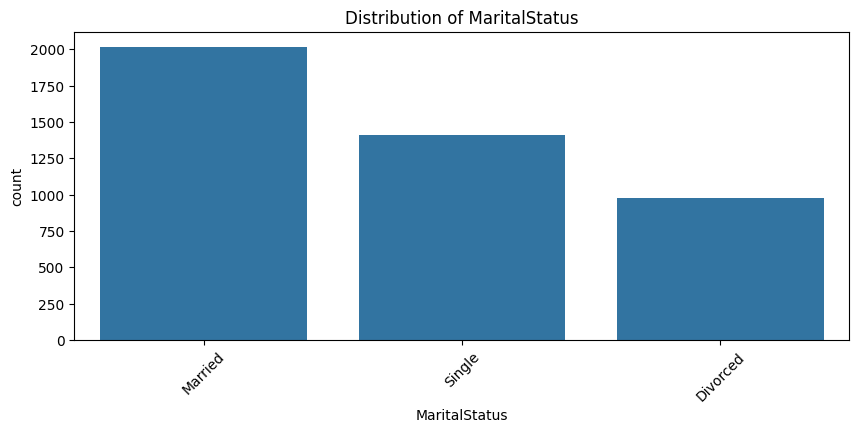

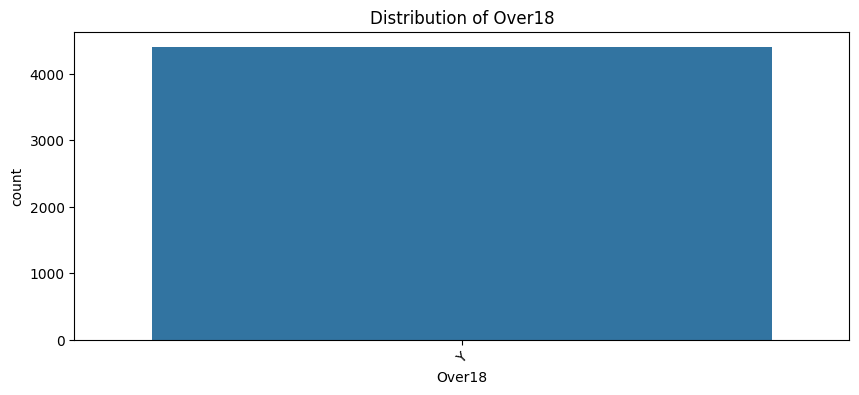

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(x=merge2[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()    

# Univariate analysis for categorical features
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=merge2[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show() # Show plot

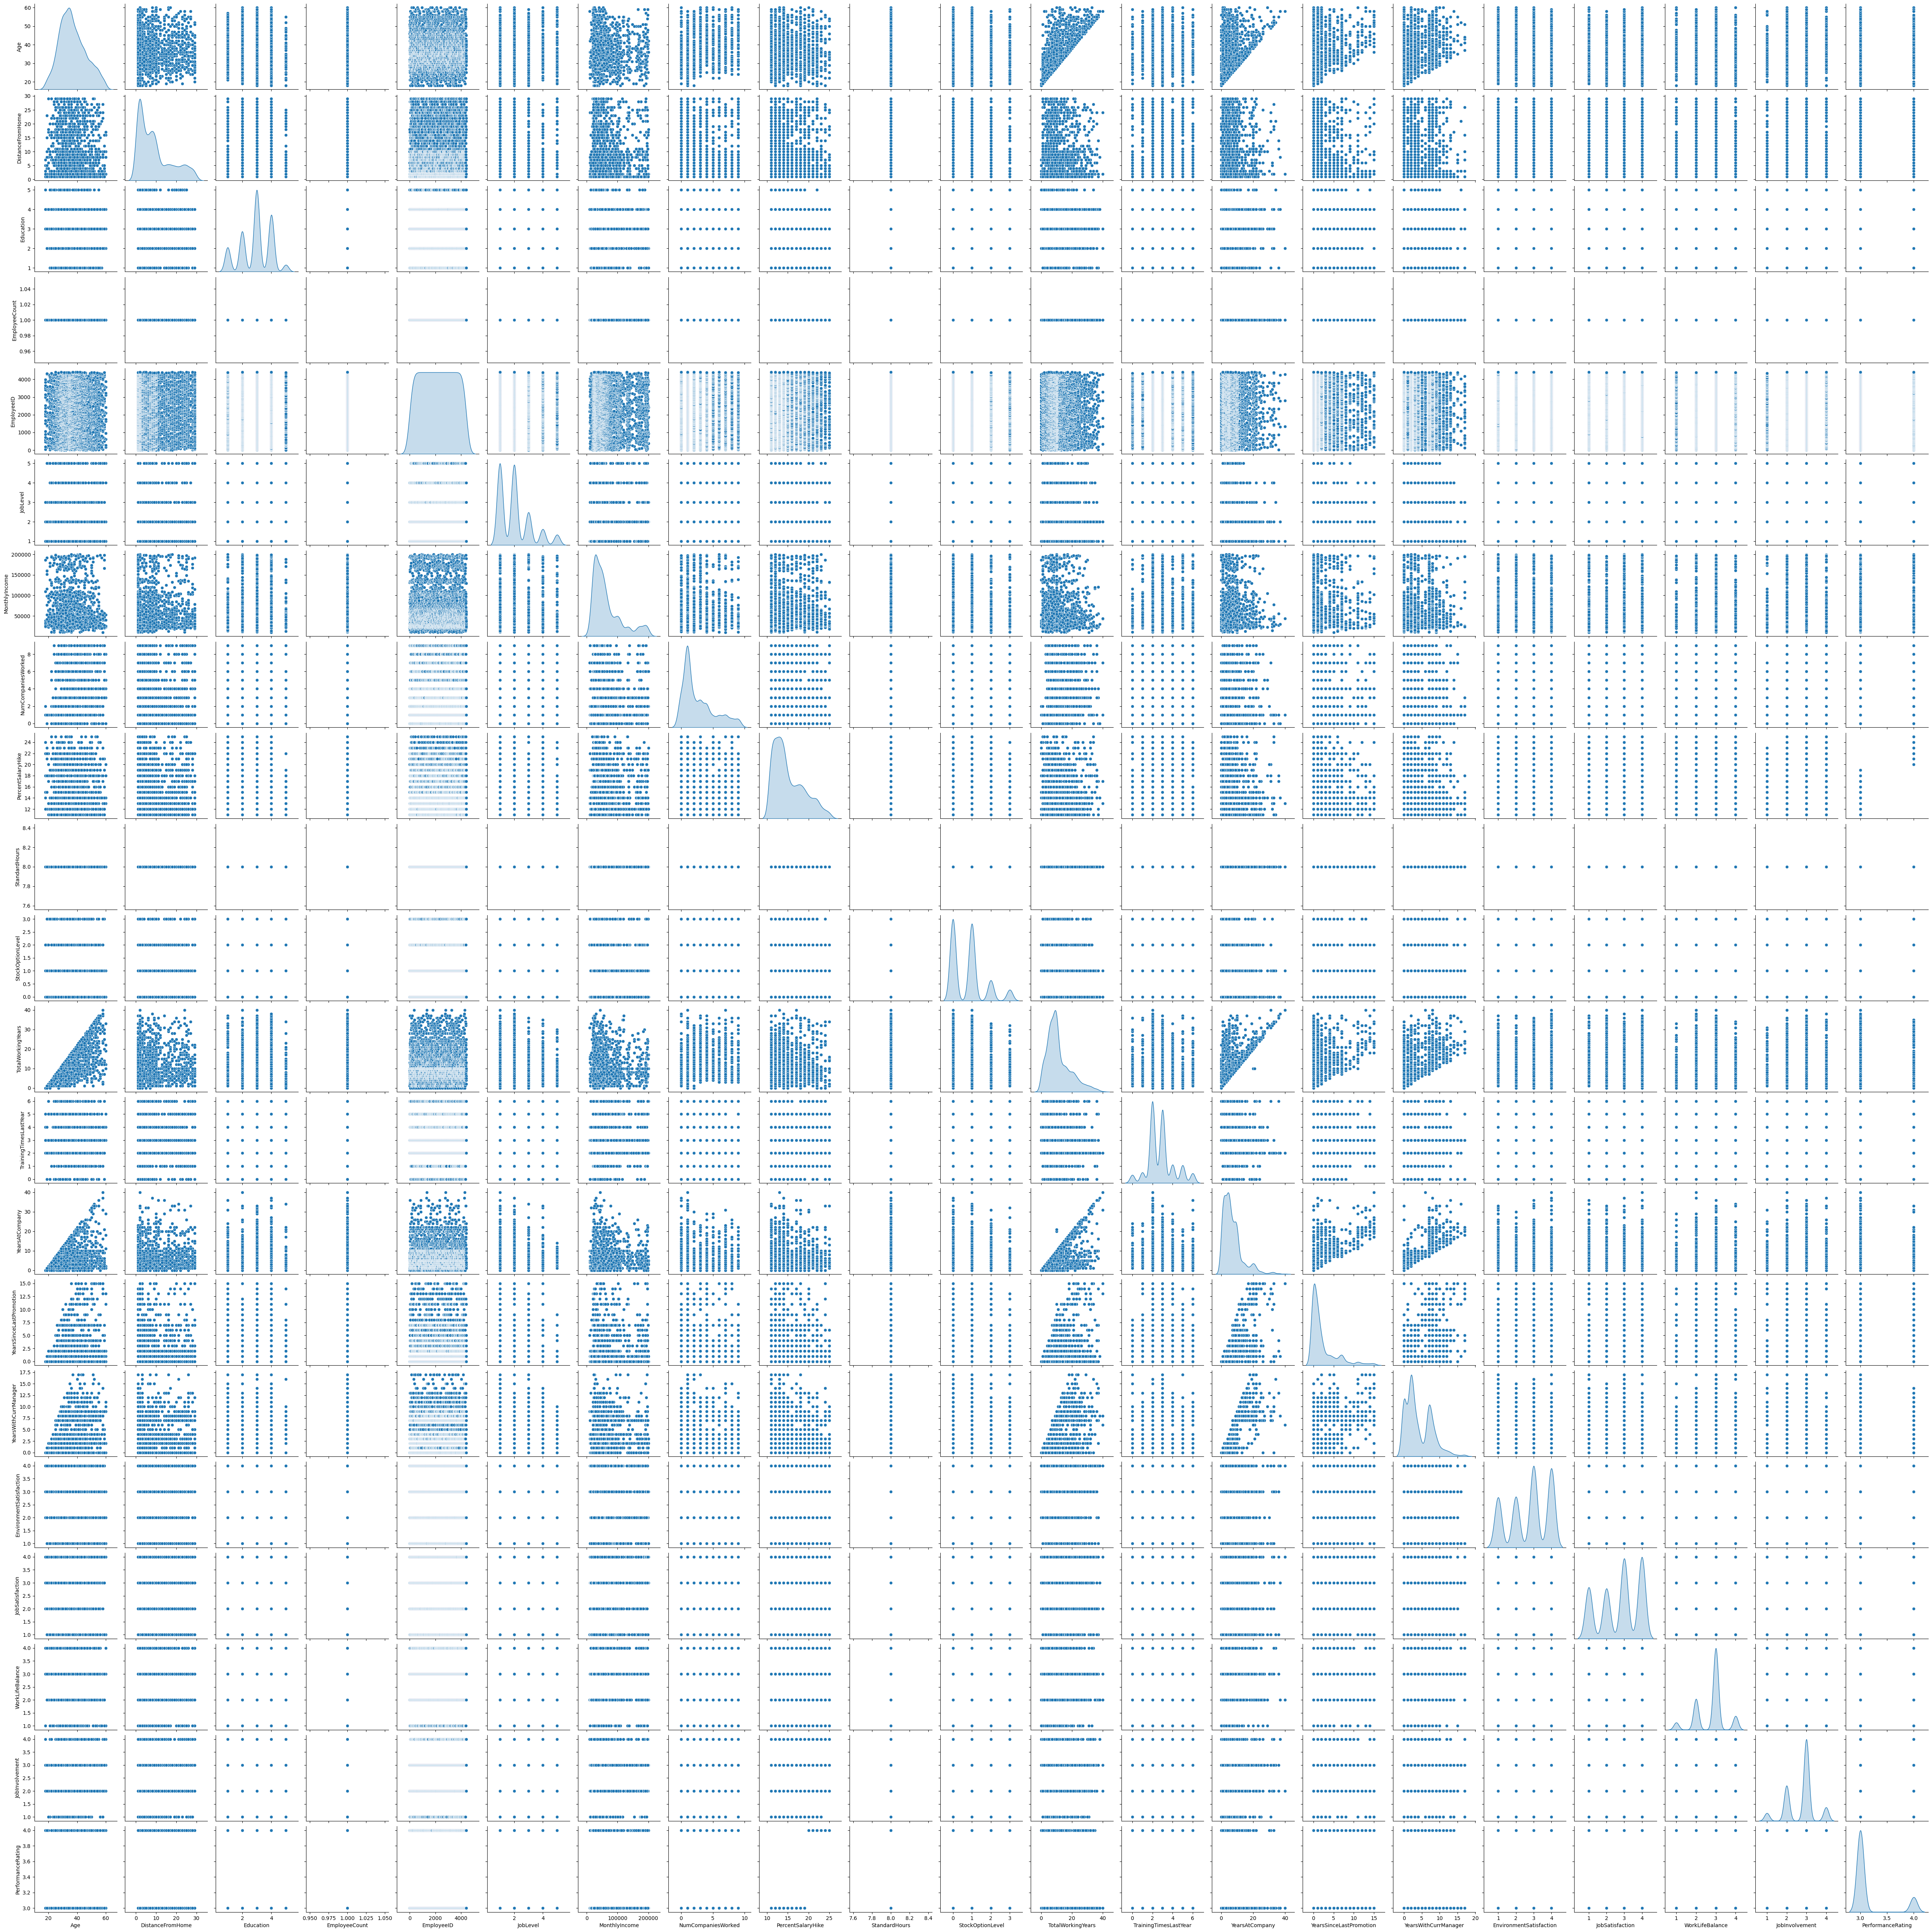

In [7]:
sns.pairplot(merge2[numerical_columns], diag_kind='kde')
plt.show()

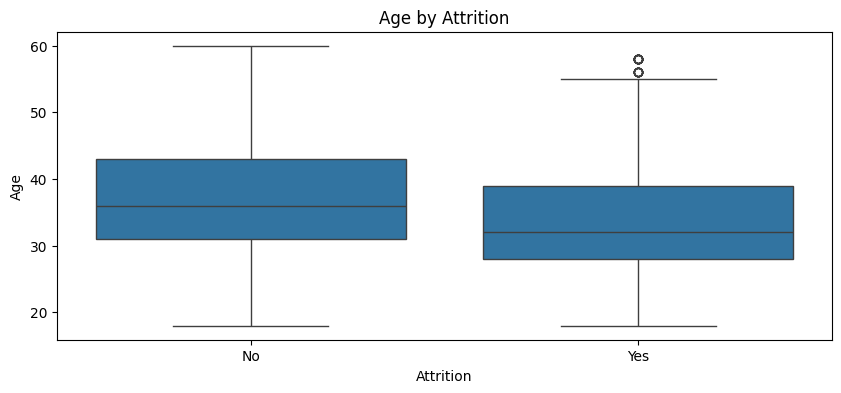

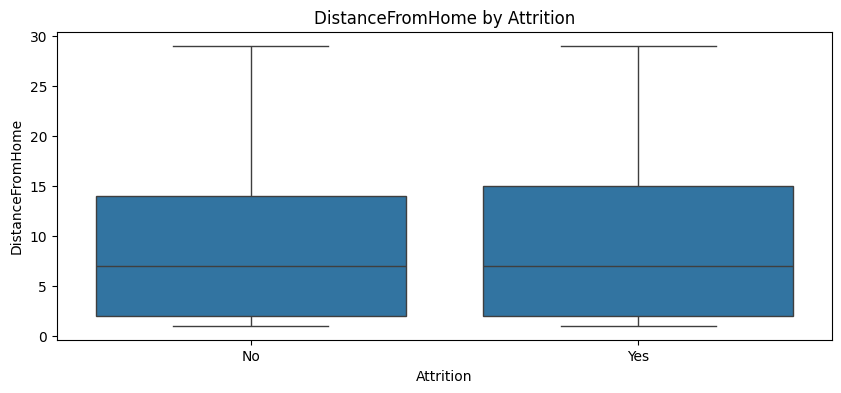

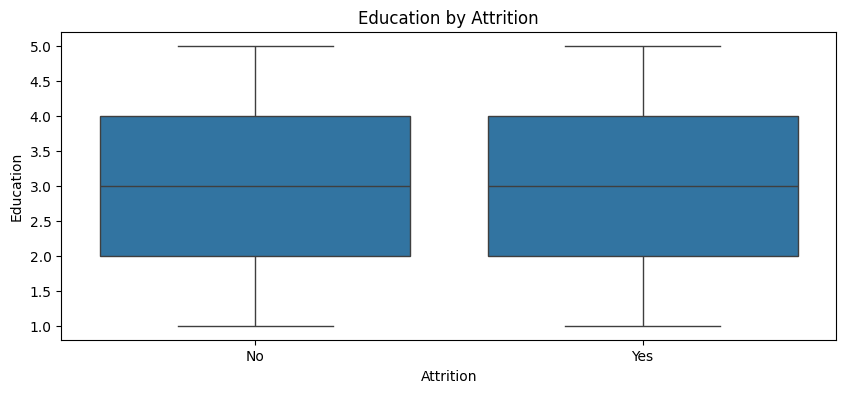

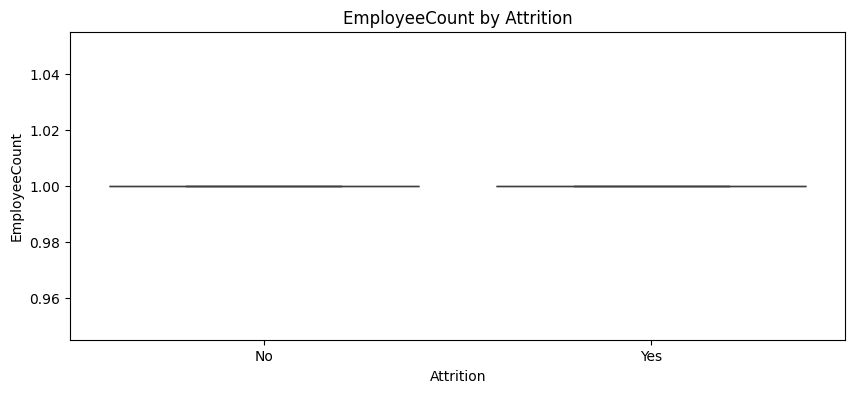

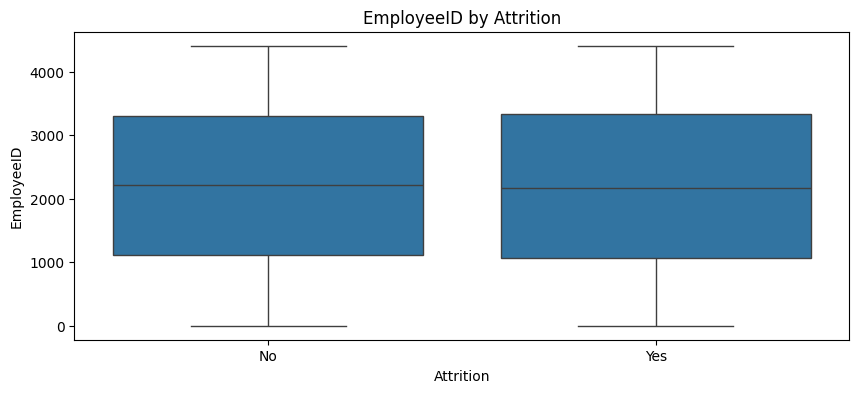

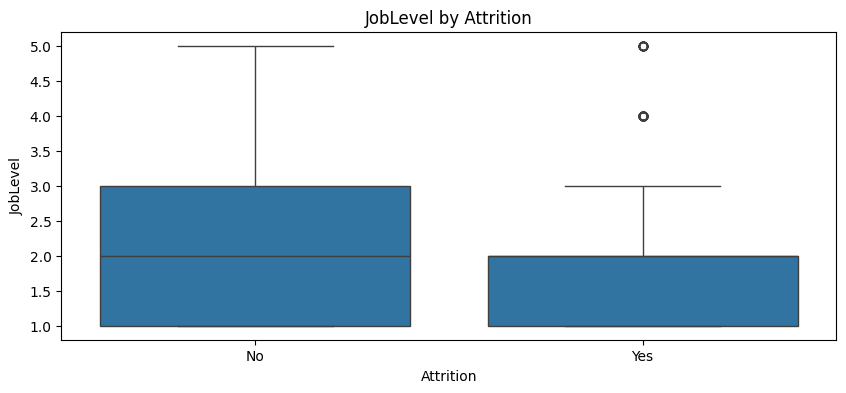

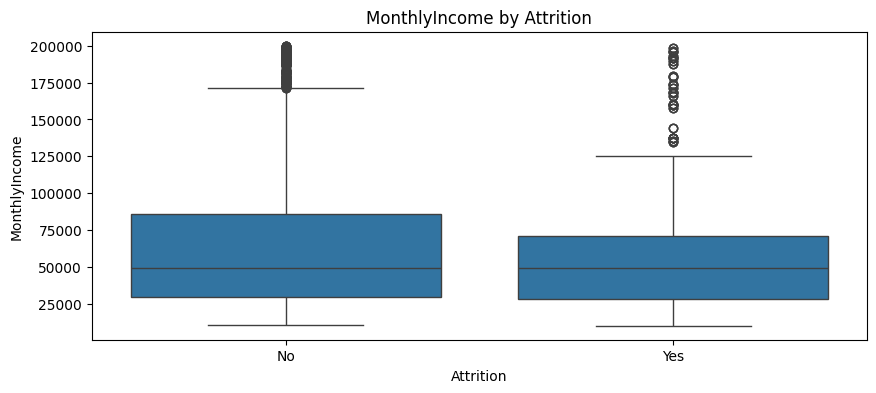

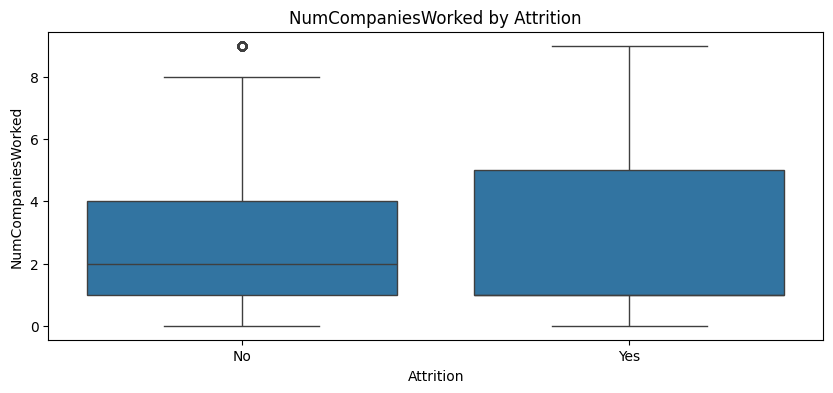

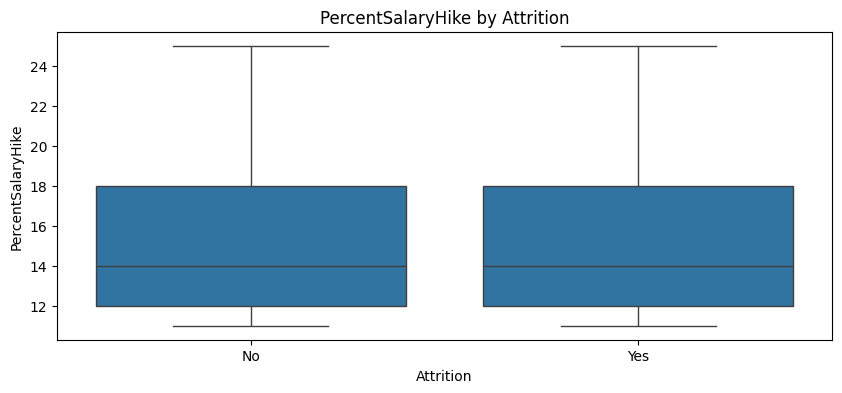

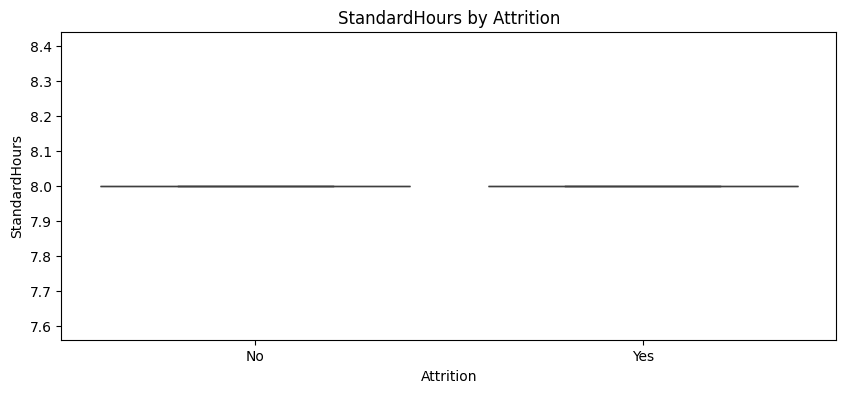

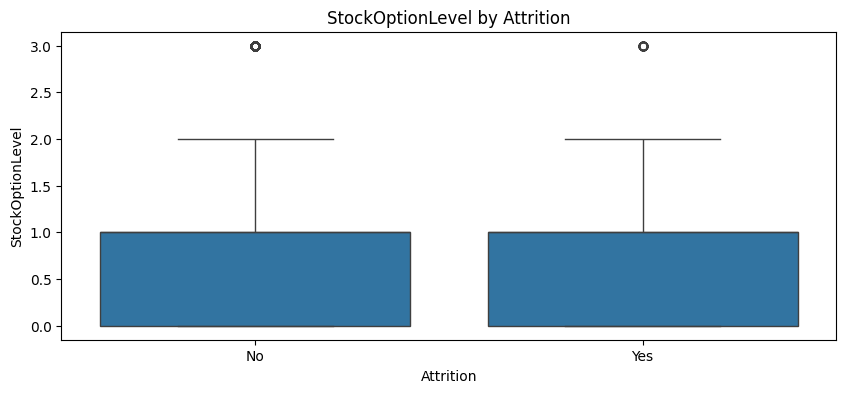

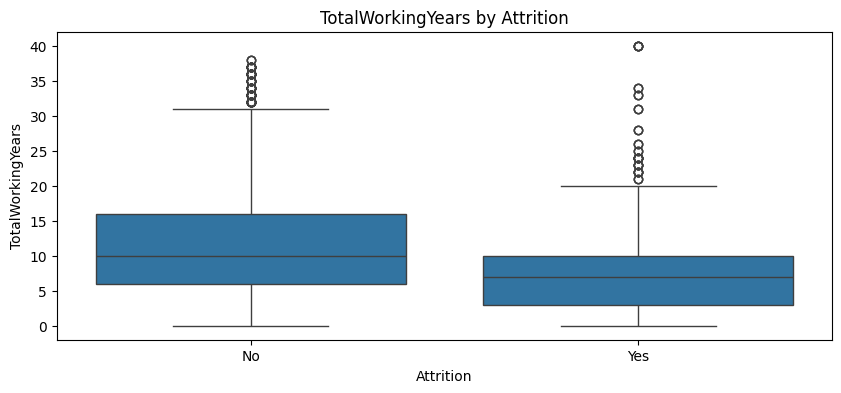

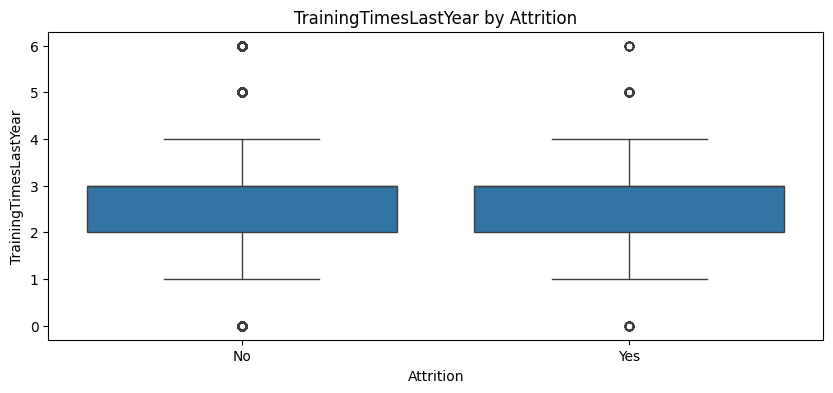

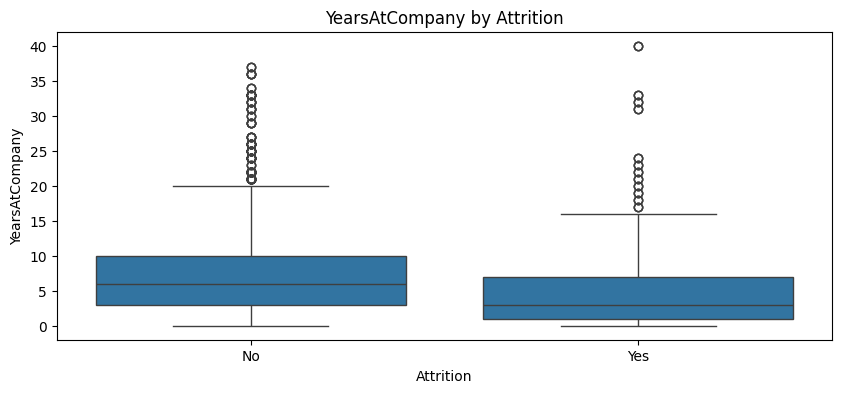

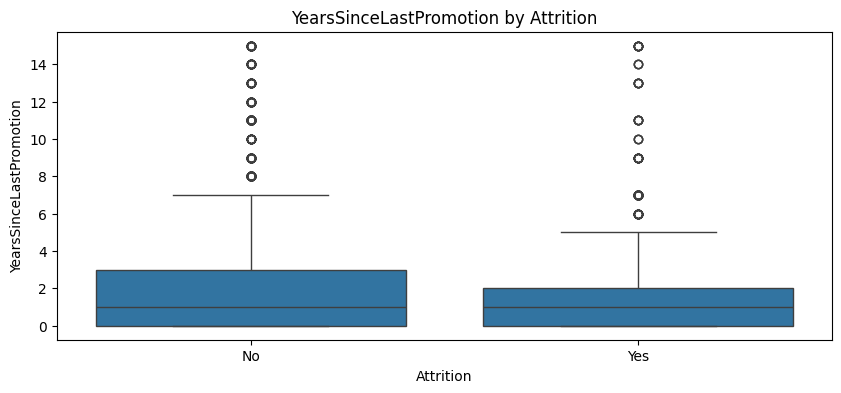

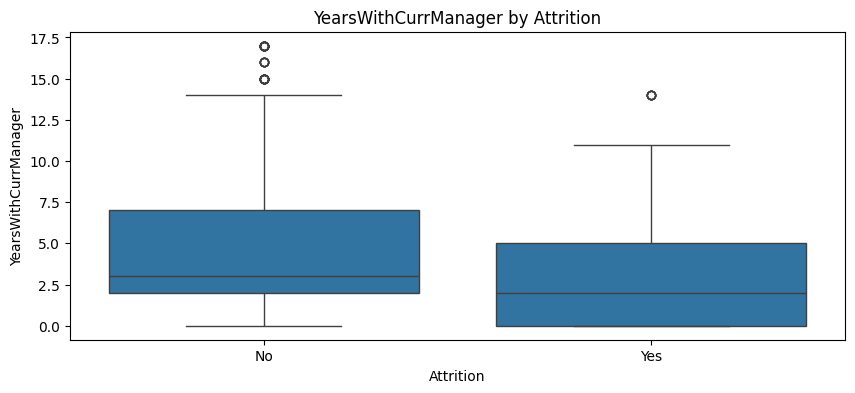

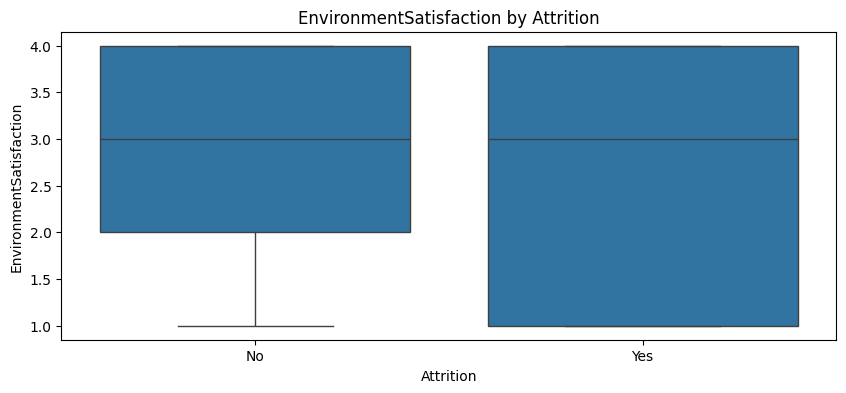

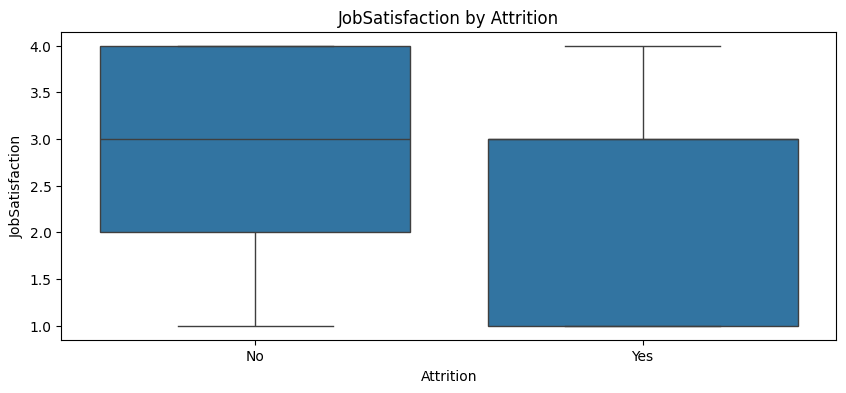

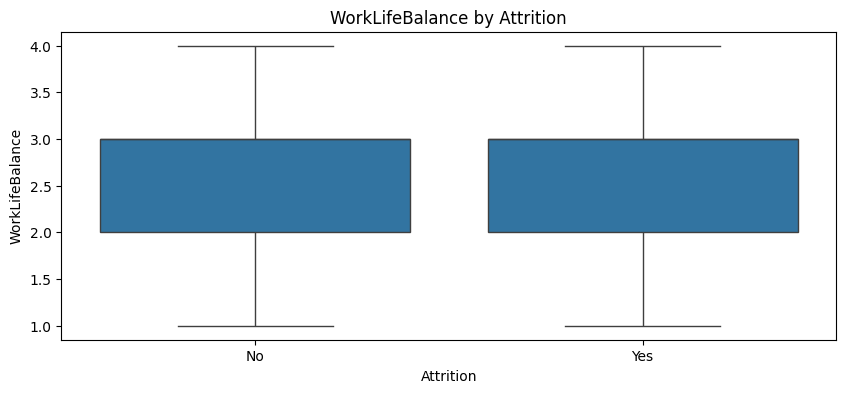

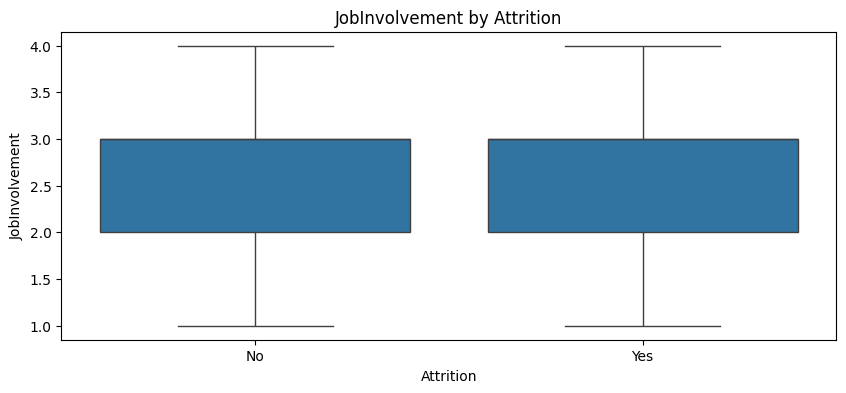

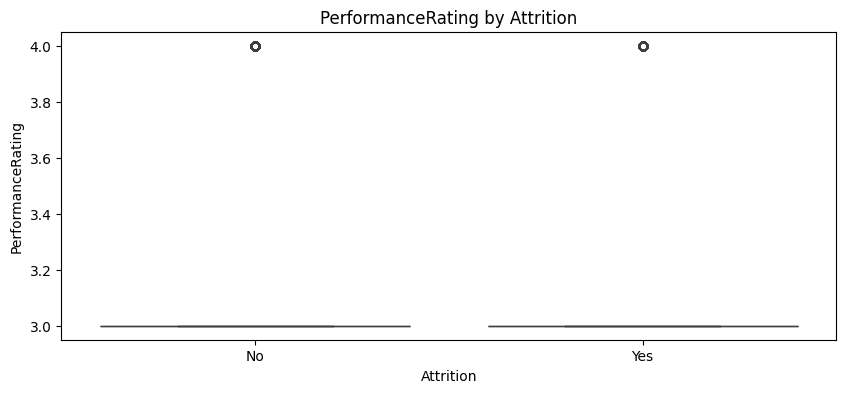

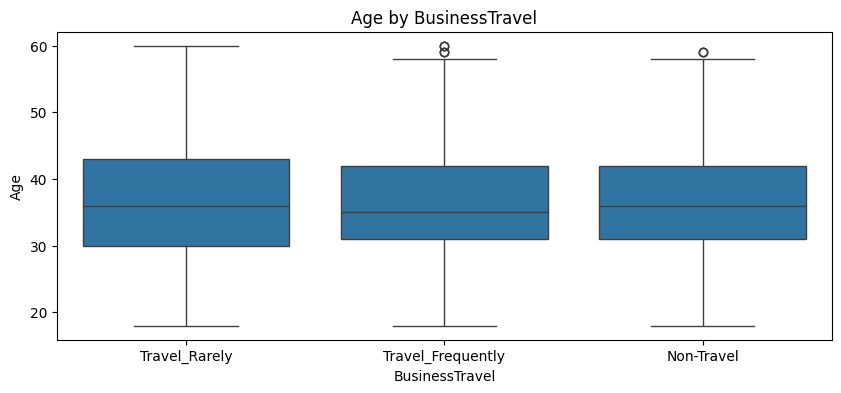

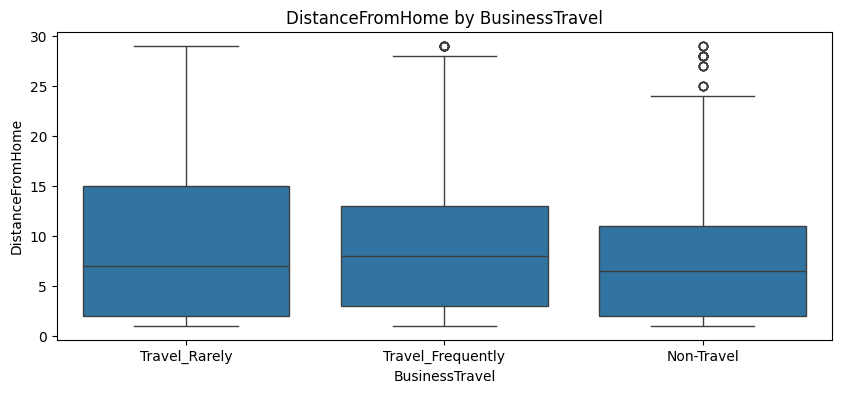

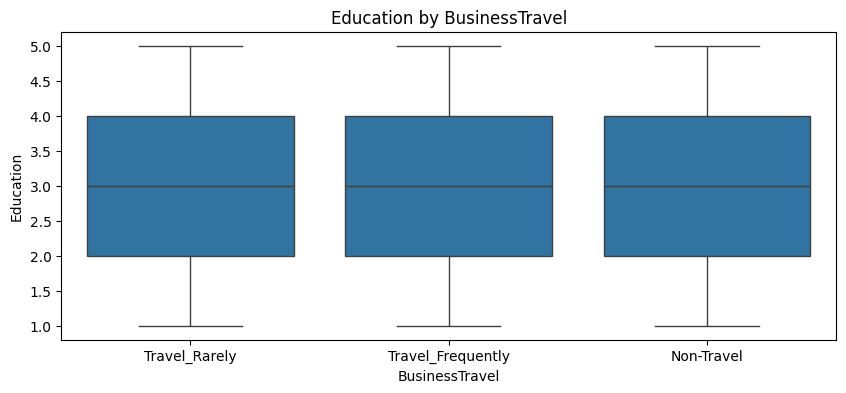

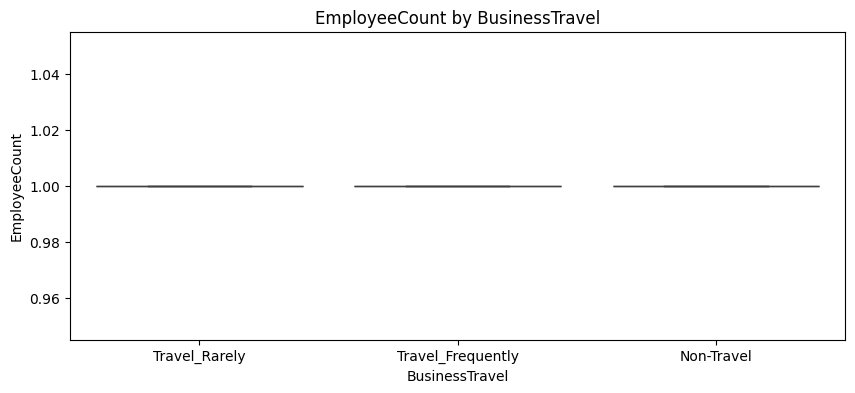

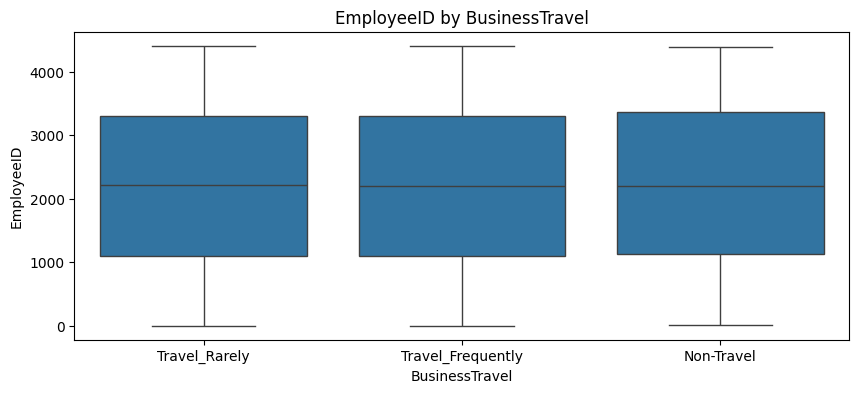

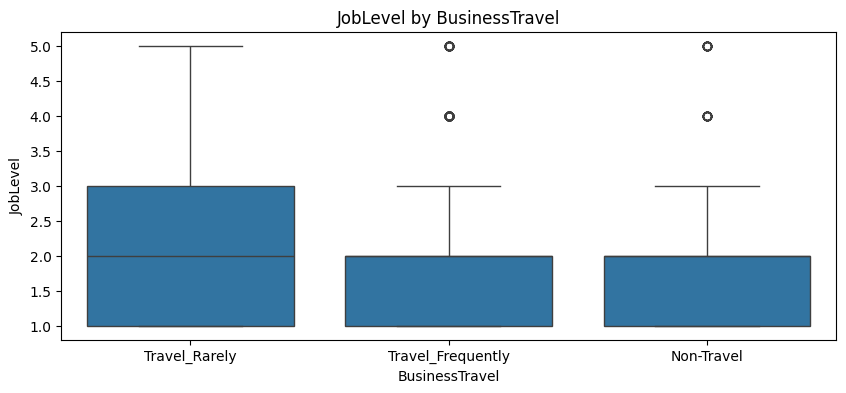

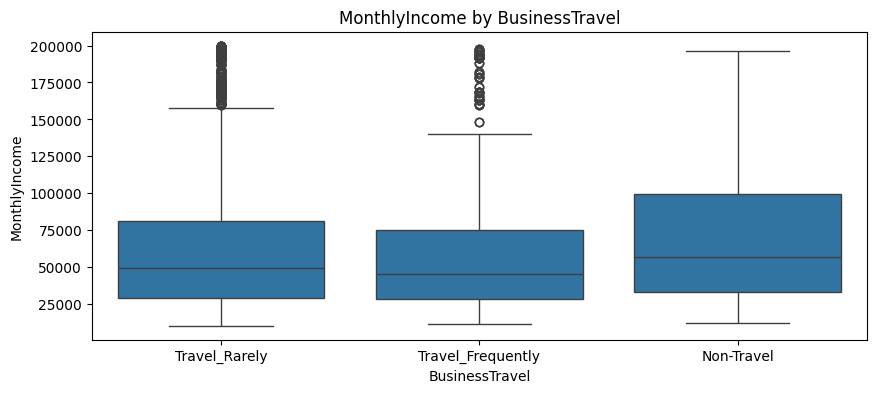

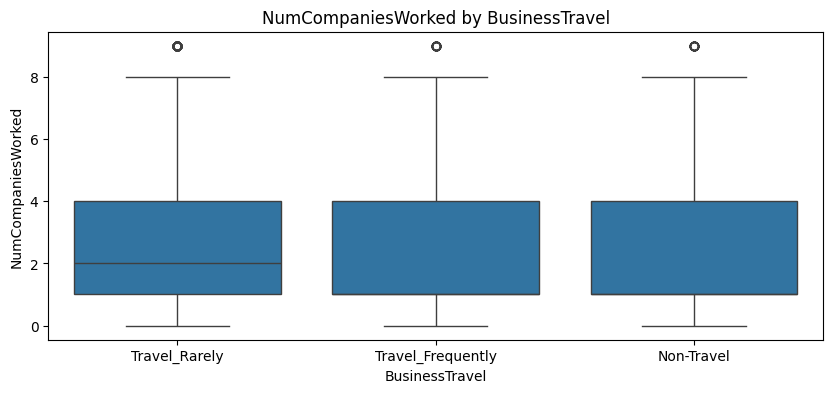

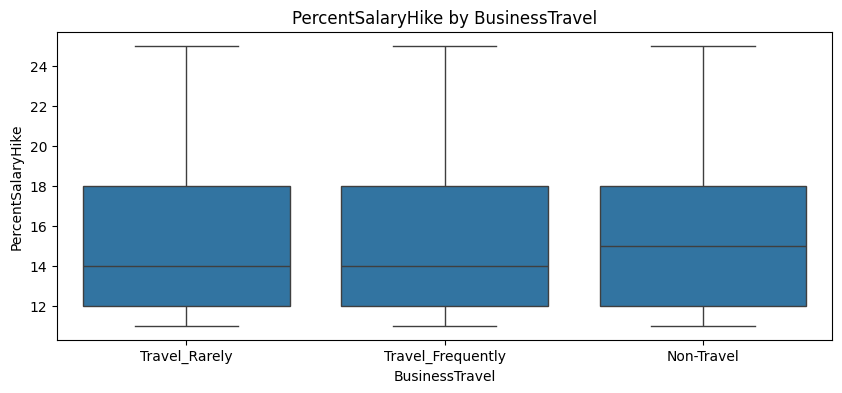

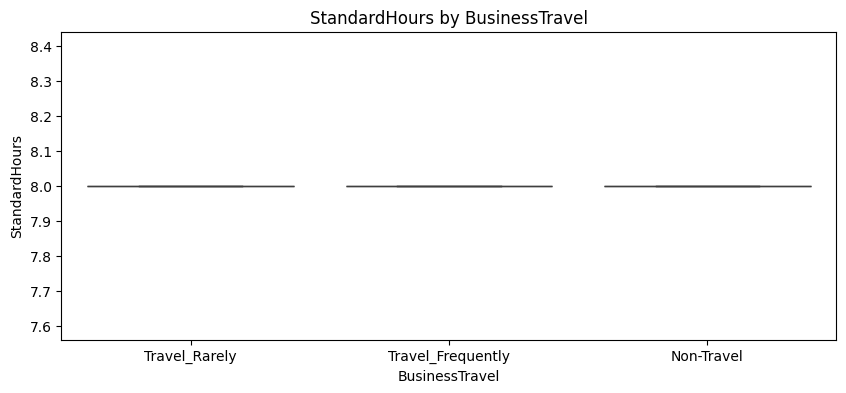

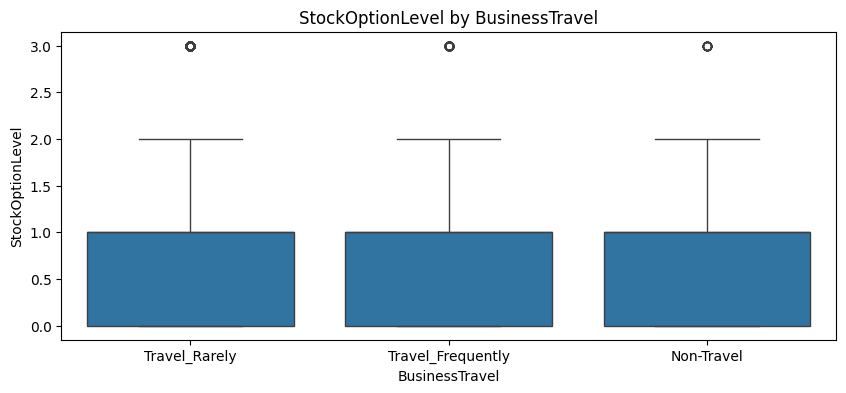

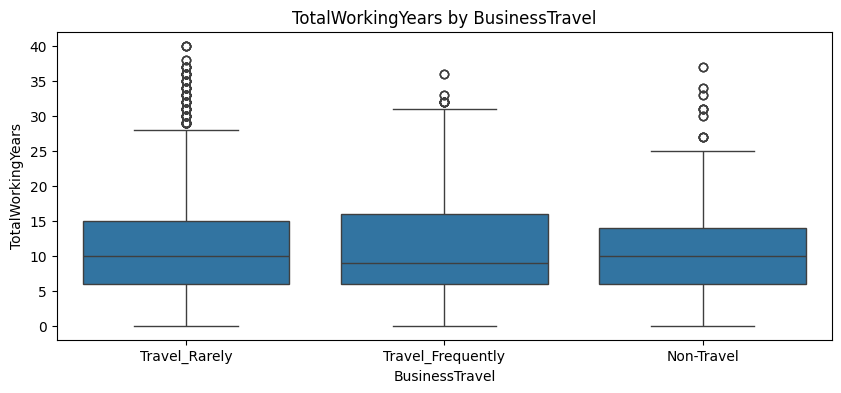

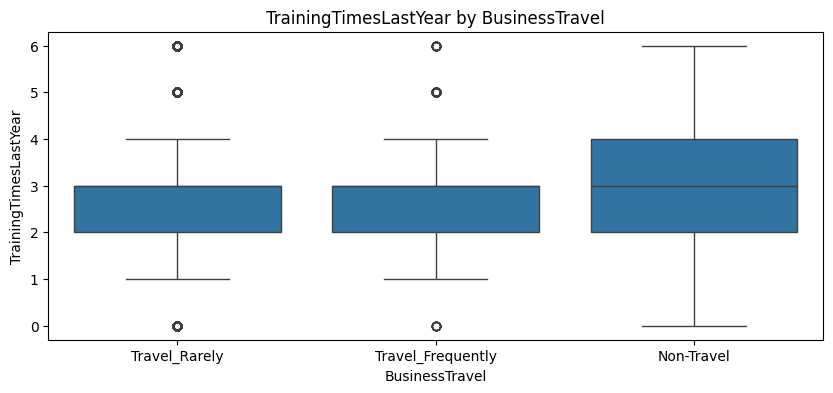

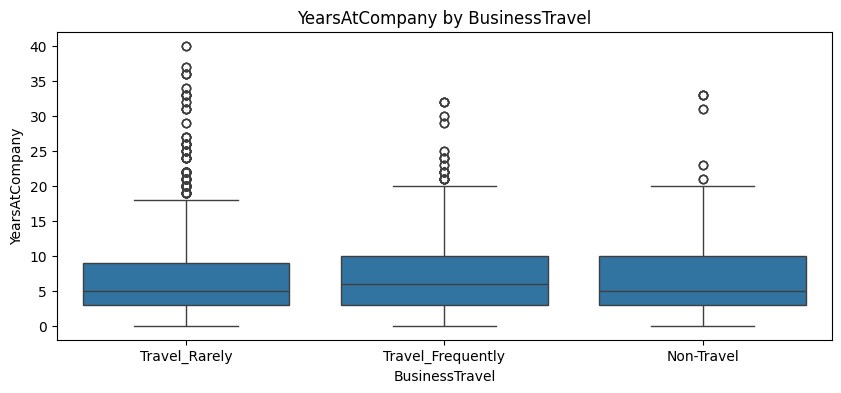

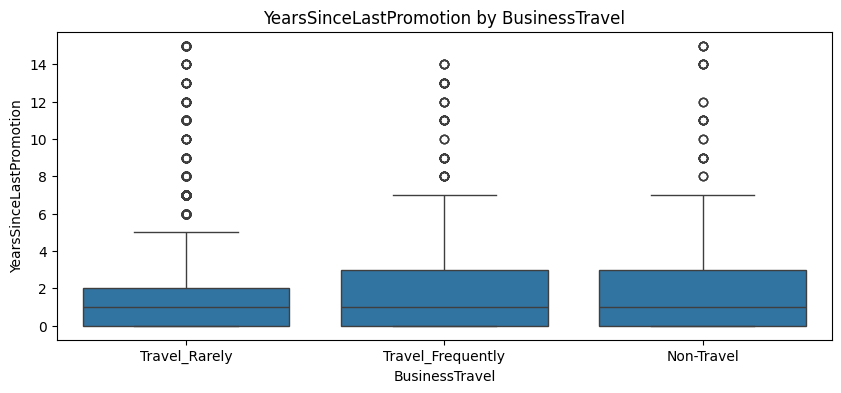

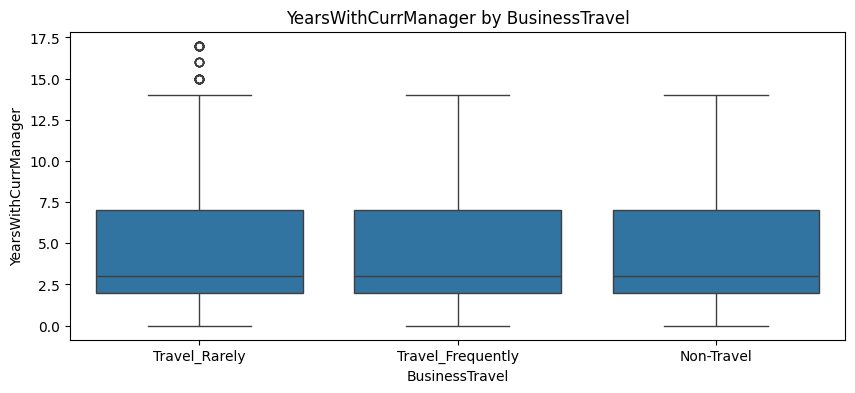

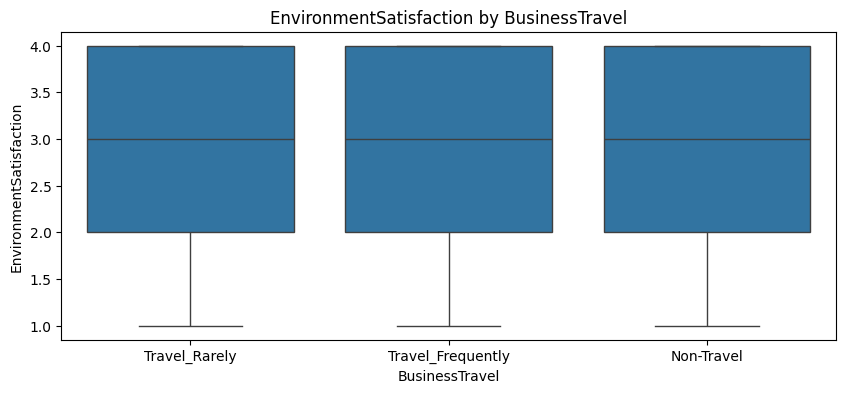

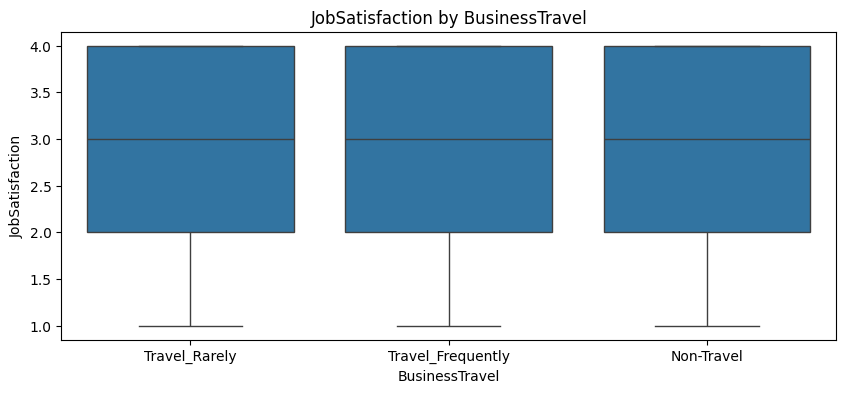

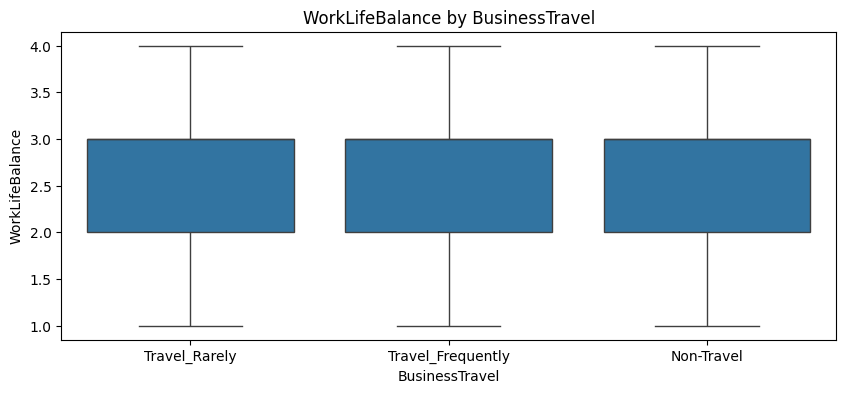

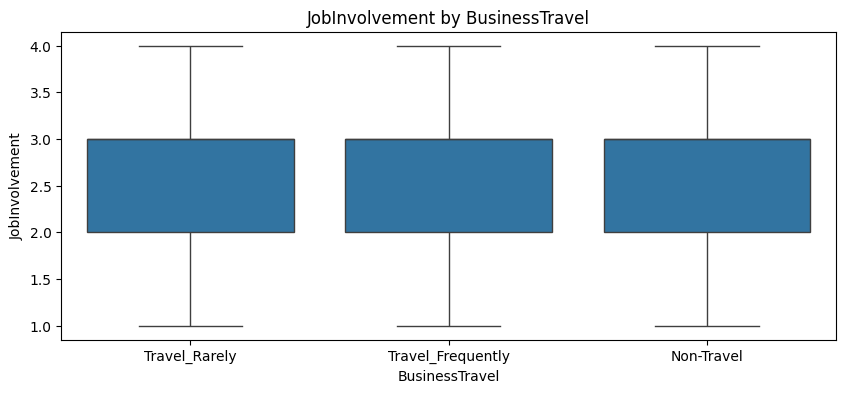

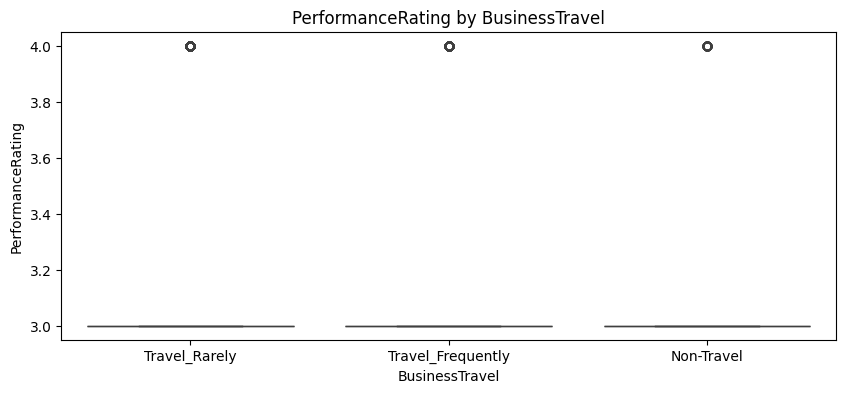

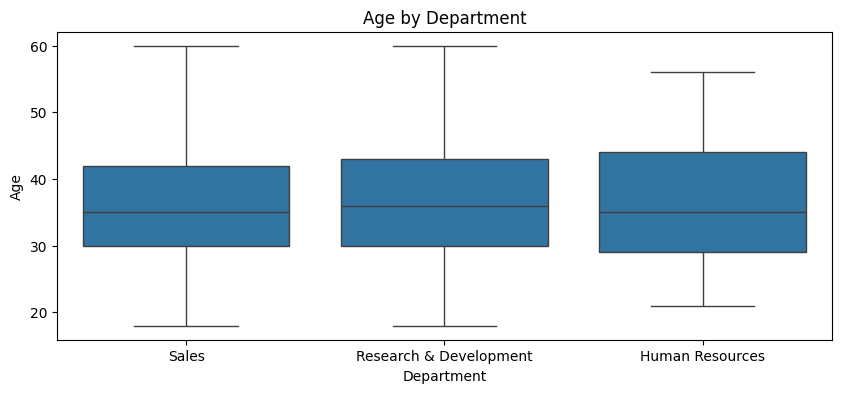

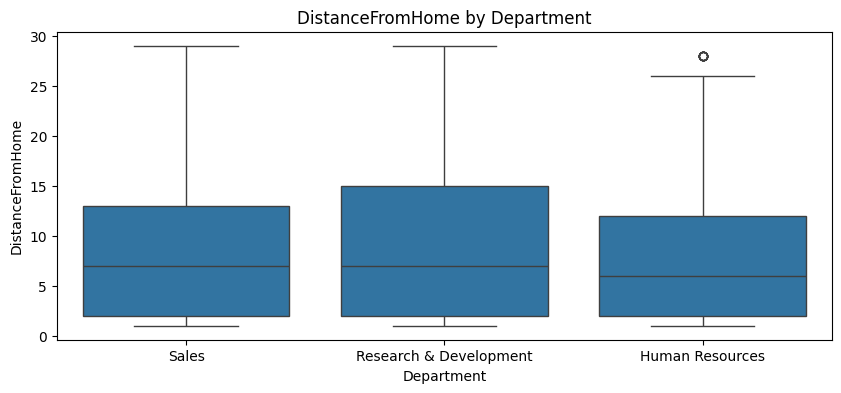

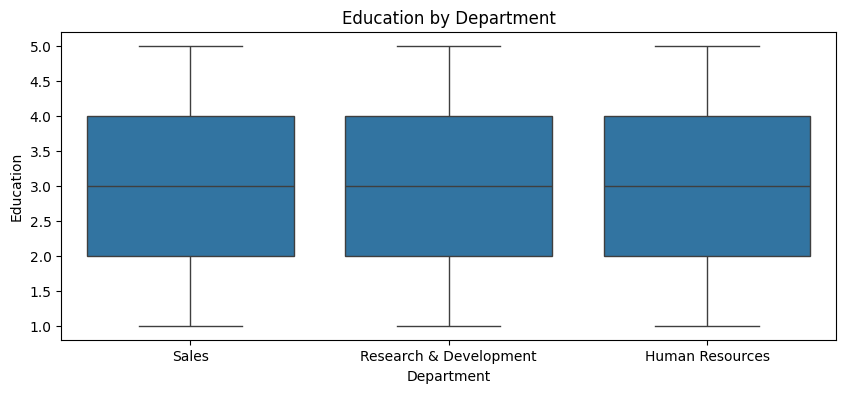

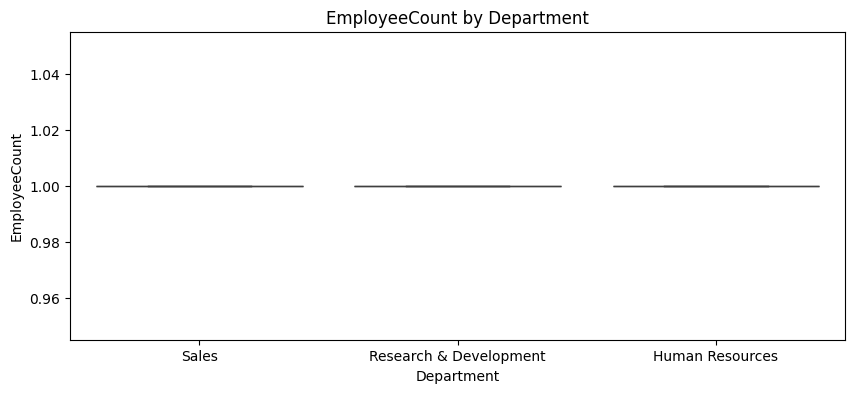

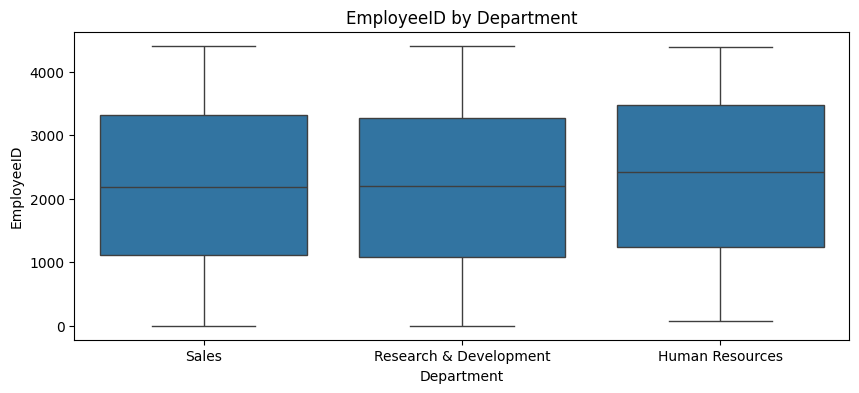

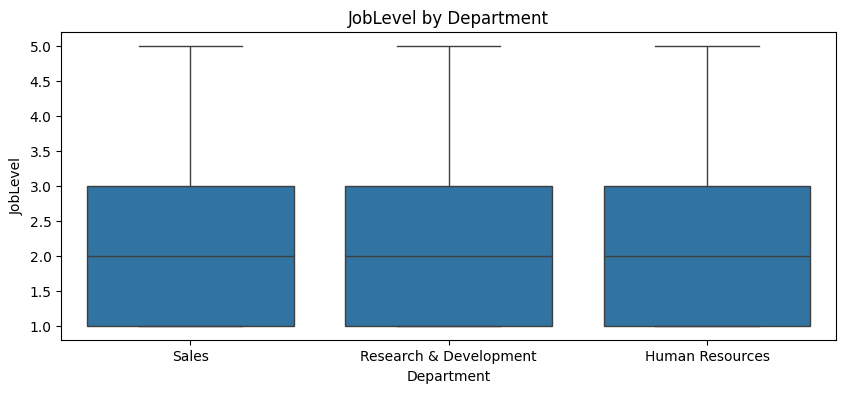

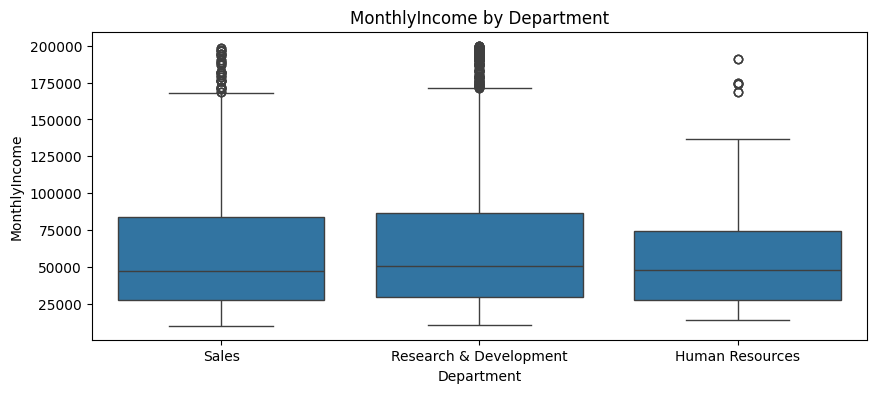

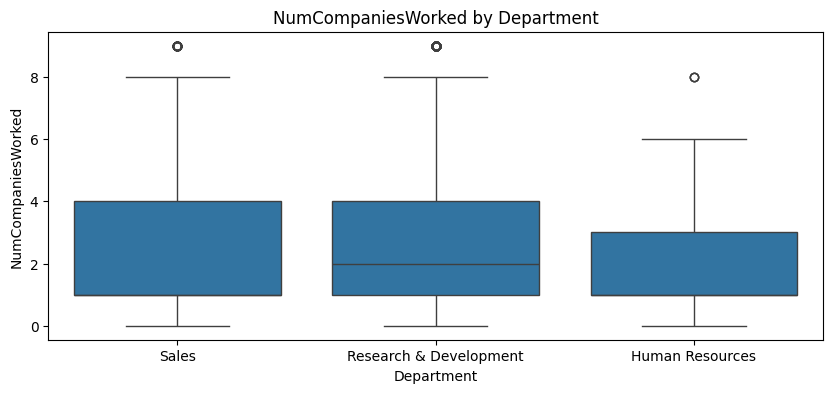

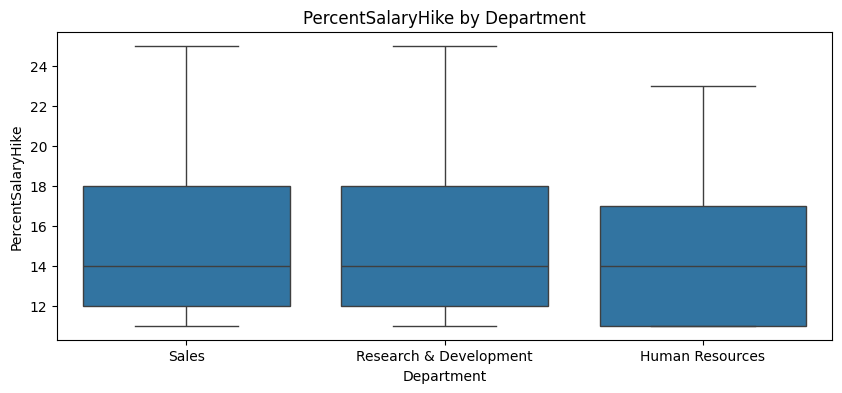

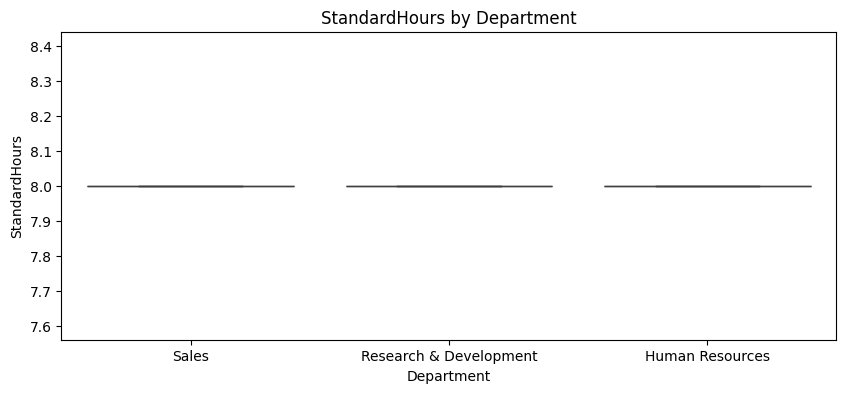

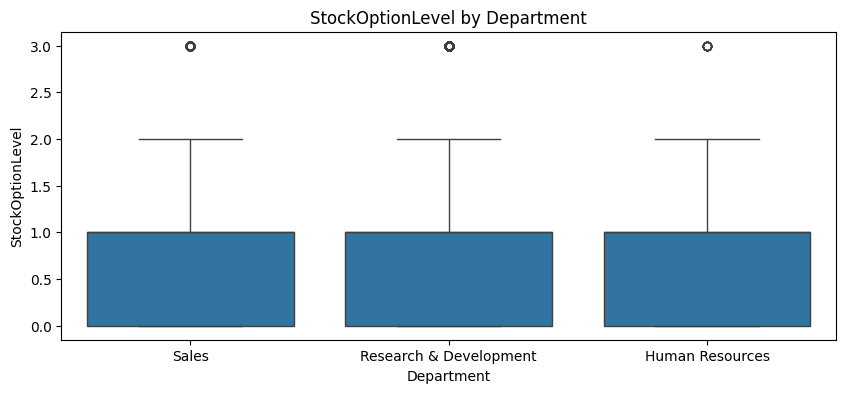

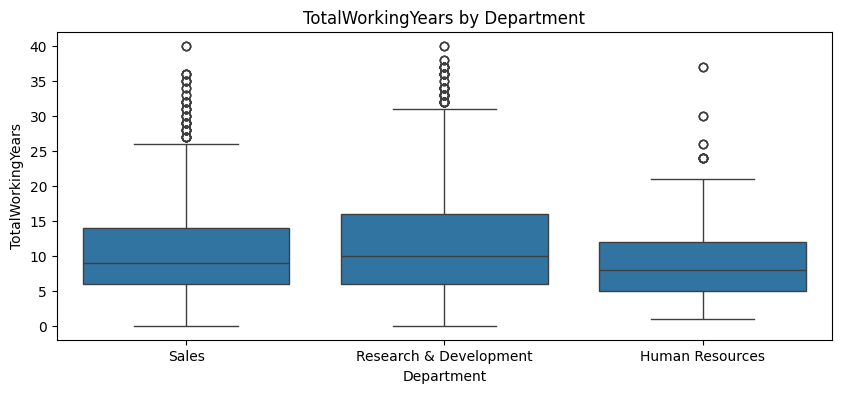

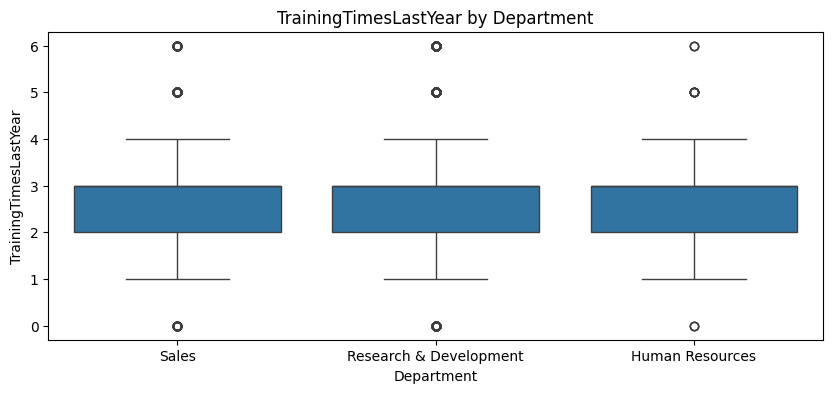

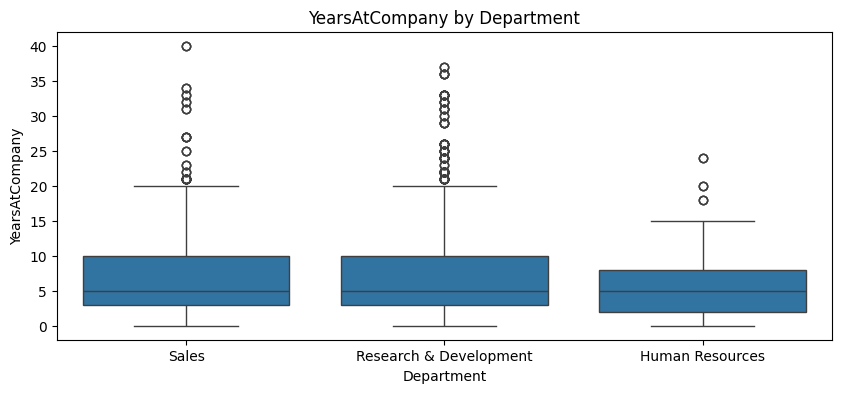

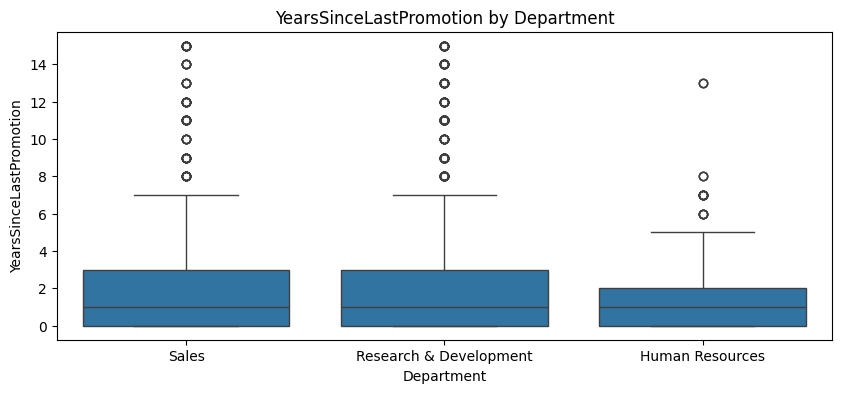

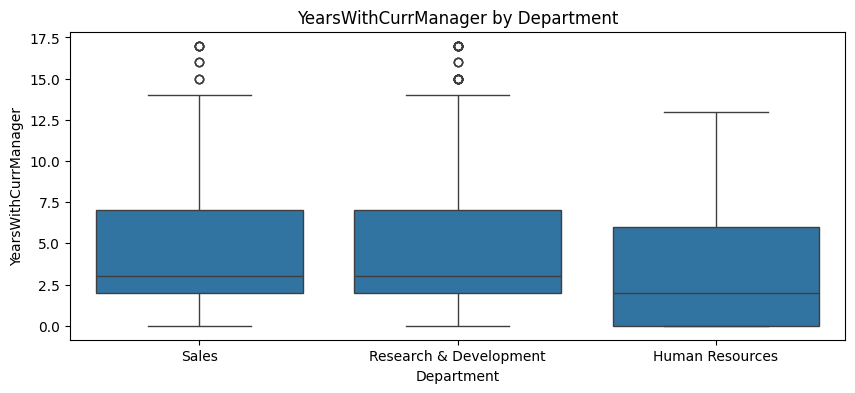

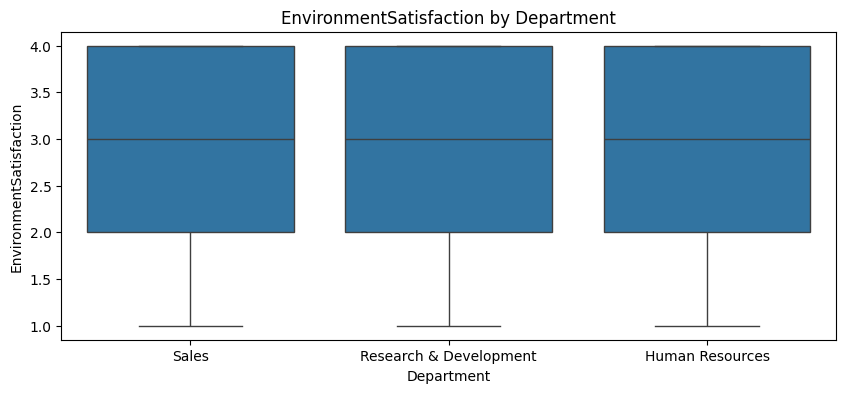

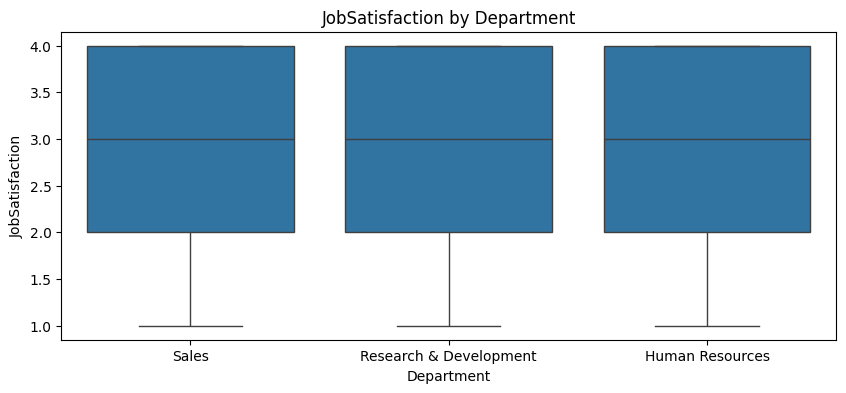

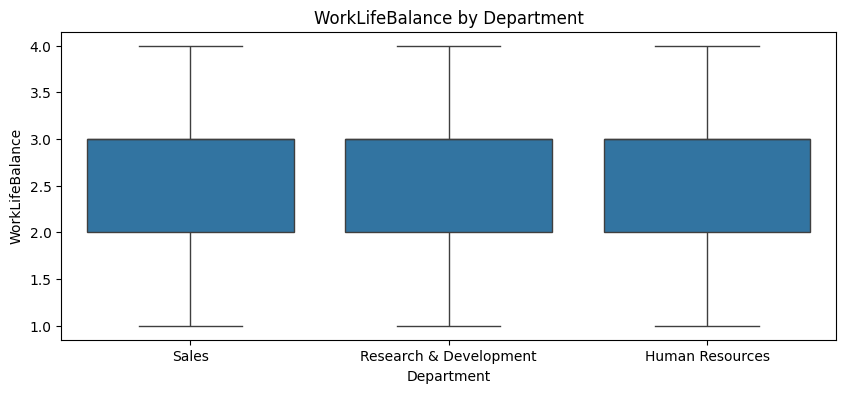

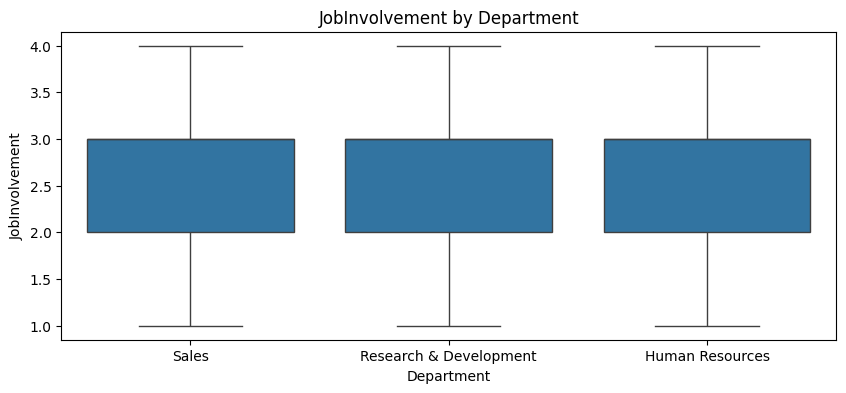

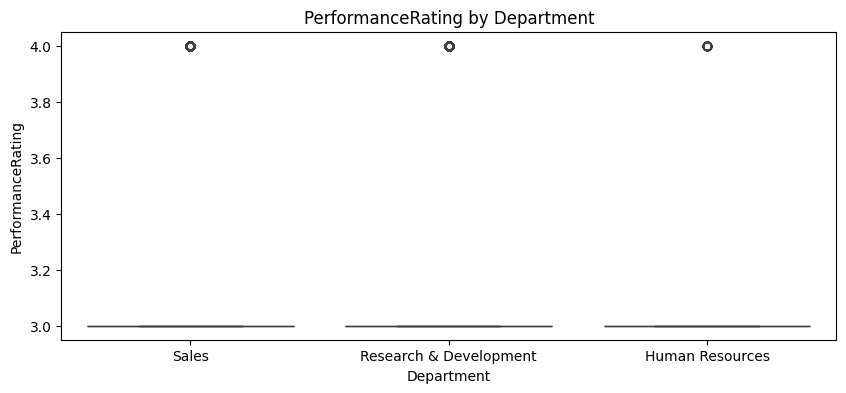

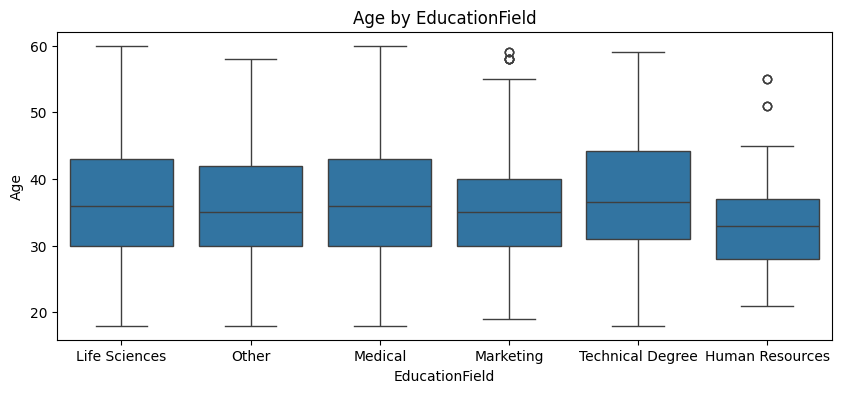

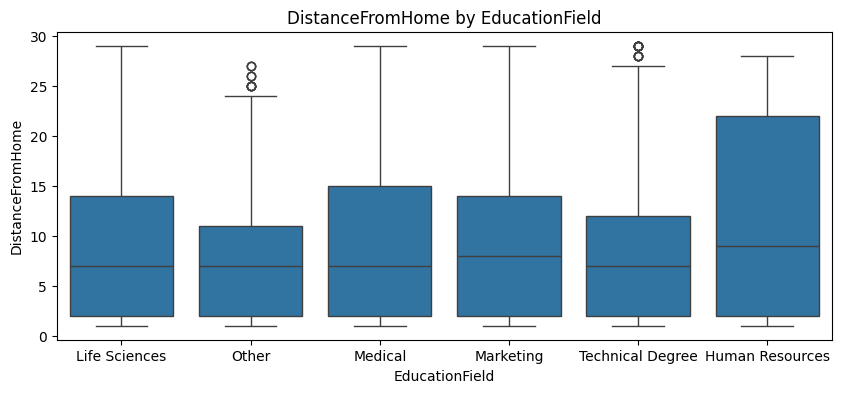

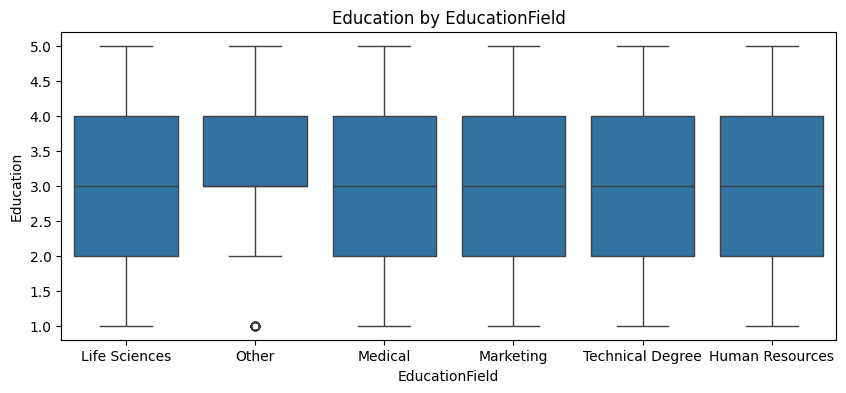

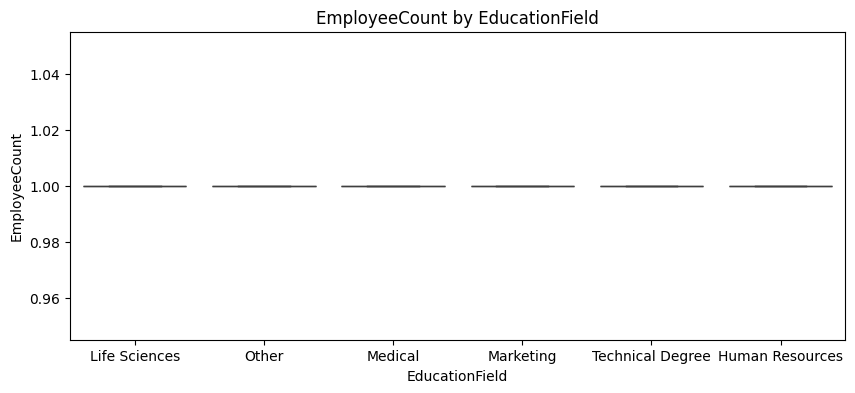

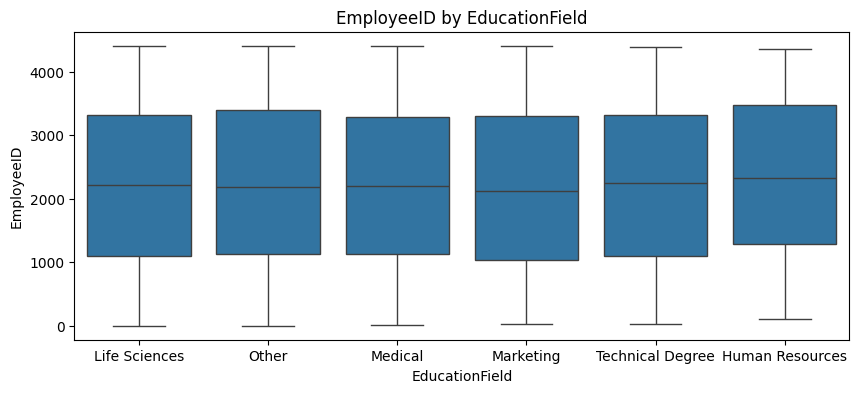

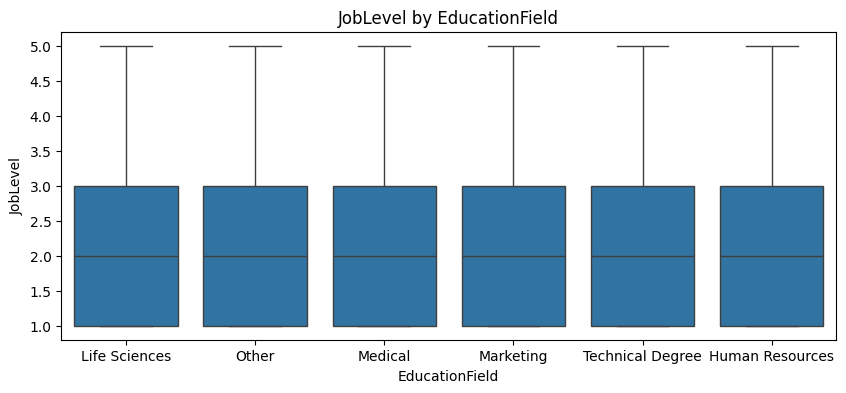

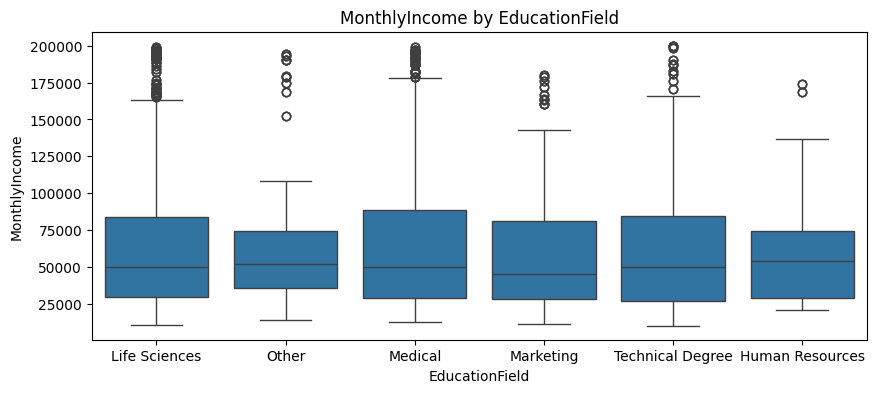

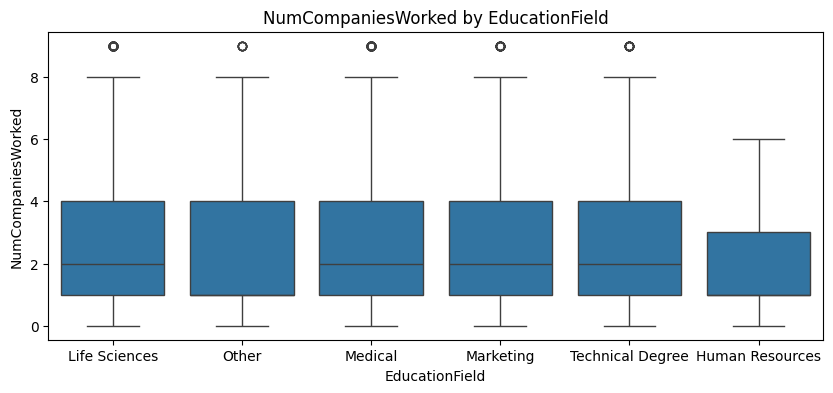

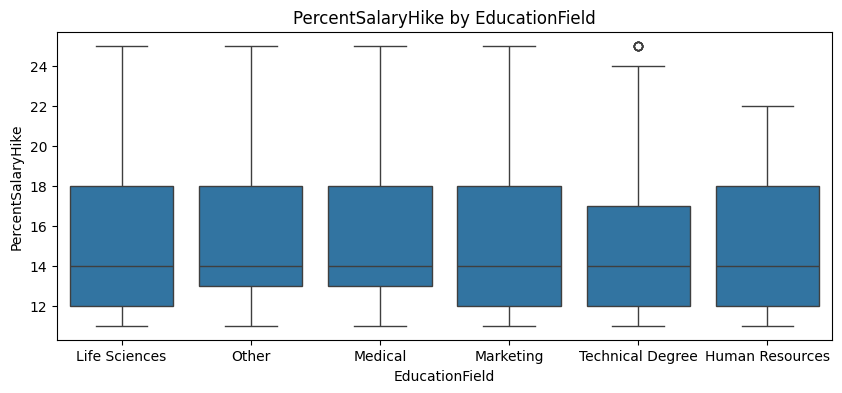

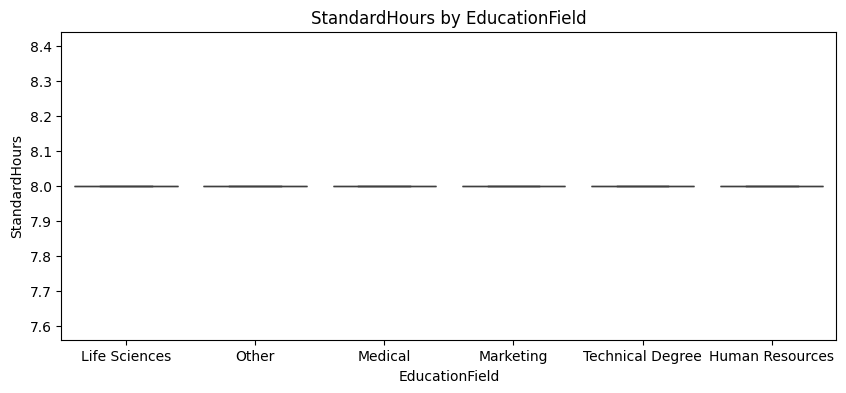

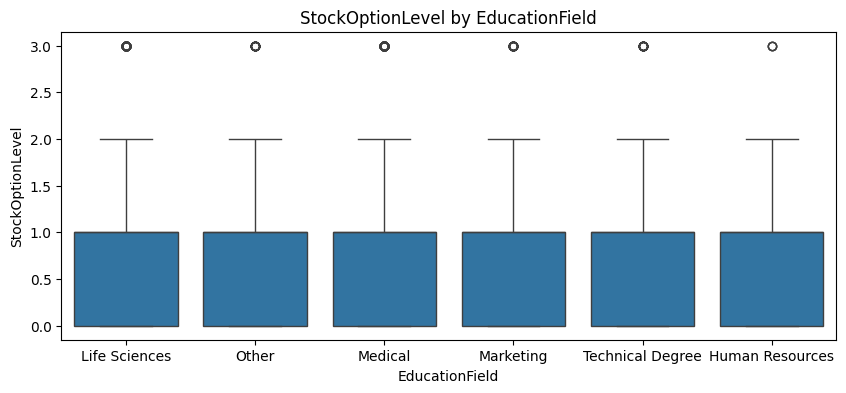

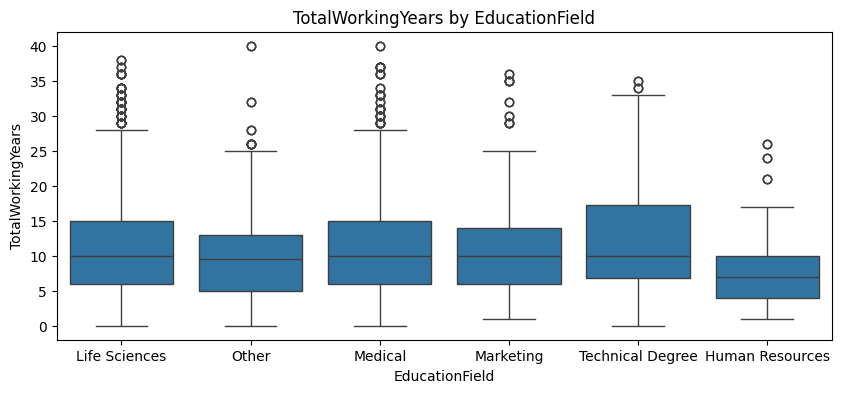

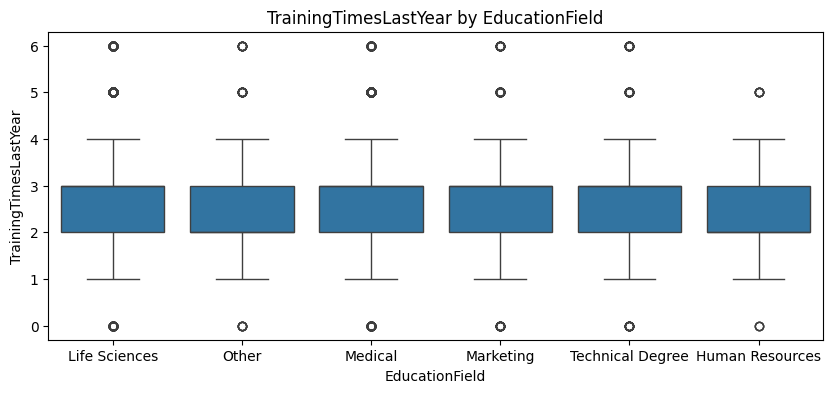

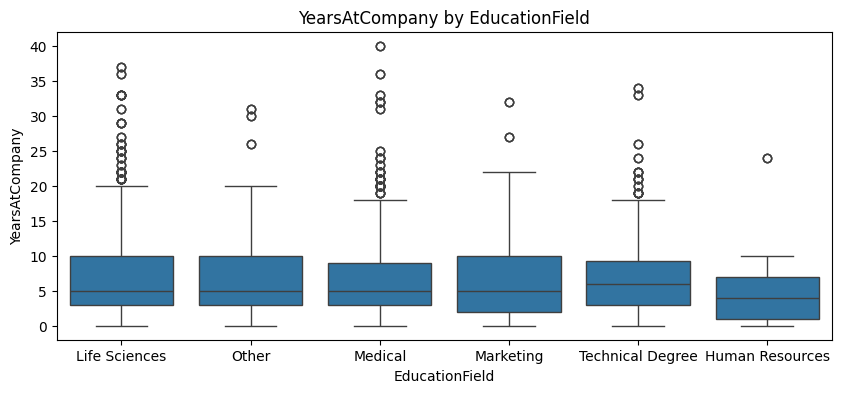

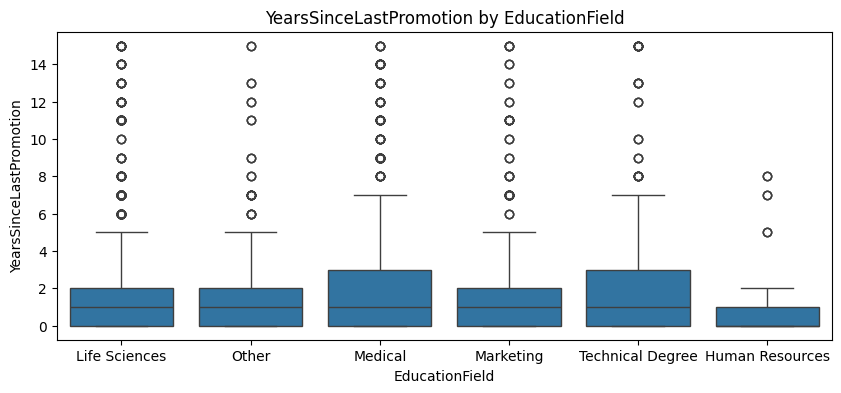

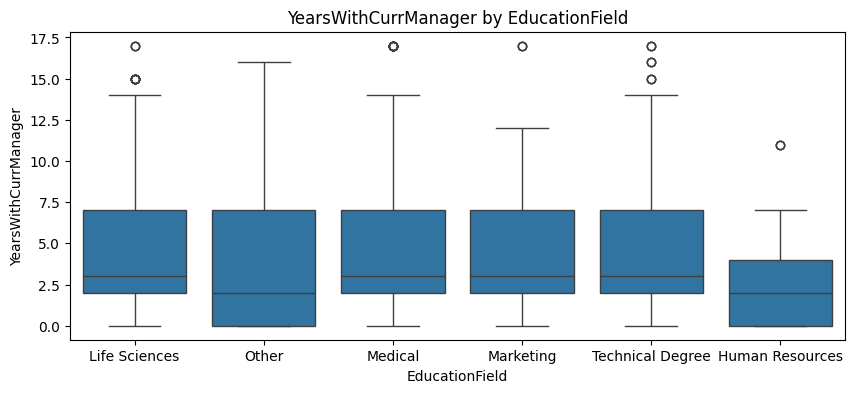

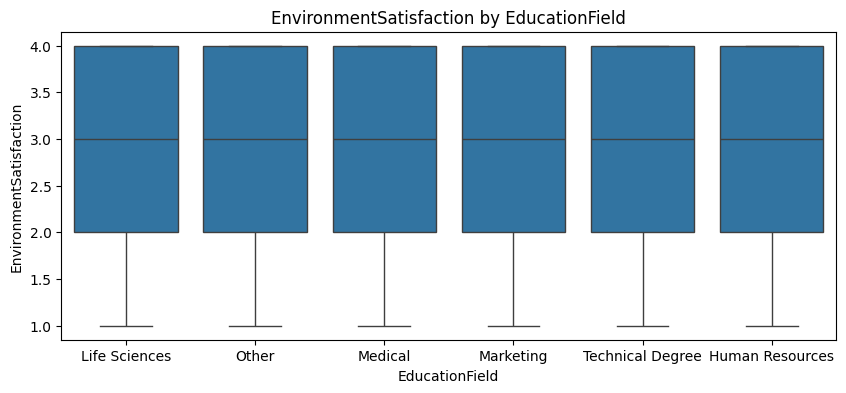

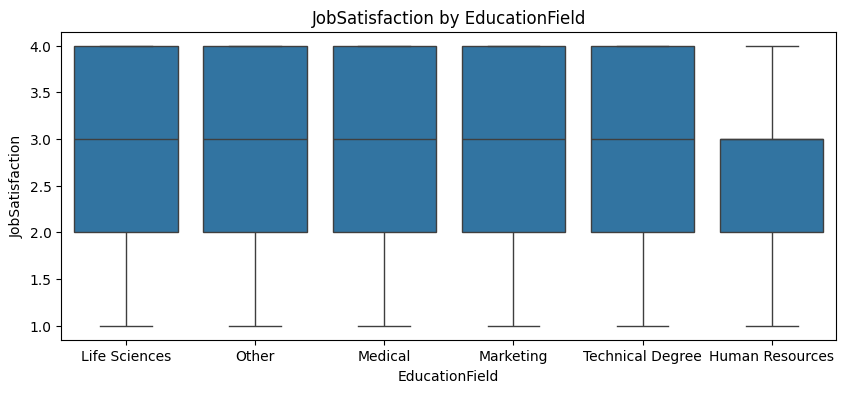

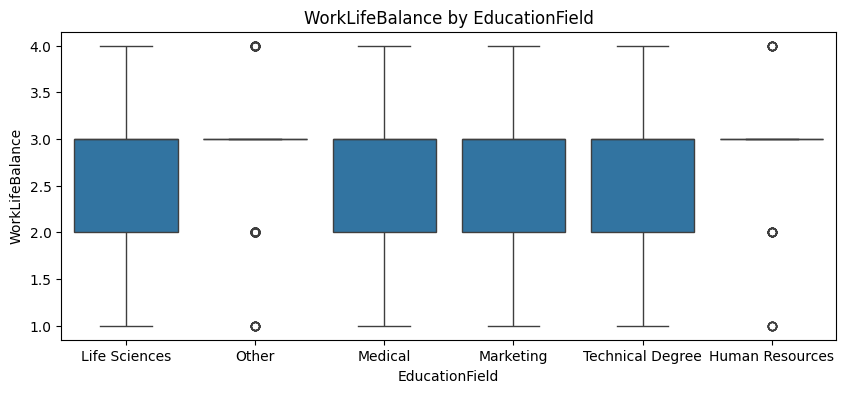

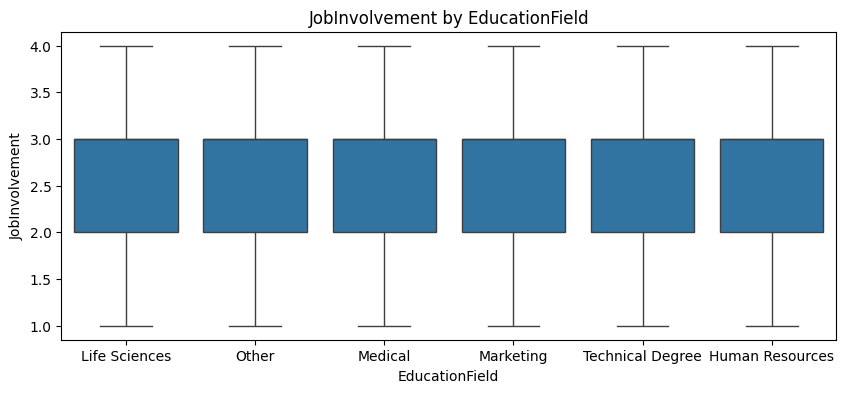

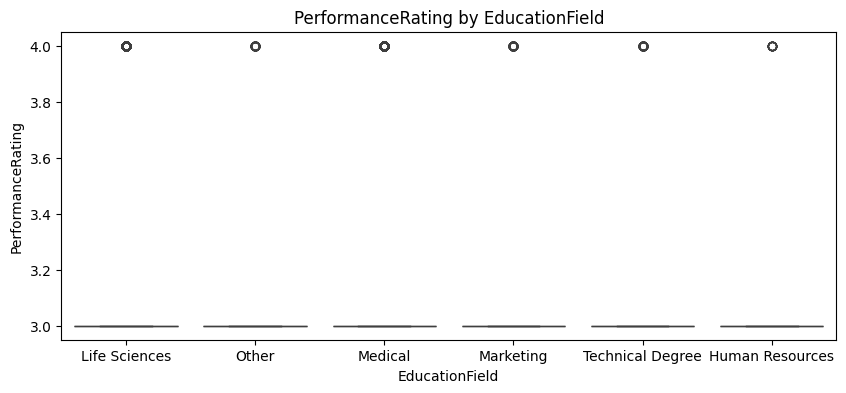

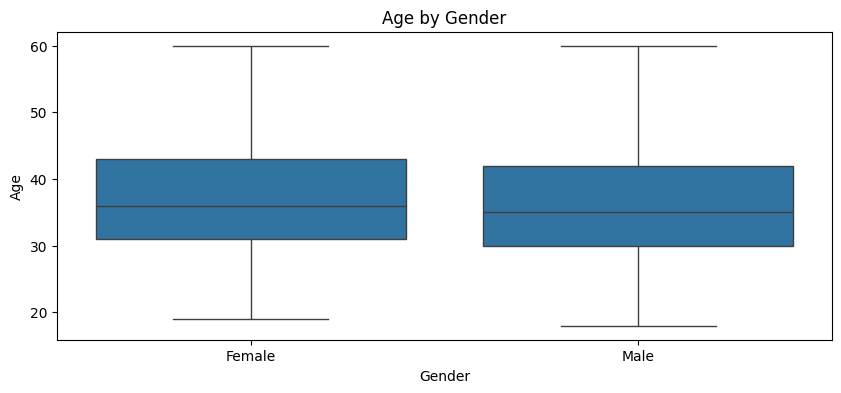

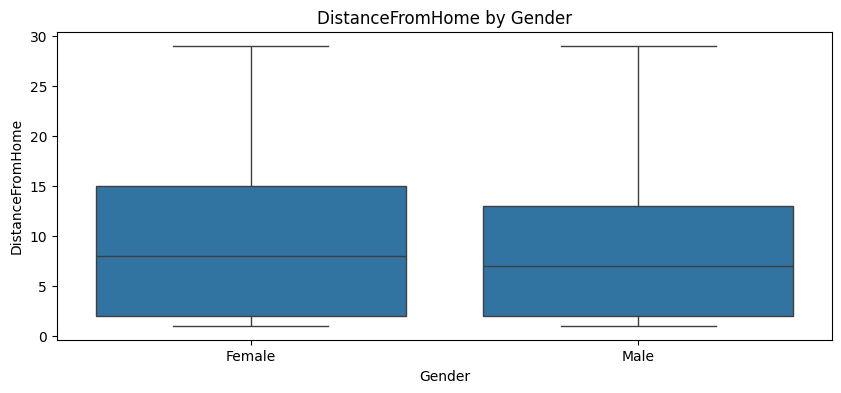

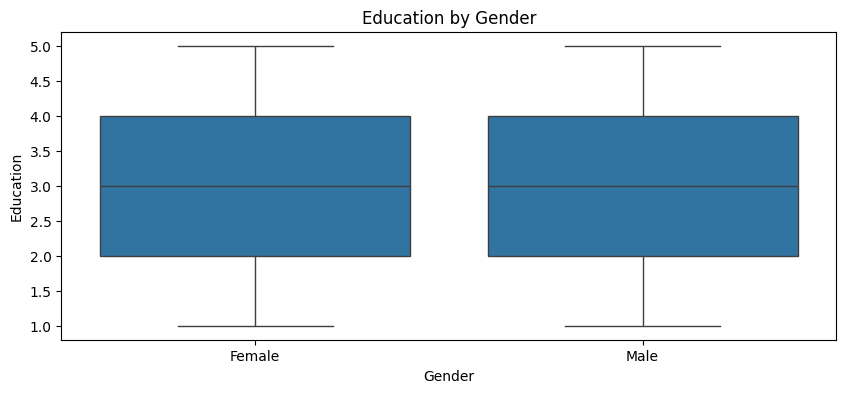

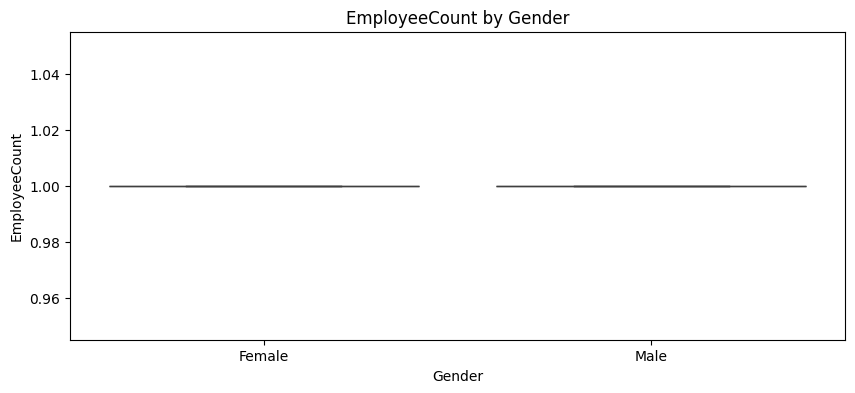

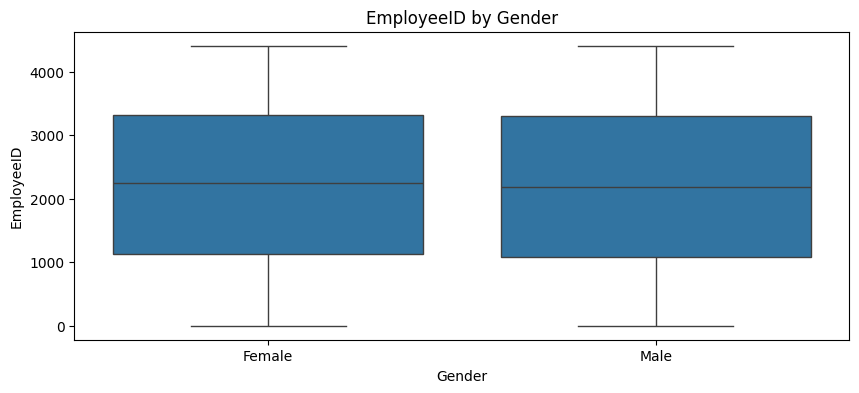

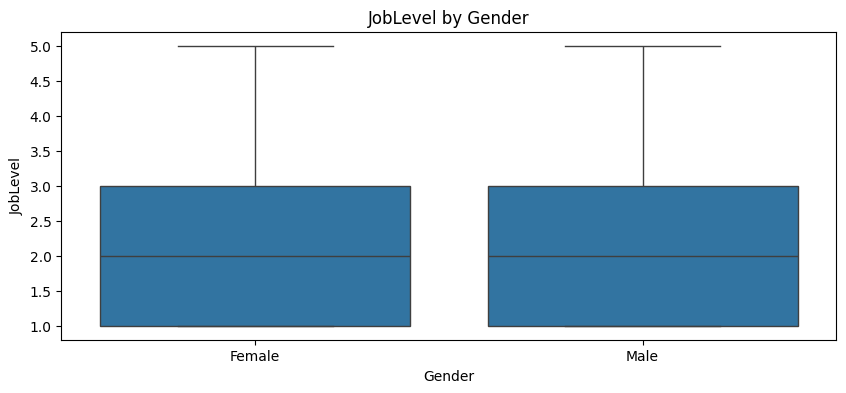

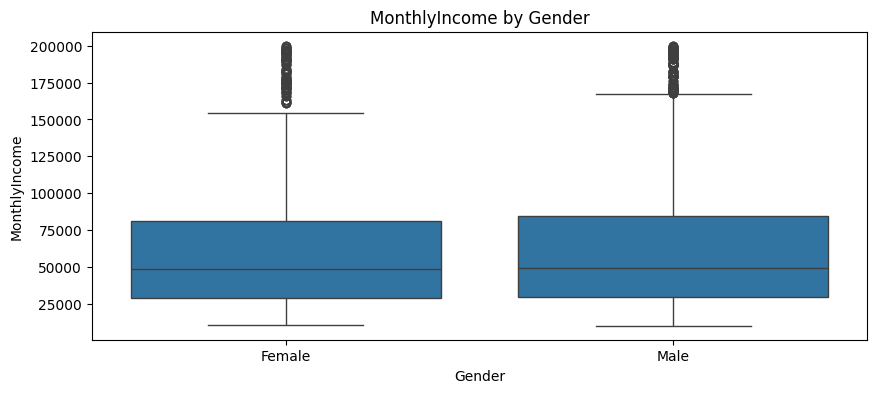

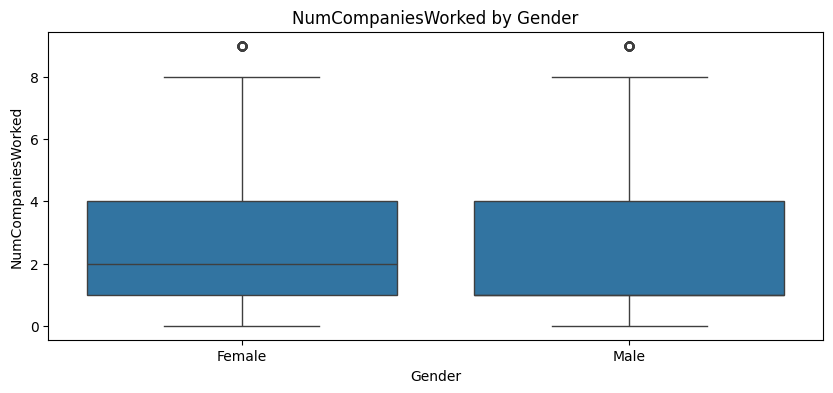

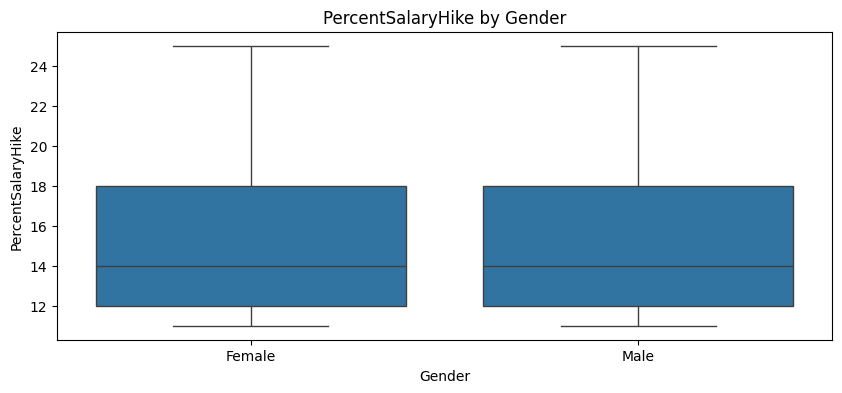

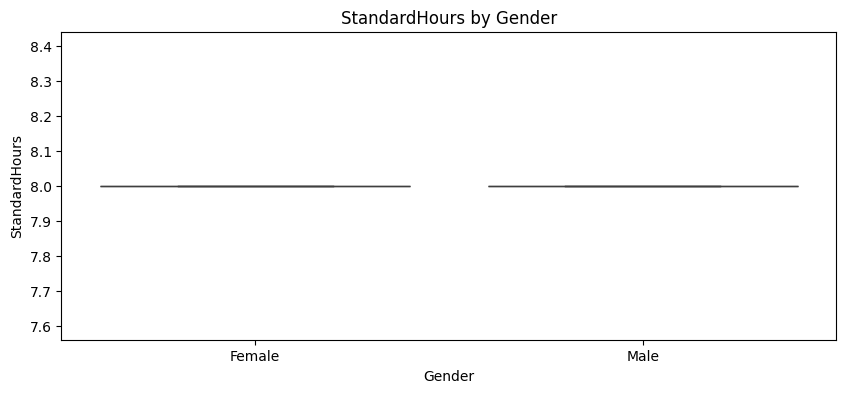

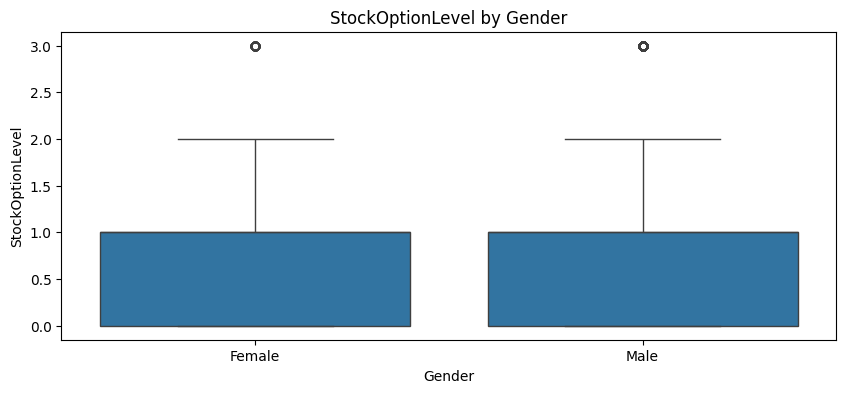

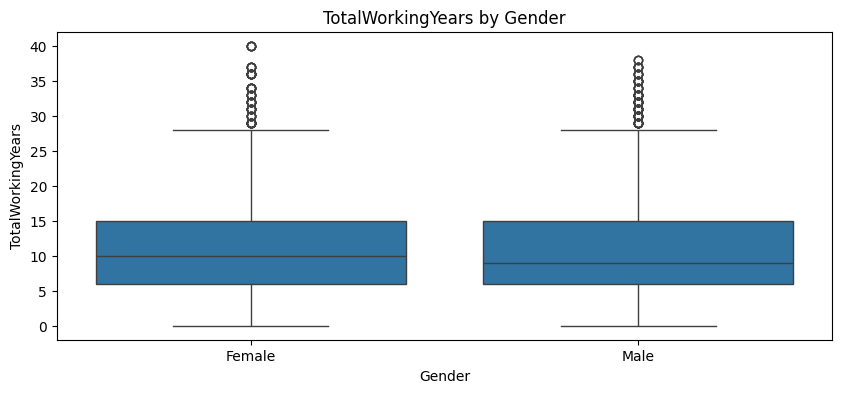

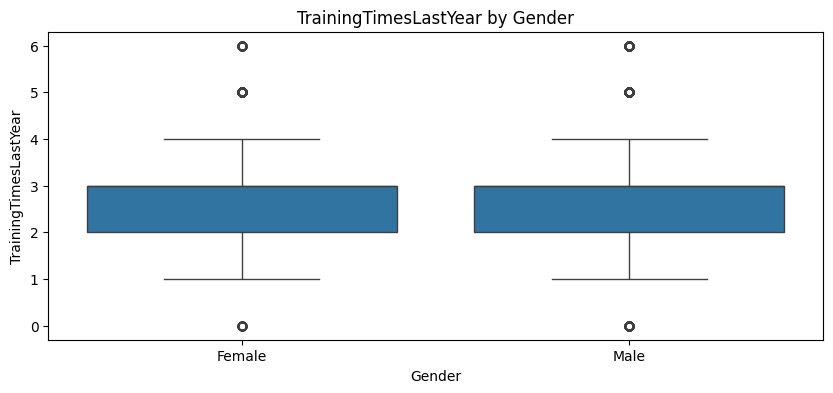

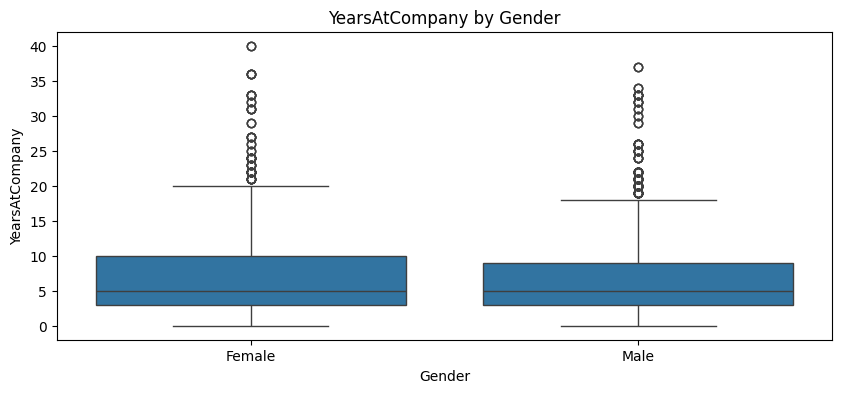

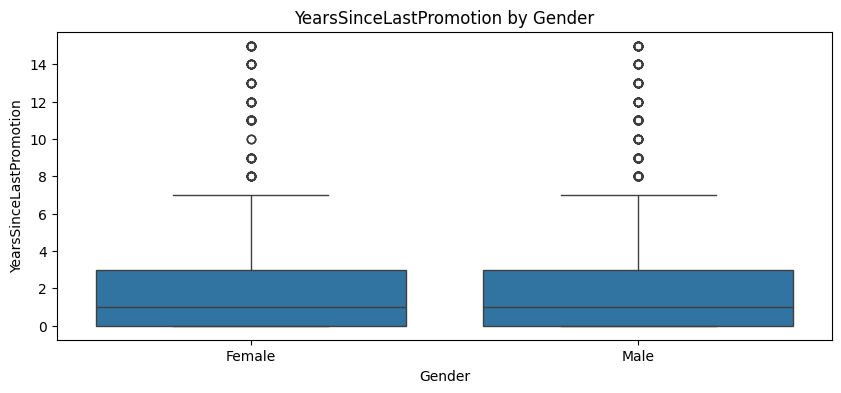

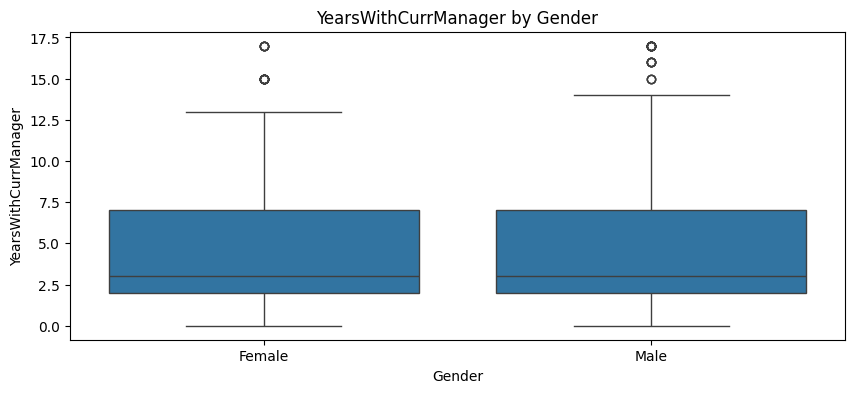

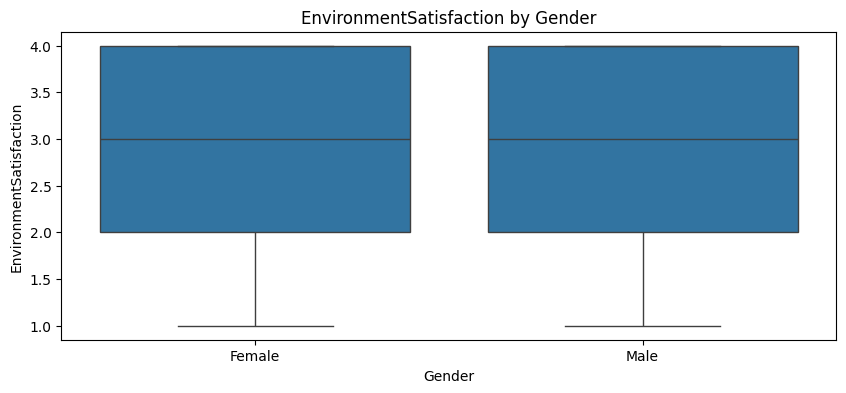

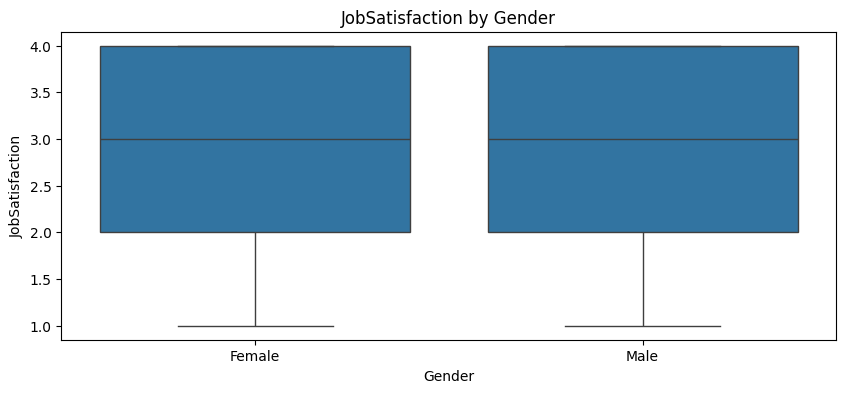

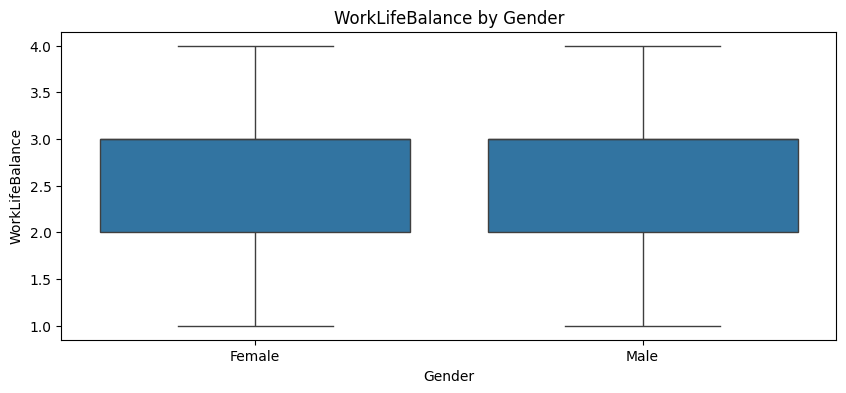

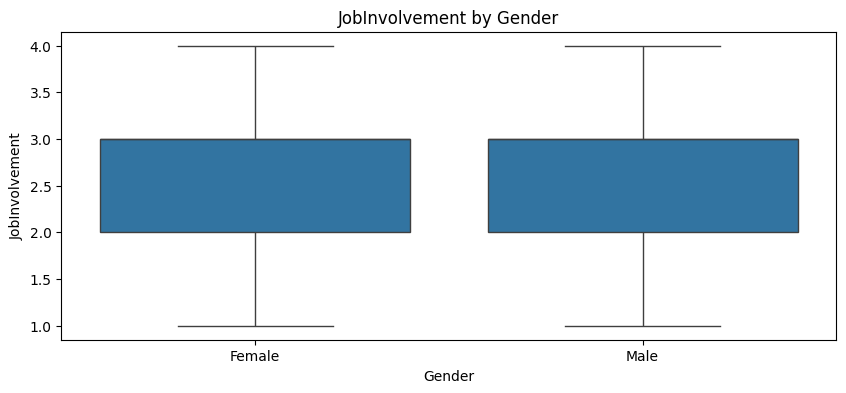

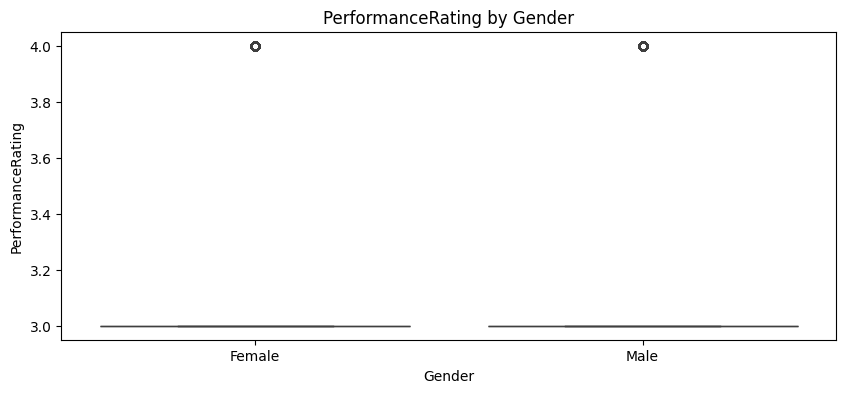

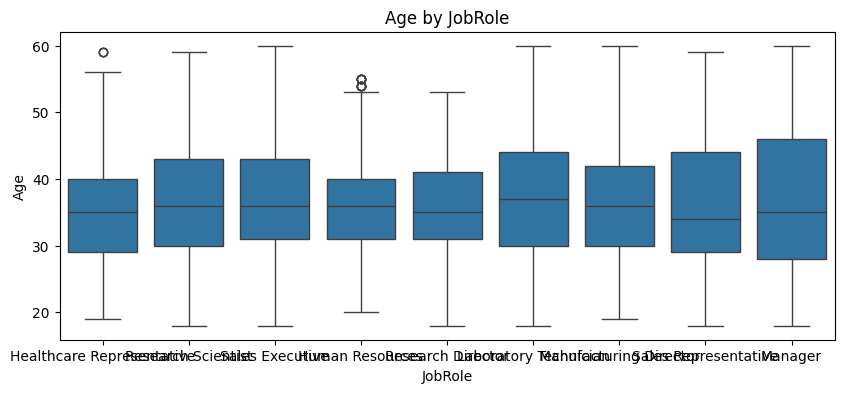

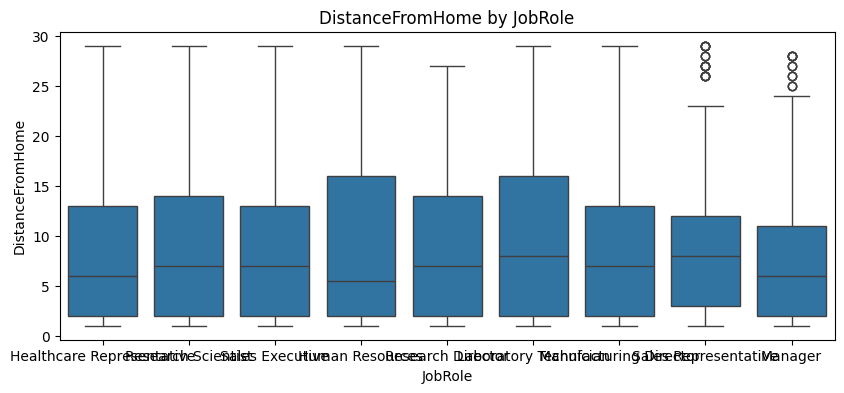

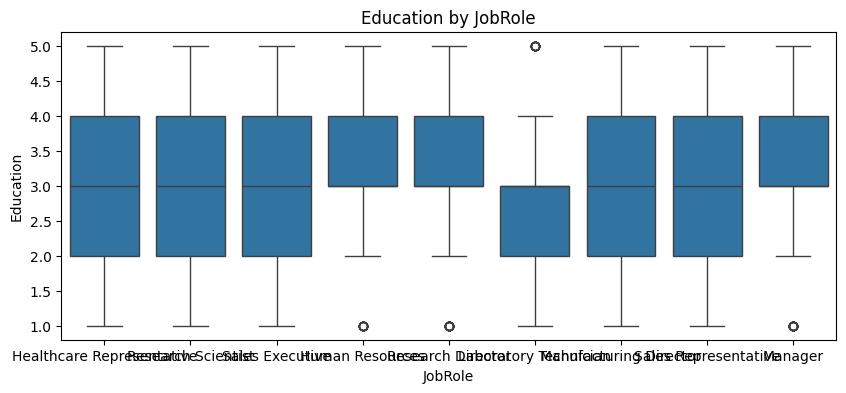

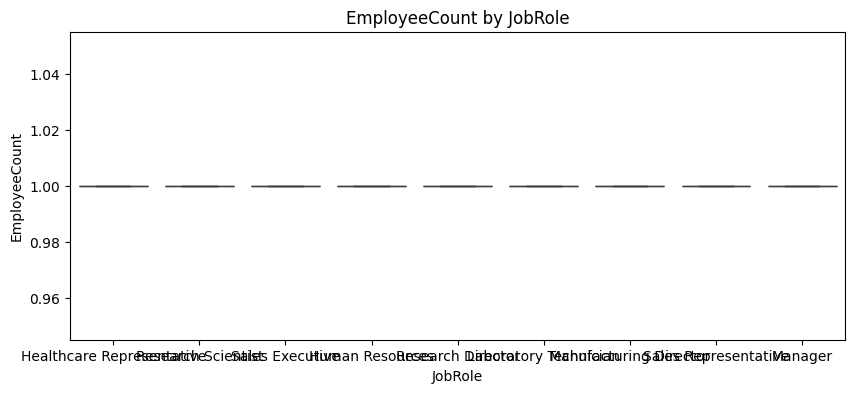

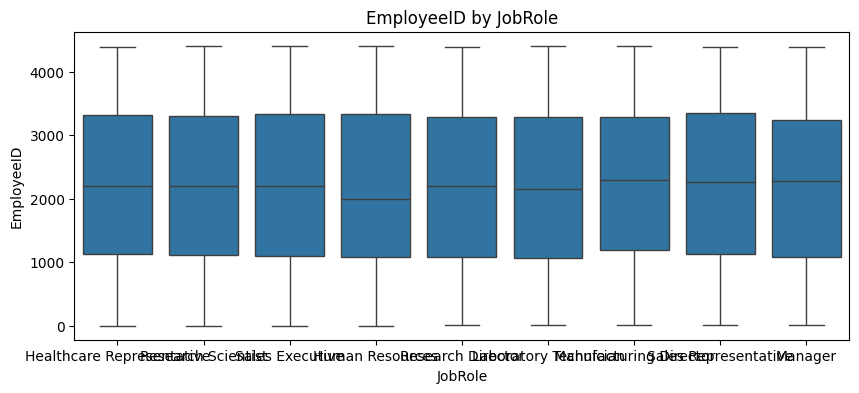

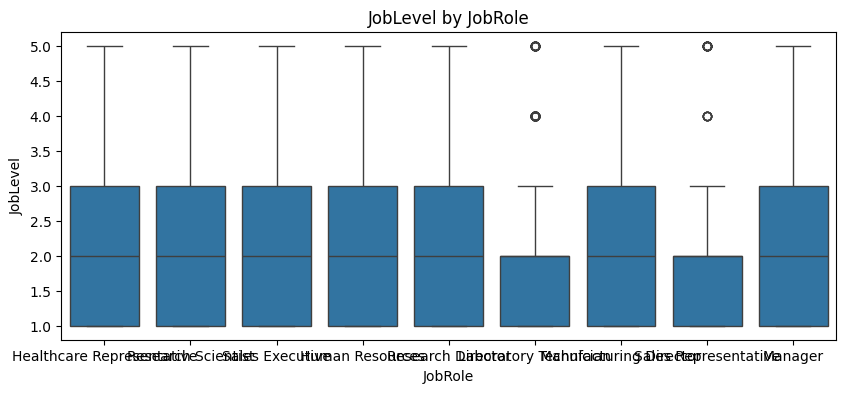

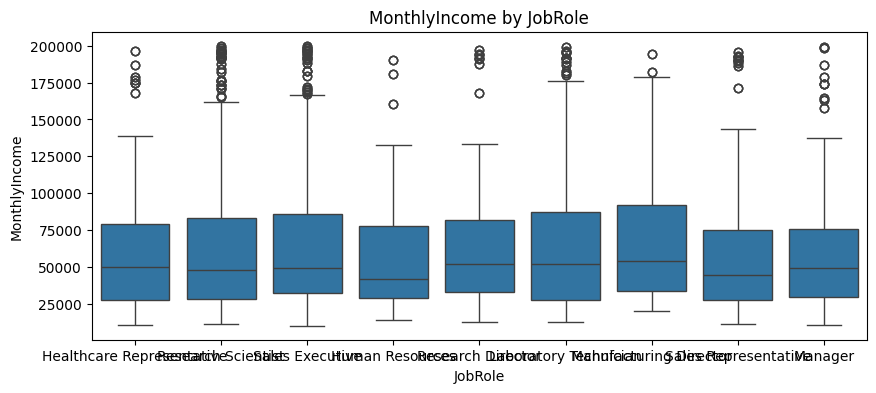

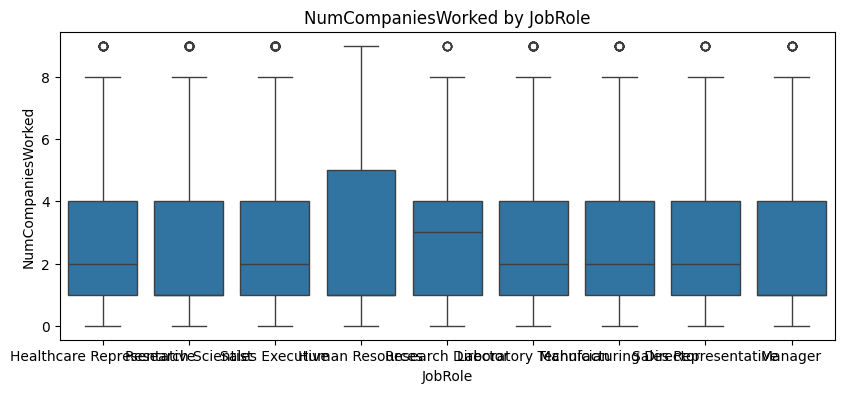

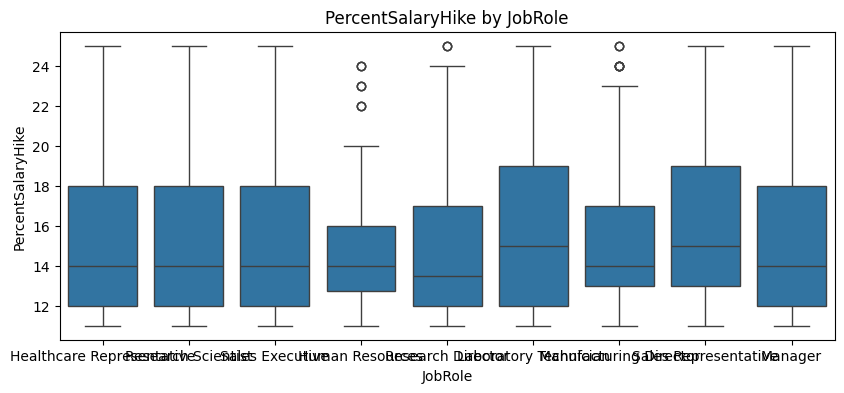

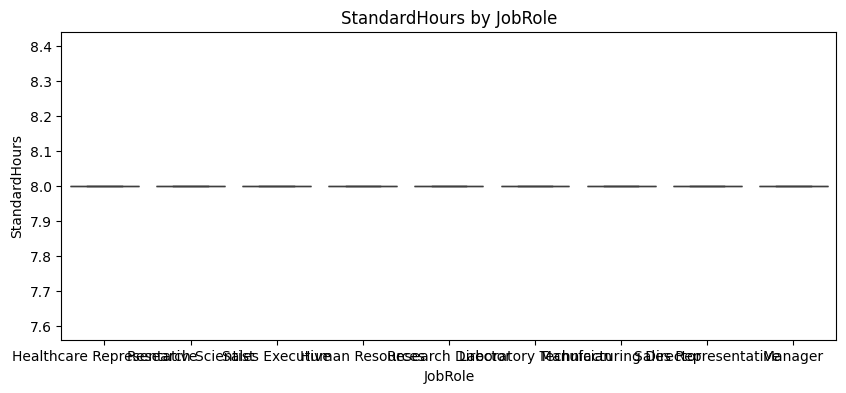

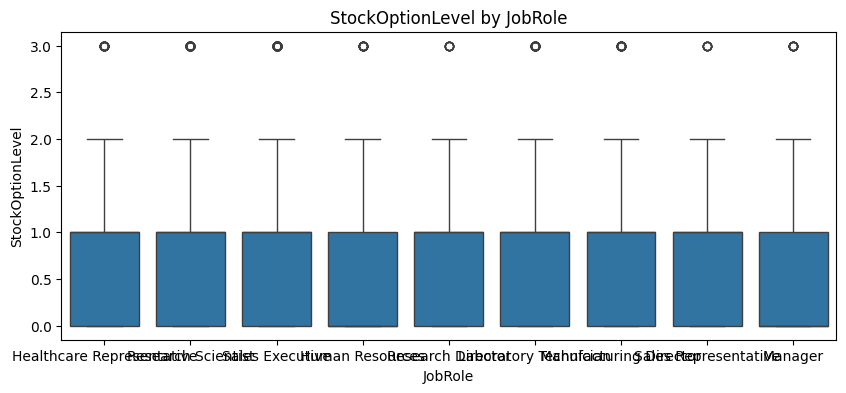

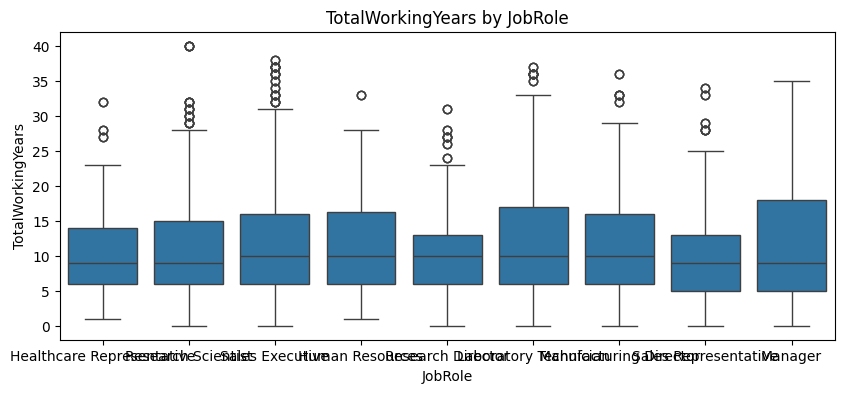

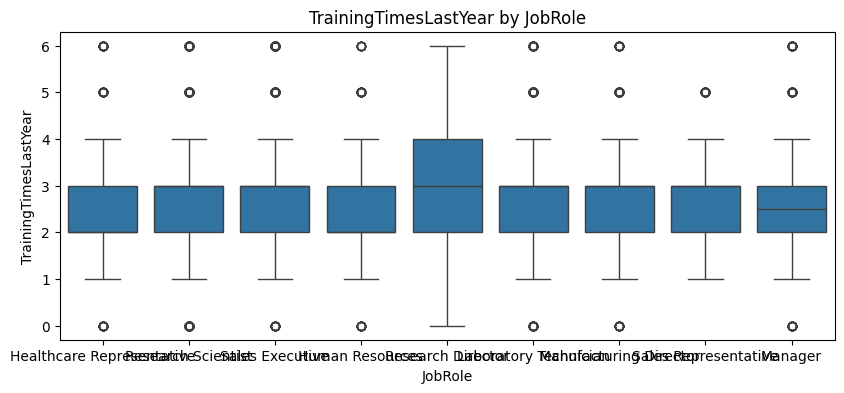

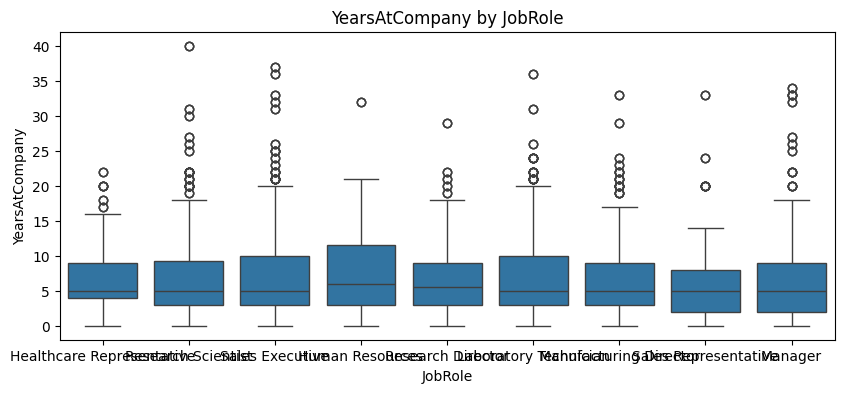

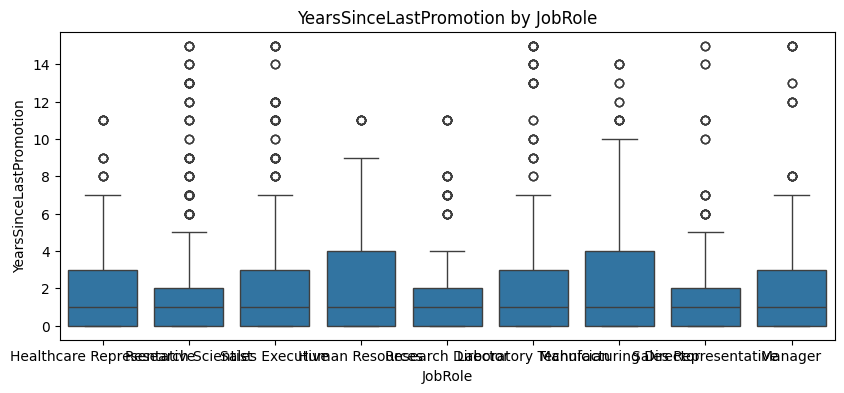

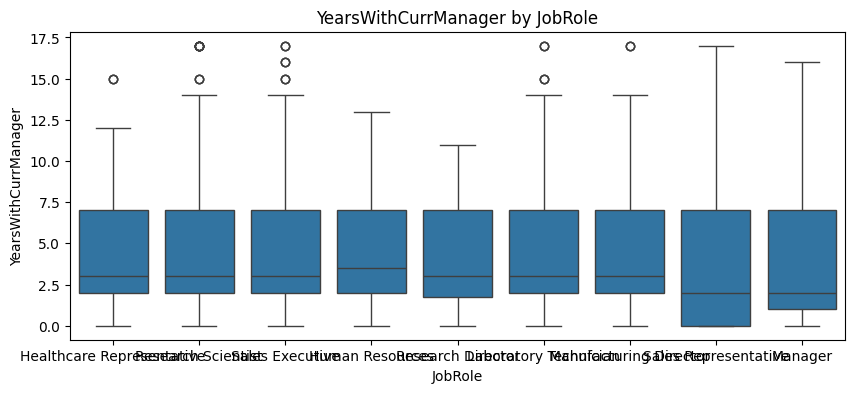

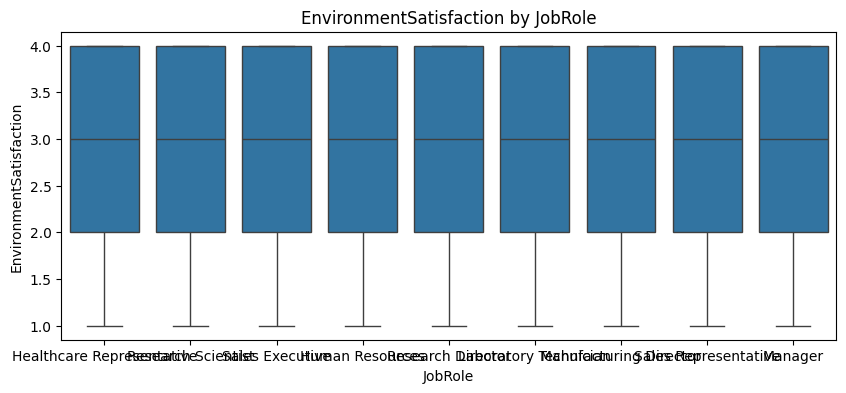

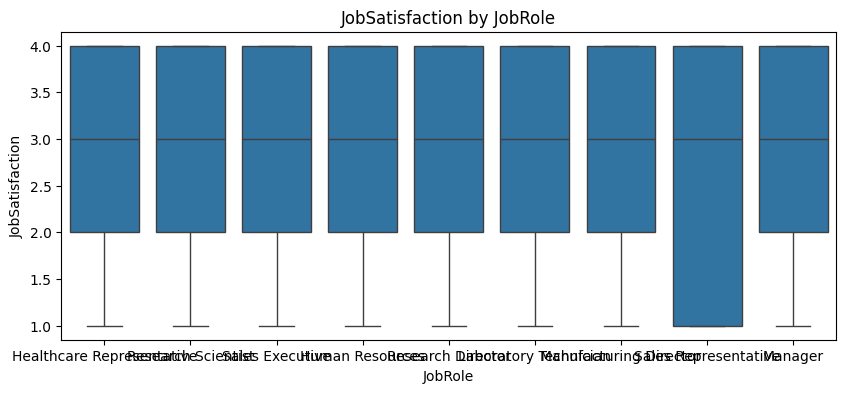

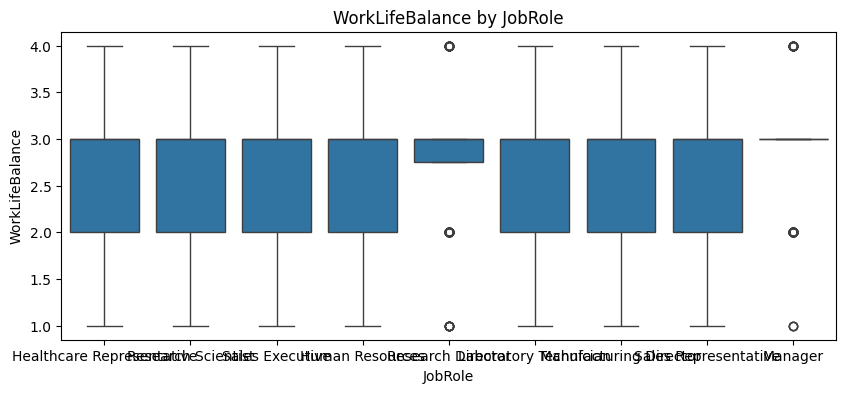

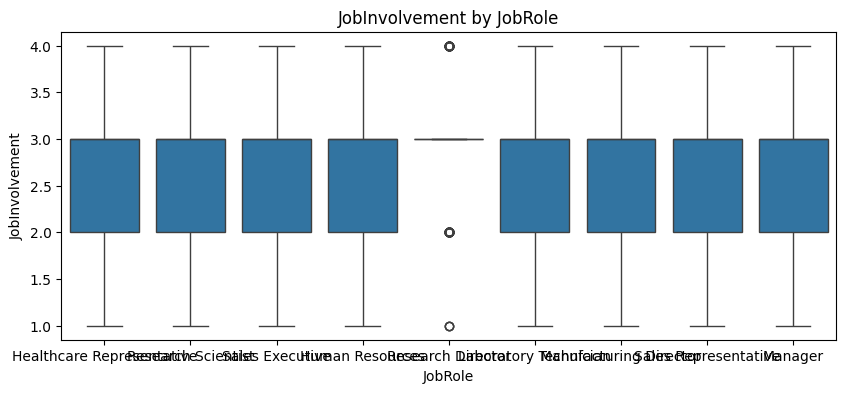

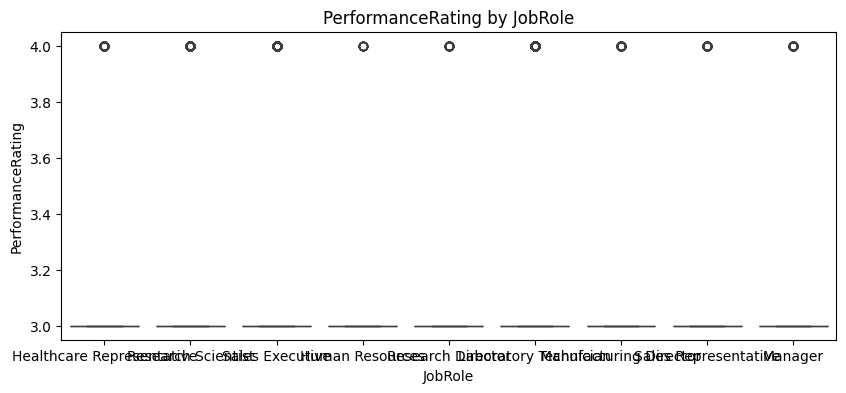

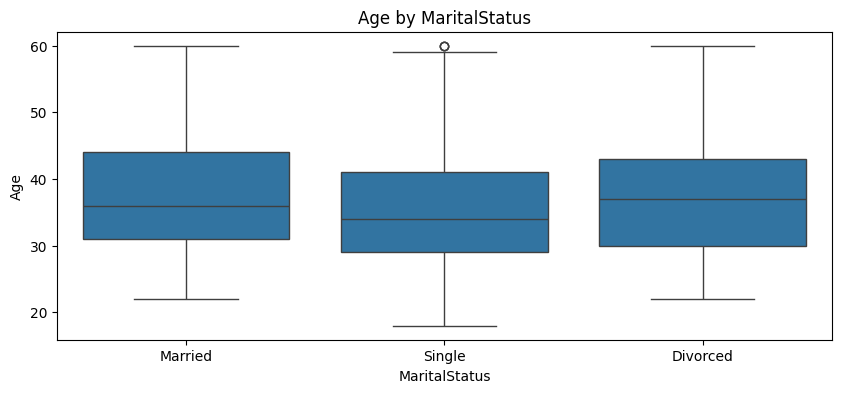

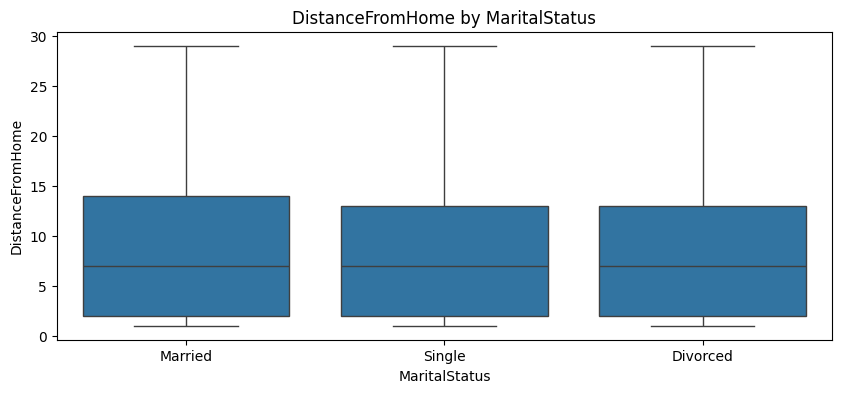

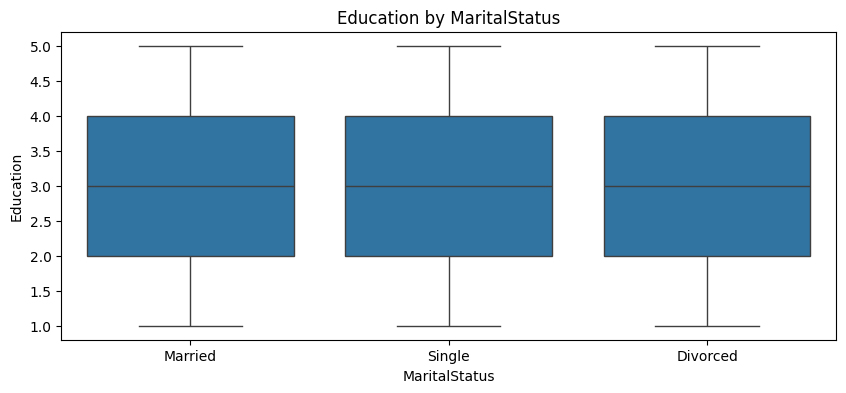

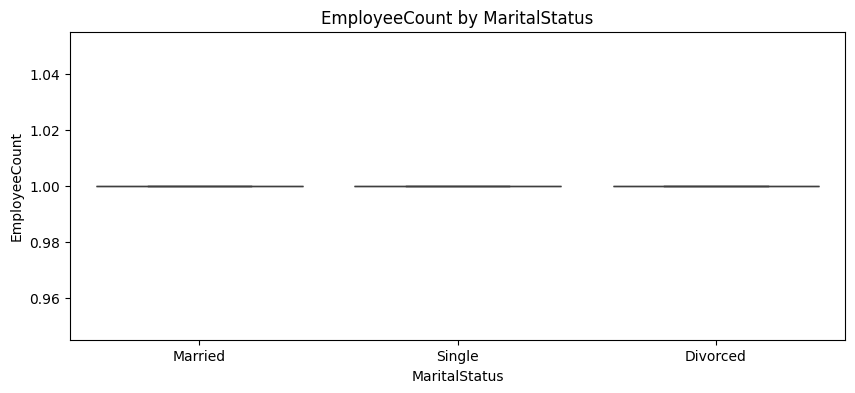

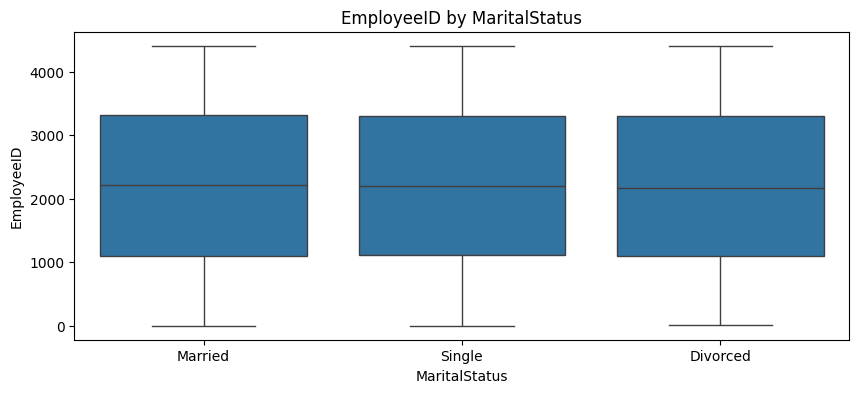

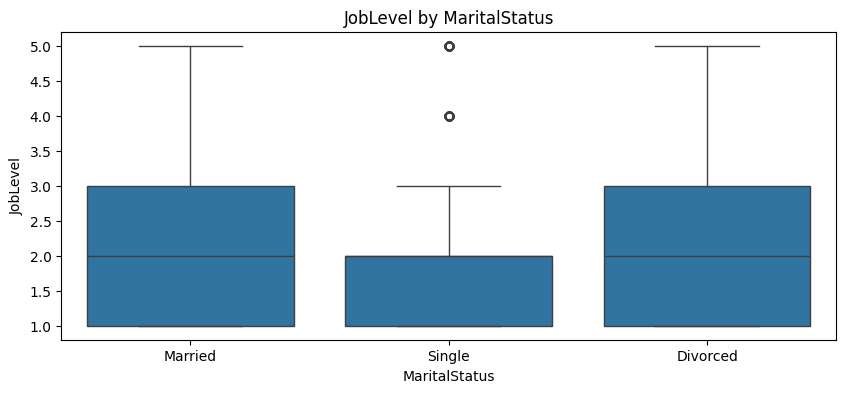

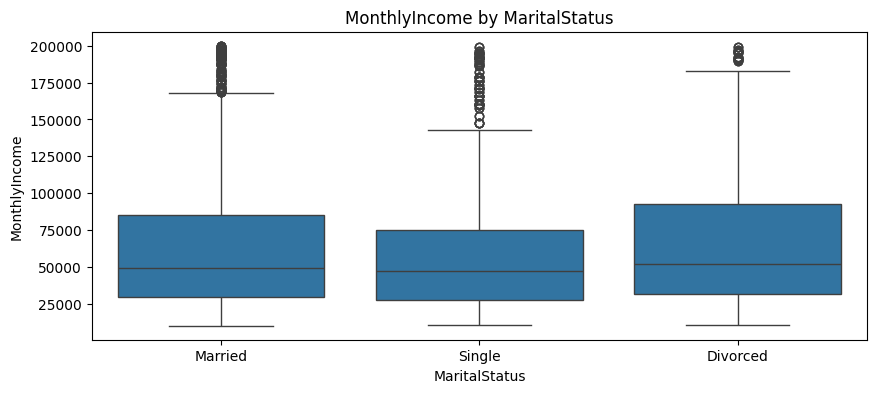

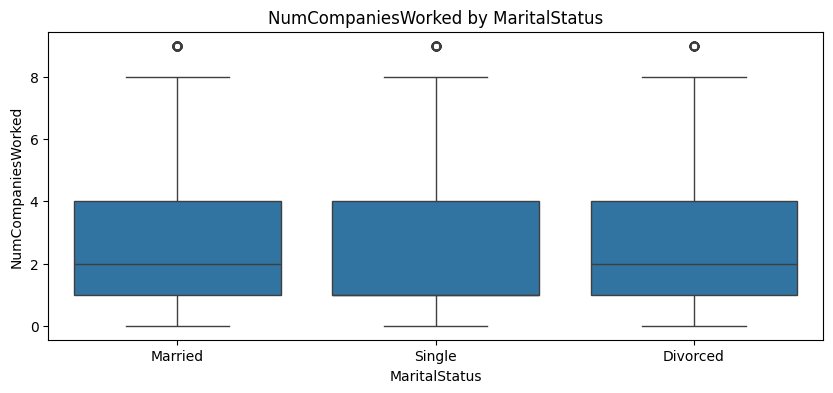

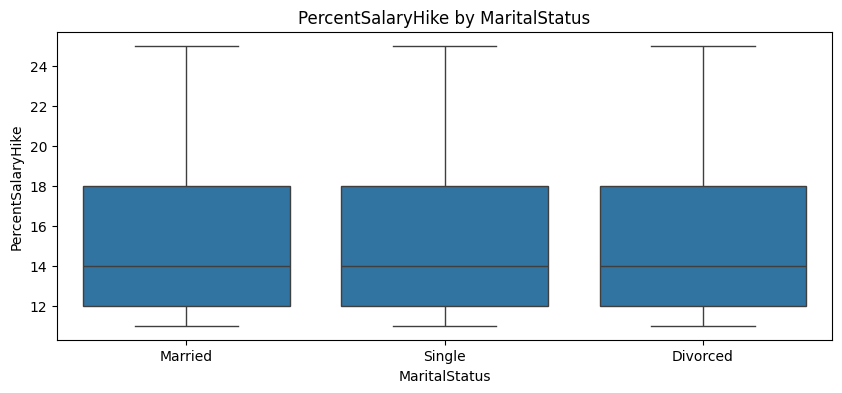

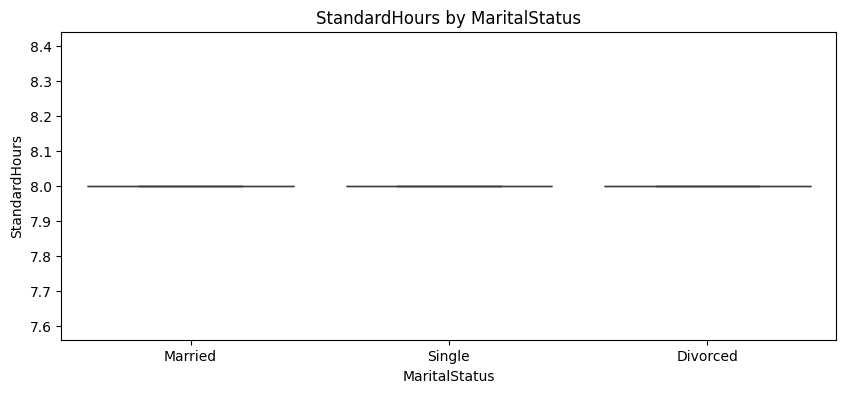

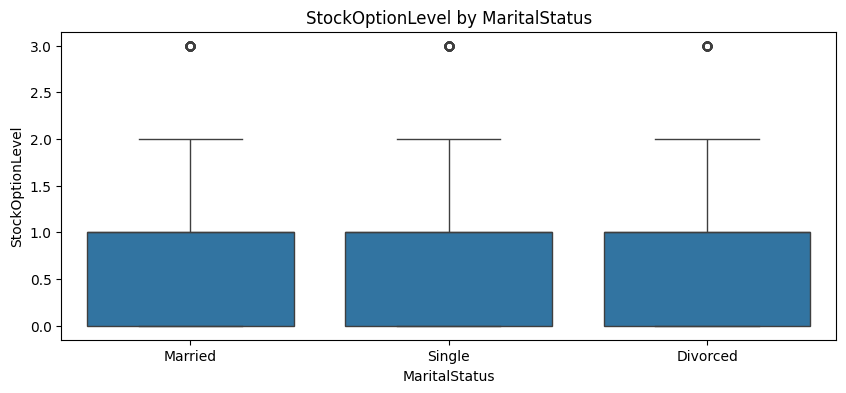

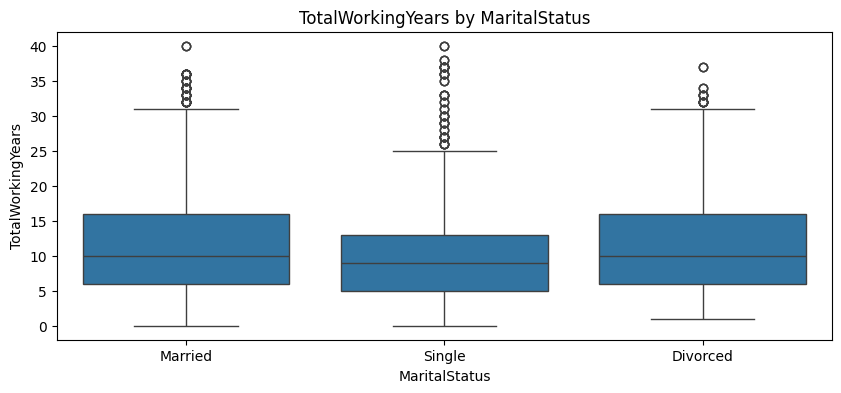

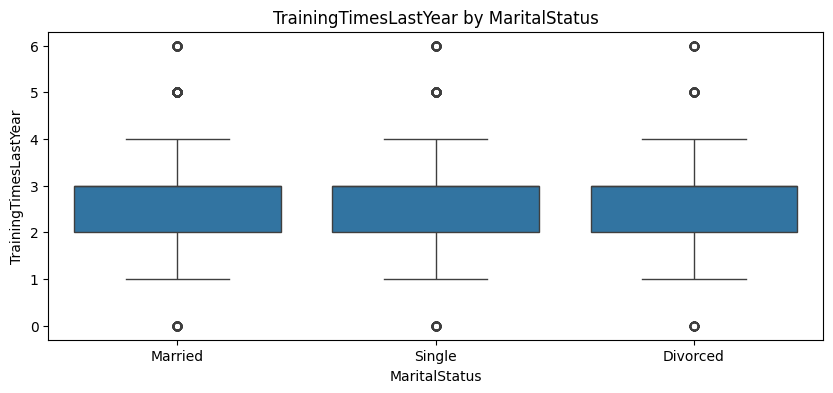

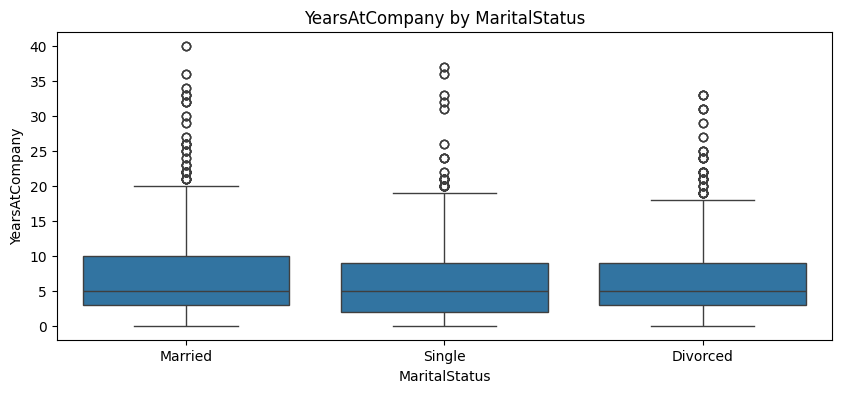

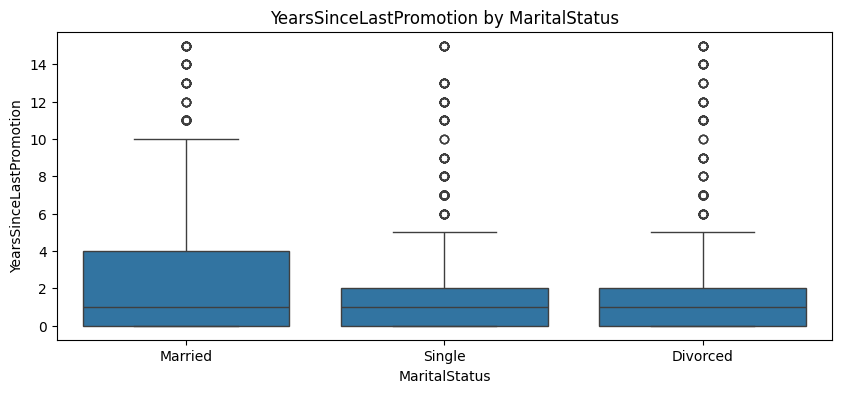

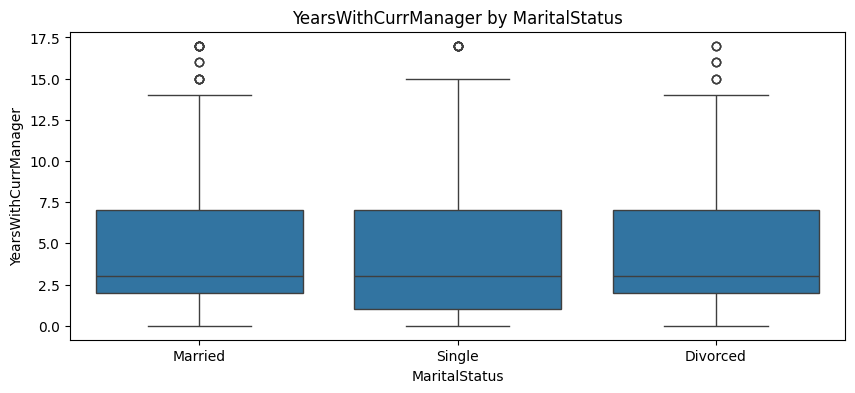

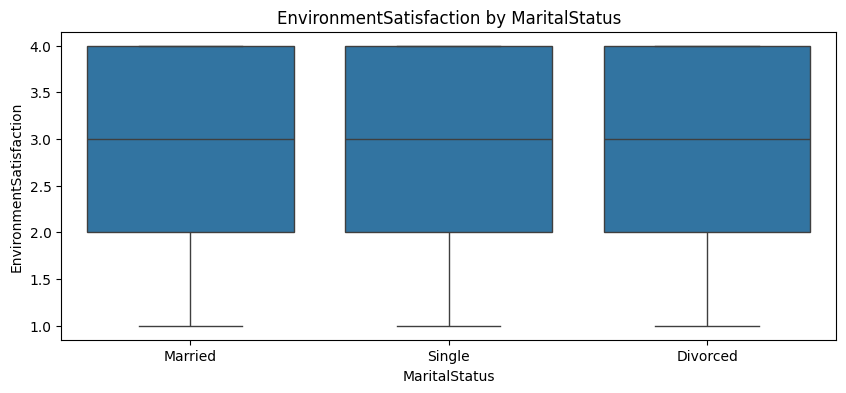

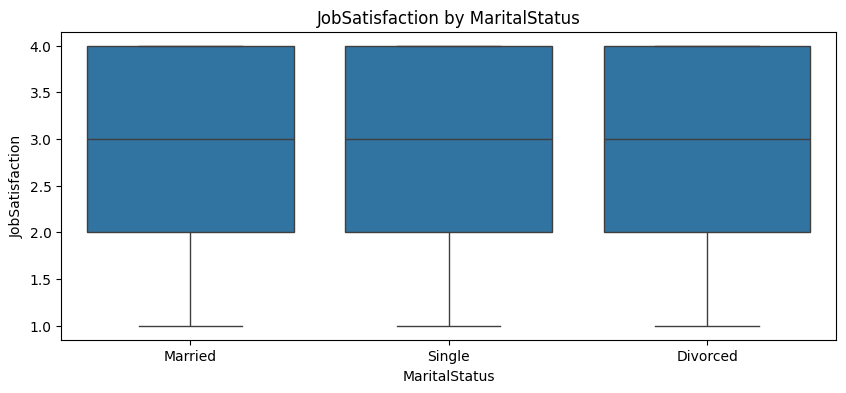

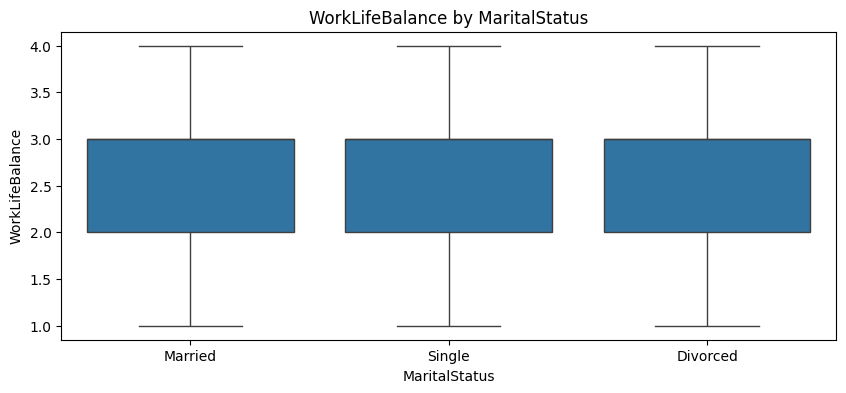

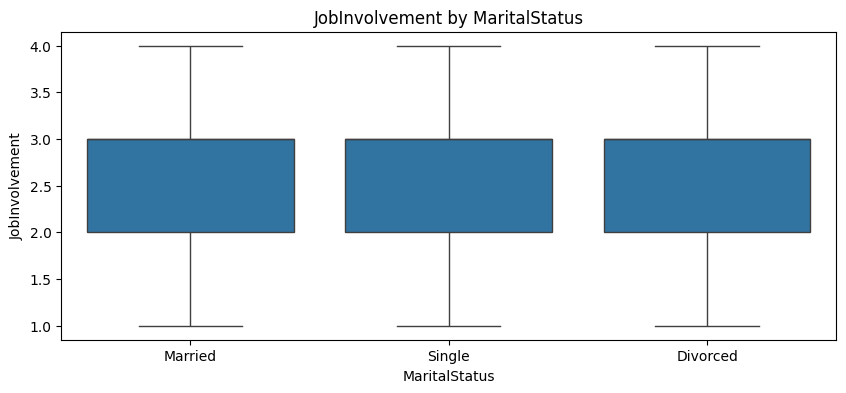

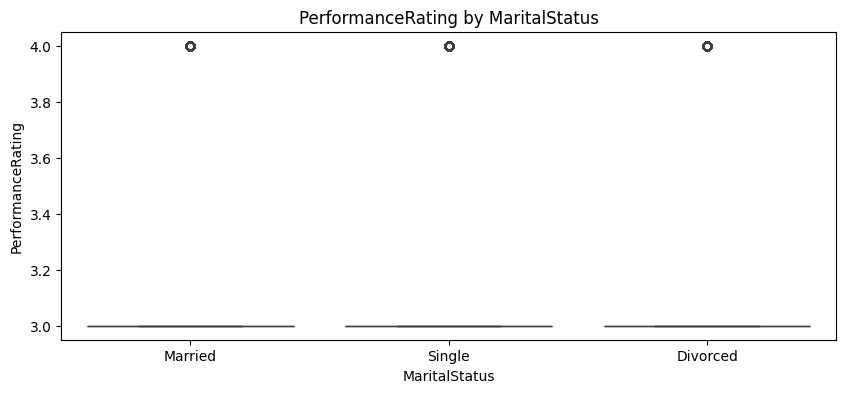

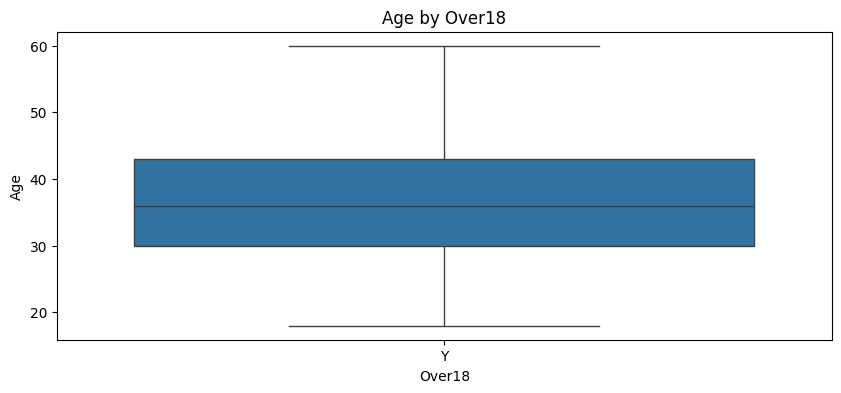

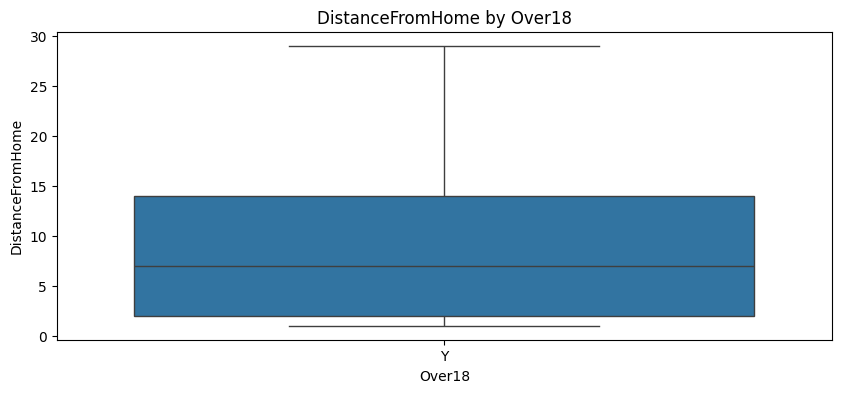

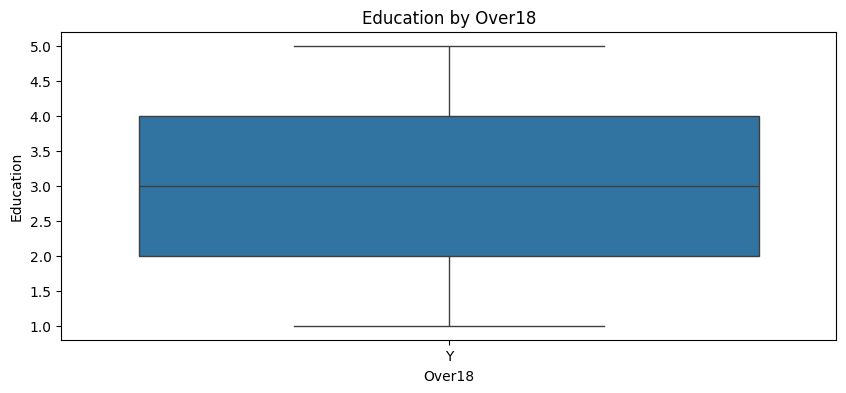

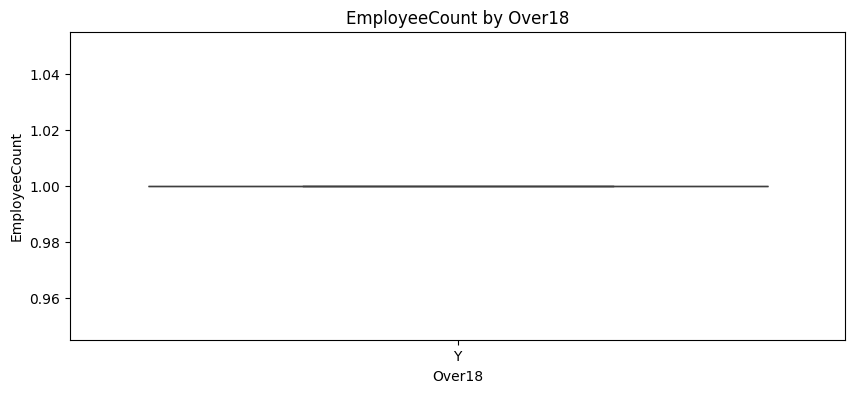

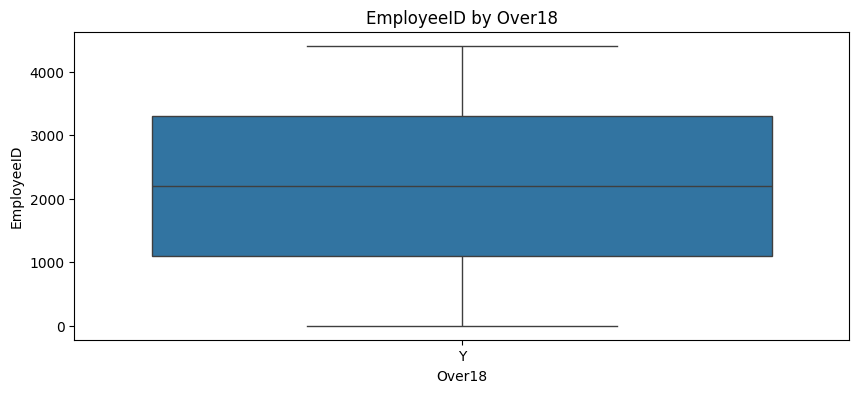

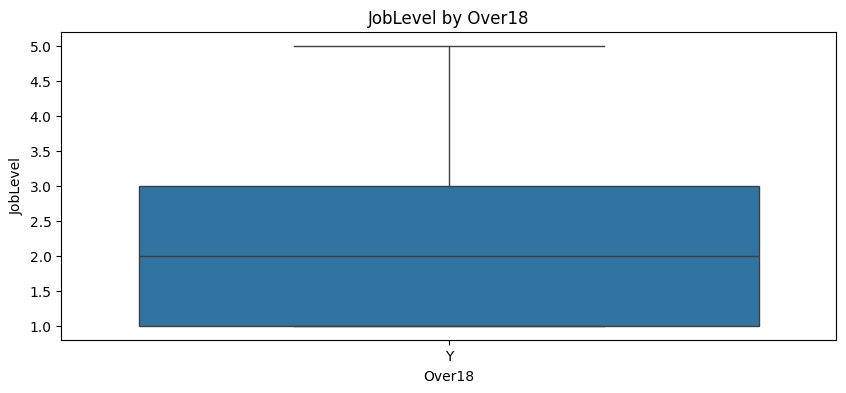

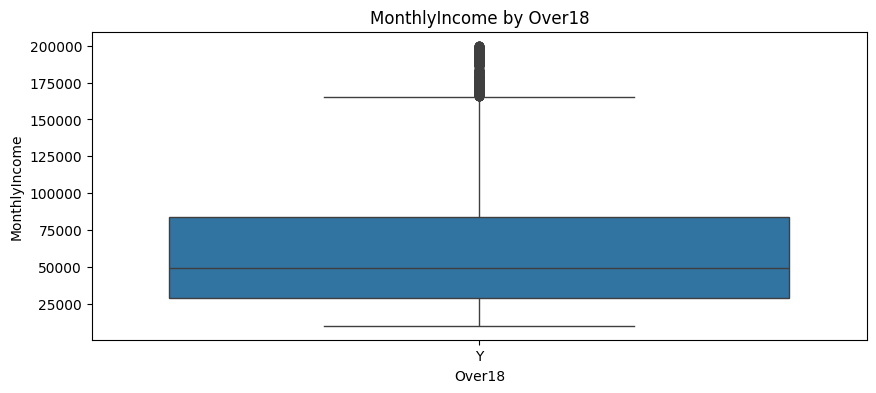

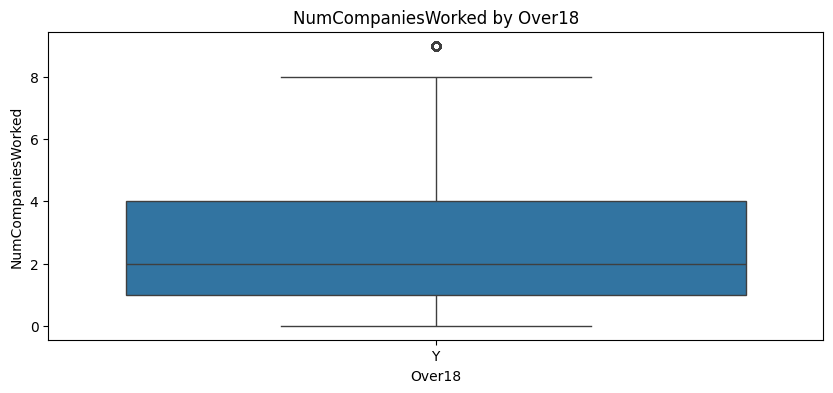

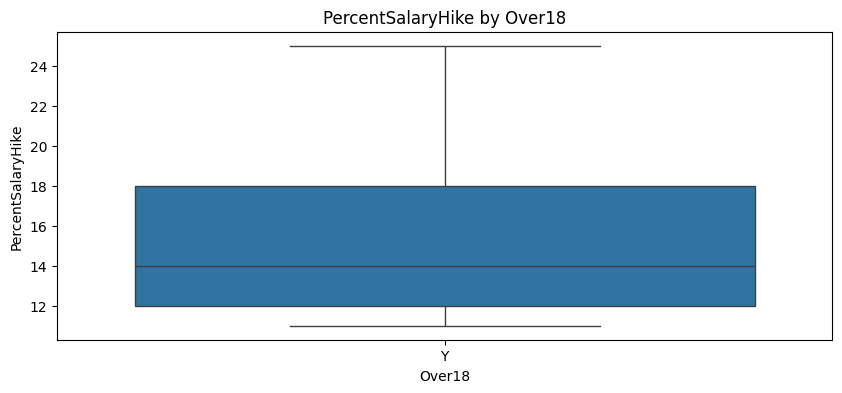

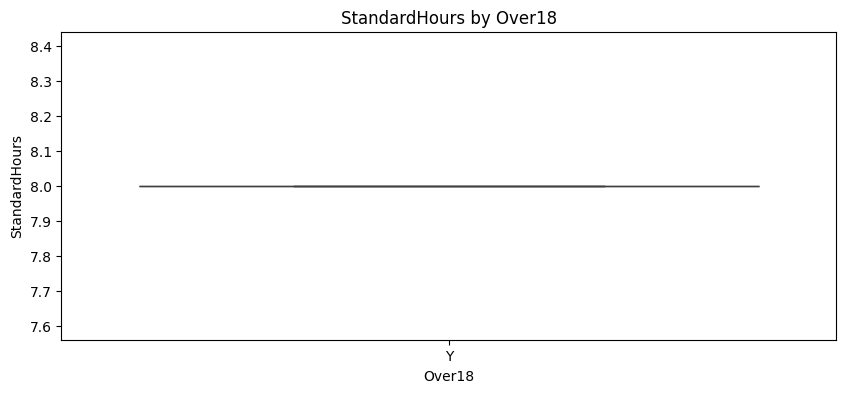

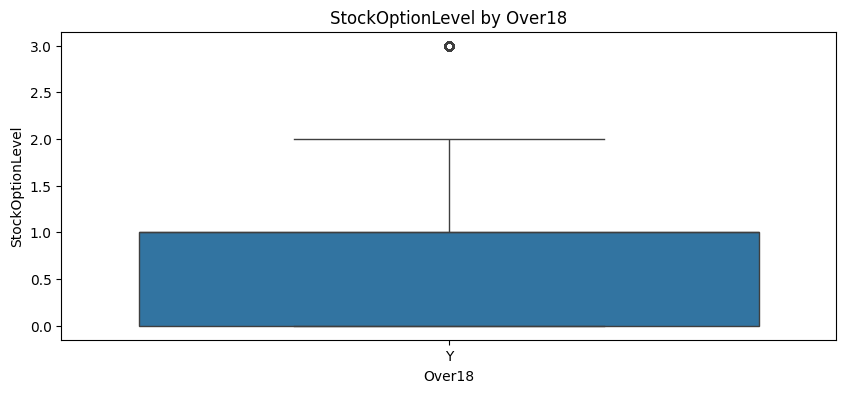

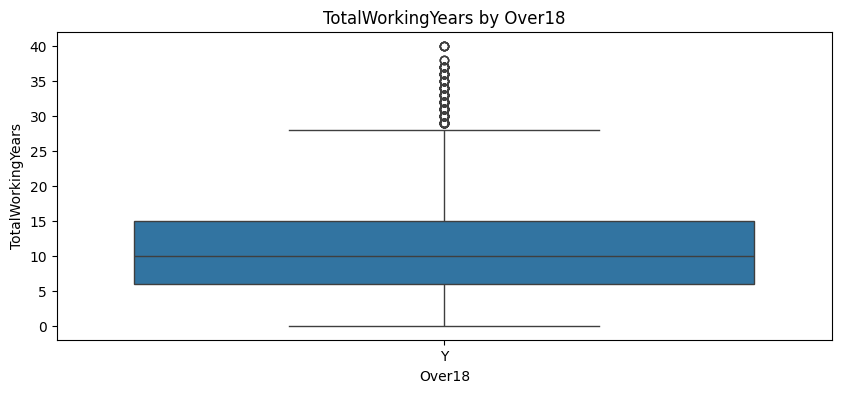

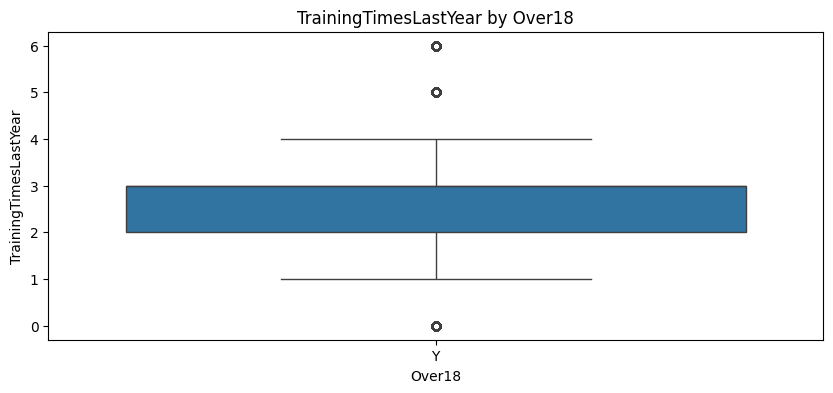

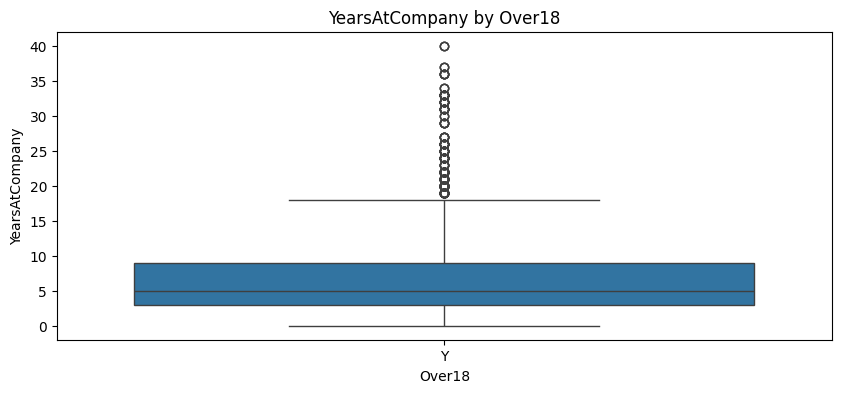

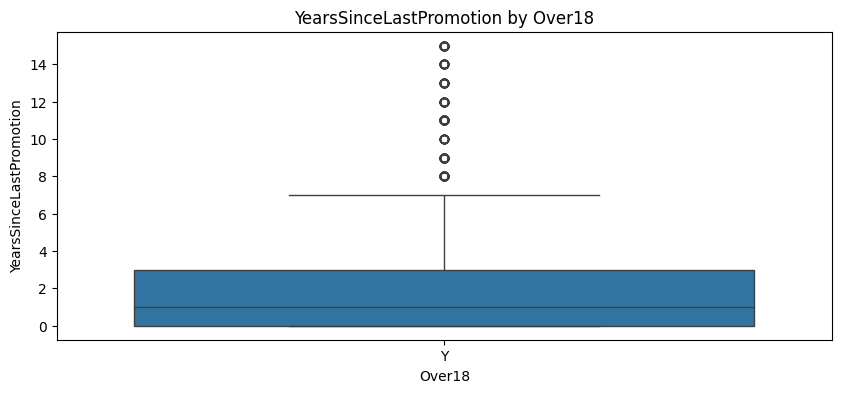

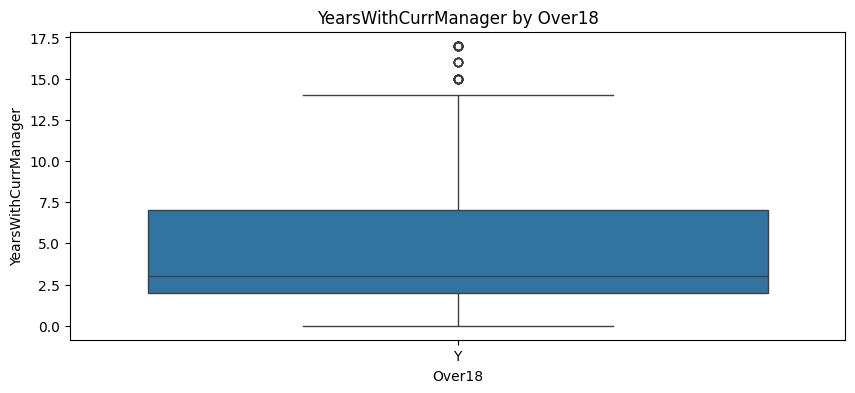

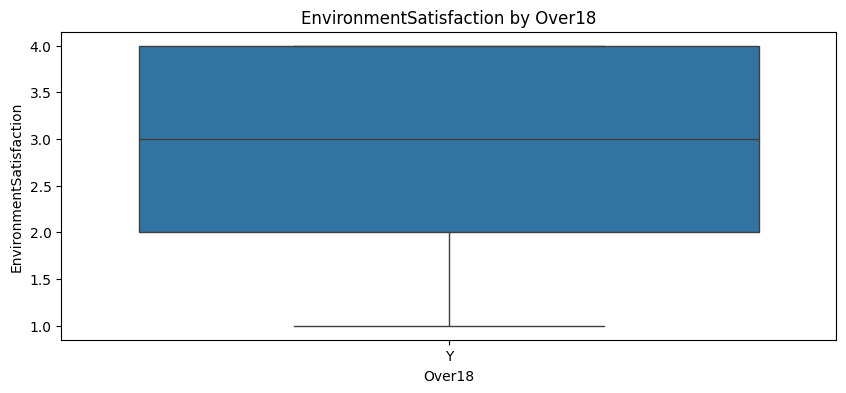

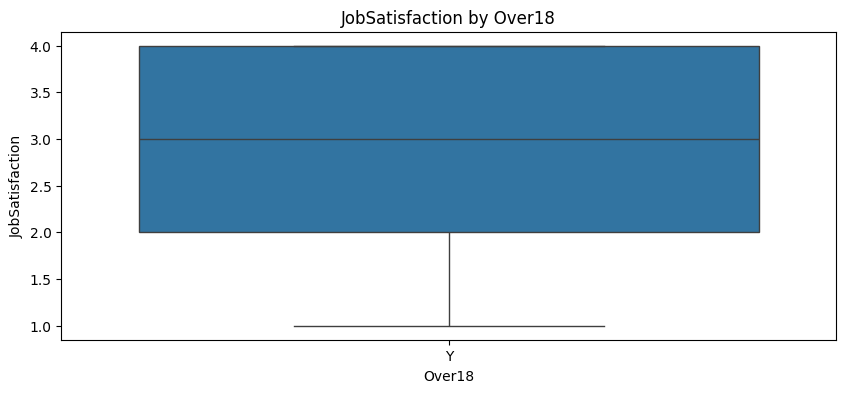

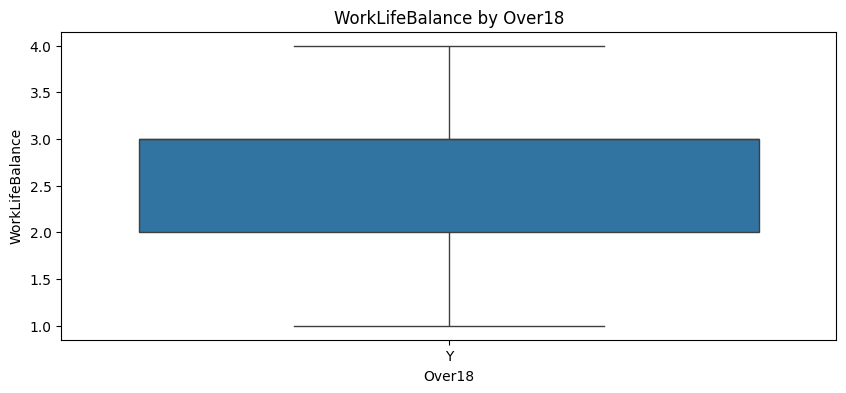

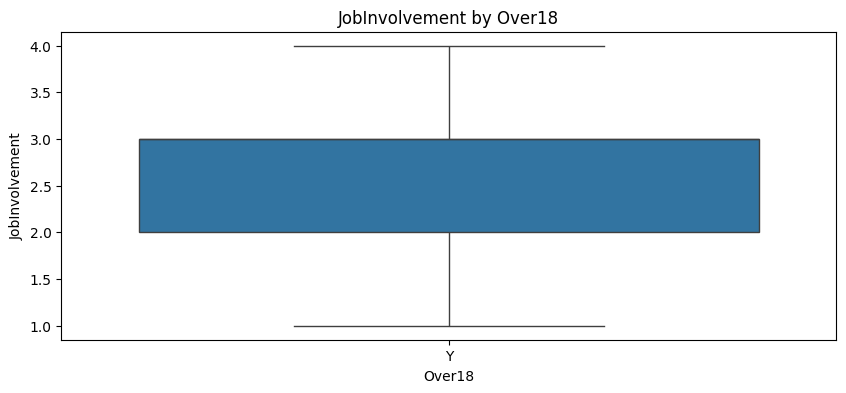

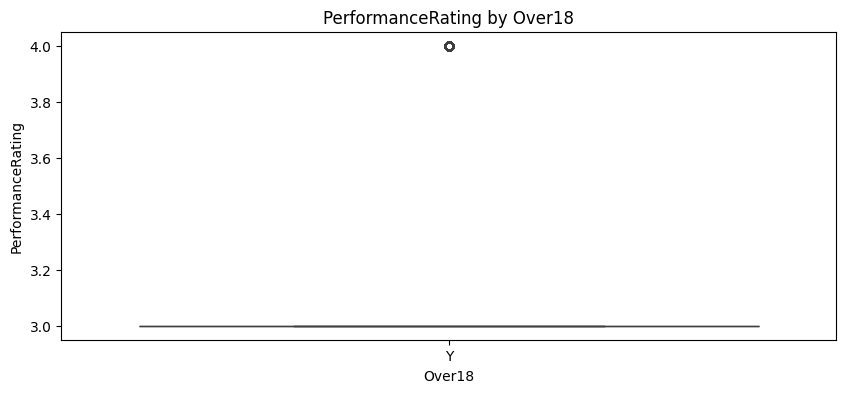

In [8]:
categorical_column = 'Age'

for categorical_column in categorical_columns:
    for column in numerical_columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=merge2[categorical_column], y=merge2[column])
        plt.title(f'{column} by {categorical_column}')
        plt.show()